In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from pickle import dump

In [2]:
# 读取数据
dataset = pd.read_csv('D:\IPython\Corrosion-ML./Corrosion_potential.csv')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 41 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   319 non-null    int64  
 1   Composition  319 non-null    object 
 2   Environment  319 non-null    int64  
 3   PH           319 non-null    float64
 4   [Cl-]        319 non-null    float64
 5   [SO42-]      319 non-null    float64
 6   VEC          319 non-null    float64
 7   σVEC         319 non-null    float64
 8   ΔSmix        319 non-null    float64
 9   ΔHmix        319 non-null    float64
 10  Ω            319 non-null    float64
 11  δ            319 non-null    float64
 12  rbar         319 non-null    float64
 13  Δχ           319 non-null    float64
 14  χbar         319 non-null    float64
 15  e/a          319 non-null    float64
 16  Tm           319 non-null    float64
 17  σT           319 non-null    float64
 18  Ec           319 non-null    float64
 19  Al      

In [3]:
# 去掉不必要的轴
dataset = dataset.drop('Composition', axis=1)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('VEC', axis=1)
dataset = dataset.drop('σT', axis=1)
dataset = dataset.drop('Ec', axis=1)
dataset = dataset.drop('Hf', axis=1)
dataset = dataset.drop('Ta', axis=1)
dataset = dataset.drop('P', axis=1)
dataset = dataset.drop('Zr', axis=1)
dataset = dataset.drop('B', axis=1)
dataset = dataset.drop('C', axis=1)
dataset = dataset.drop('W', axis=1)
dataset = dataset.drop('V', axis=1)
dataset = dataset.drop('Si', axis=1)
dataset = dataset.drop('Sn', axis=1)
dataset = dataset.drop('Ti', axis=1)
dataset = dataset.drop('Al', axis=1)
dataset = dataset.drop('[SO42-]', axis=1)
dataset = dataset.drop('ΔSmix', axis=1)
dataset = dataset.drop('Ω', axis=1)
dataset = dataset.drop('δ', axis=1)
dataset = dataset.drop('rbar', axis=1)
dataset = dataset.drop('Δχ', axis=1)
dataset = dataset.drop('Fe', axis=1)
dataset = dataset.drop('Ni', axis=1)
dataset = dataset.drop('Cu', axis=1)
dataset = dataset.drop('Mn', axis=1)
dataset = dataset.drop('Mo', axis=1)
dataset = dataset.drop('Nb', axis=1)

dataset.isna().sum()

Environment    0
PH             0
[Cl-]          0
σVEC           0
ΔHmix          0
χbar           0
e/a            0
Tm             0
Co             0
Cr             0
Y              0
Ecorr          4
dtype: int64

In [4]:
# 去掉有空白的行
dataset = dataset.dropna()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315 entries, 0 to 318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Environment  315 non-null    int64  
 1   PH           315 non-null    float64
 2   [Cl-]        315 non-null    float64
 3   σVEC         315 non-null    float64
 4   ΔHmix        315 non-null    float64
 5   χbar         315 non-null    float64
 6   e/a          315 non-null    float64
 7   Tm           315 non-null    float64
 8   Co           315 non-null    float64
 9   Cr           315 non-null    float64
 10  Y            315 non-null    float64
 11  Ecorr        315 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 32.0 KB


In [5]:
from sklearn.model_selection import train_test_split


# 将数据分成X和y轴
y = dataset['Ecorr']
X = dataset.drop(['Ecorr'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size= 0.2, 
                                                    random_state=150
                                                    )

# 归一化
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# 保存数据标准化工具
# dump(sc, open('D:\IPython\Corrosion-ML\Scarler\scaler.pkl', 'wb'))

# Machine learning

# 随机森林

In [6]:
from sklearn.ensemble import RandomForestRegressor

# 创建随机森林回归模型
rf = RandomForestRegressor()

# 拟合模型
rf.fit(X_train, y_train)

# 预测测试集
y_pred_test = rf.predict(X_test)

# 预测训练集
y_pred_train = rf.predict(X_train)

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


print('随机森林初训练回归模型评价指标展示：')

# 计算R^2分数
score_test = rf.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = rf.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

随机森林初训练回归模型评价指标展示：
测试集上的R^2分数： 0.7593861868590079
训练集上的R^2分数： 0.8865012513788776
测试集上的MAE: 0.09991828628117919
训练集上的MAE: 0.053030318972033225
测试集上的MSE: 0.019264132350851393
训练集上的MSE: 0.007252879239837689
测试集上的RMSE: 0.1387952893683766
训练集上的RMSE: 0.08516383762981615


<Figure size 800x600 with 0 Axes>

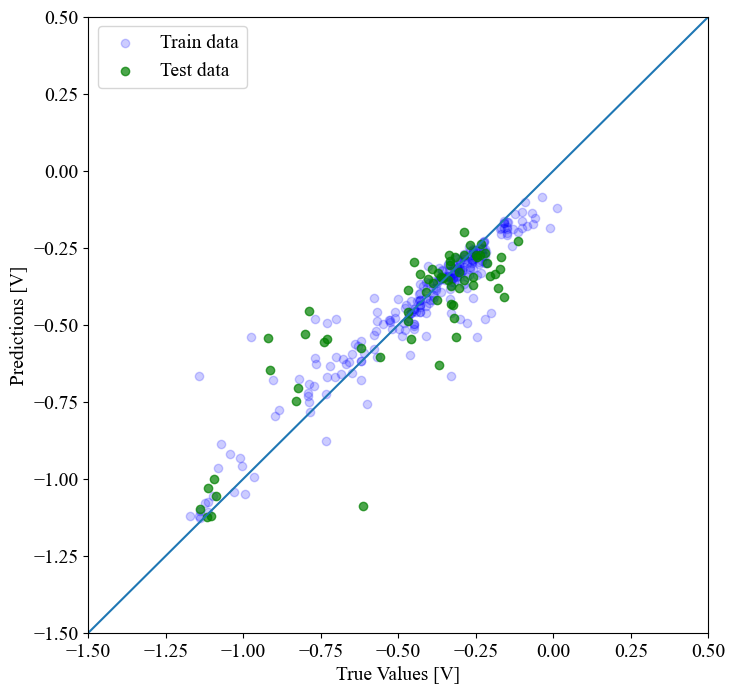

In [8]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = rf.predict(X_test).flatten()
train_predictions = rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.328643
7            Tm    0.108360
8            Co    0.088963
3          σVEC    0.086540
6           e/a    0.074796
5          χbar    0.072569
4         ΔHmix    0.060467
9            Cr    0.057618
2         [Cl-]    0.052471
10            Y    0.050757
0   Environment    0.018816


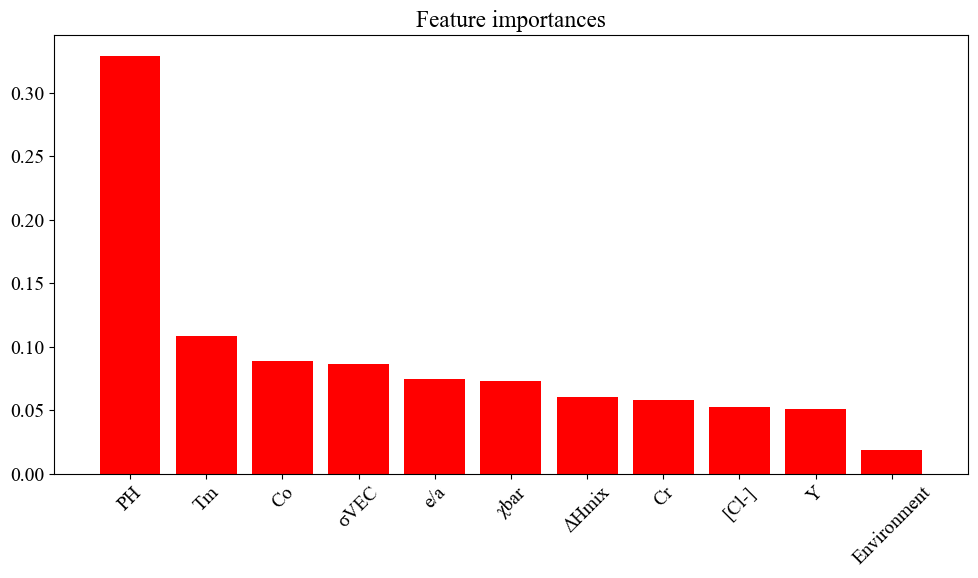

In [9]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [10]:
# 保存训练好的模型
dump(rf, open('D:\IPython\Corrosion-ML\saved_model2\随机森林\初训练模型\RF_5.pkl', 'wb'))

# 交叉验证

In [11]:
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestRegressor


# 创建随机森林回归模型
cv_rf = RandomForestRegressor()

# 预测训练集
y_pred_train_cv = cross_val_predict(cv_rf, X_train, y_train, cv=5)

# 在整个训练集上拟合模型
cv_rf.fit(X_train, y_train)

# 预测测试集
y_pred_test_cv = cv_rf.predict(X_test)

In [12]:
print('随机森林交叉验证回归模型评价指标展示：')

# 计算R^2分数
score_test = cv_rf.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = cv_rf.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

随机森林交叉验证回归模型评价指标展示：
测试集上的R^2分数： 0.7392257480642163
训练集上的R^2分数： 0.8824786309785145
测试集上的MAE: 0.1026834882842026
训练集上的MAE: 0.13494670937263797
测试集上的MSE: 0.020878226554855103
训练集上的MSE: 0.03570869407746882
测试集上的RMSE: 0.14449299829007323
训练集上的RMSE: 0.1889674418450671


<Figure size 800x600 with 0 Axes>

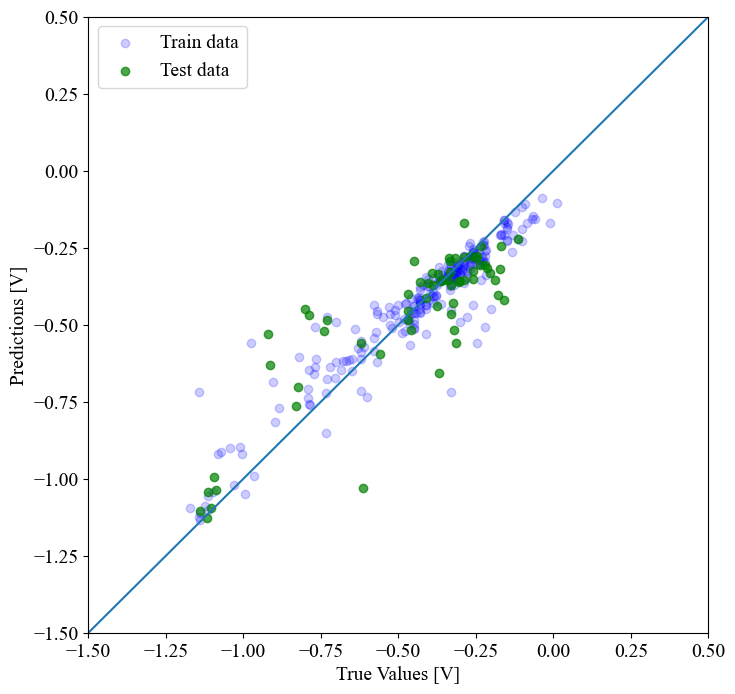

In [13]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = cv_rf.predict(X_test).flatten()
train_predictions = cv_rf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.331516
7            Tm    0.097600
8            Co    0.087073
3          σVEC    0.085840
6           e/a    0.077735
5          χbar    0.076669
4         ΔHmix    0.060743
9            Cr    0.060398
2         [Cl-]    0.054314
10            Y    0.048652
0   Environment    0.019460


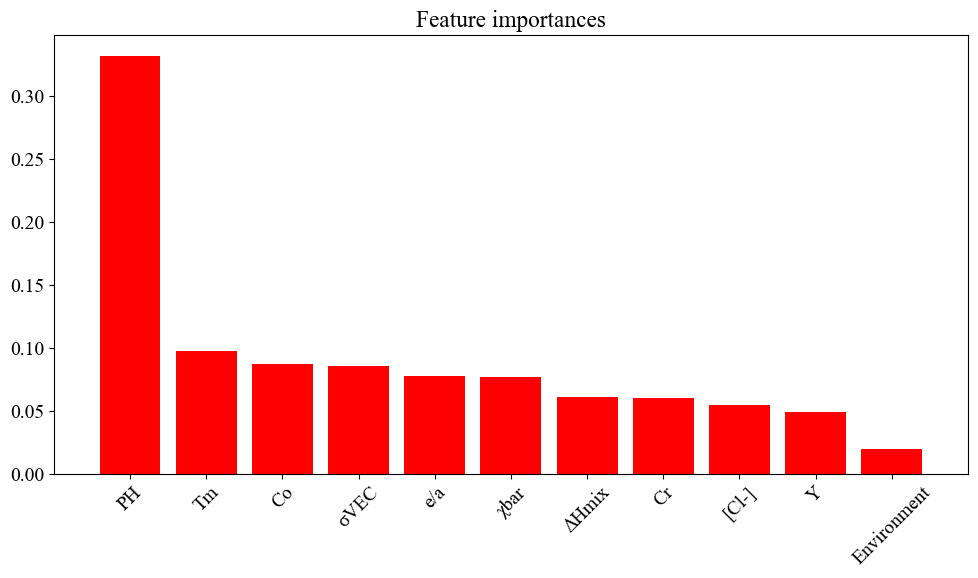

In [14]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = cv_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [15]:
# 保存训练好的模型
dump(cv_rf, open('D:\IPython\Corrosion-ML\saved_model2\随机森林\交叉验证模型\CVRF_5.pkl', 'wb'))

# 贝叶斯优化

In [16]:
import optuna


def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 5)

    BOrf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    BOrf.fit(X_train, y_train)
    y_pred = BOrf.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 运行贝叶斯优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# 输出最佳超参数
best_params_rf = study.best_params
print('Best params for Random Forest:', best_params_rf)

# 训练最佳模型
BOrf = RandomForestRegressor(n_estimators=best_params_rf['n_estimators'], 
                             max_depth=best_params_rf['max_depth'], 
                             min_samples_split=best_params_rf['min_samples_split'], 
                             min_samples_leaf=best_params_rf['min_samples_leaf'], 
                             random_state=42)

BOrf.fit(X_train, y_train)

D:\Python\anaconda\envs\tf2x\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-01-03 16:36:01,259] A new study created in memory with name: no-name-b6009a52-49ad-4ed0-9711-da315d266db9
[I 2024-01-03 16:36:01,954] Trial 0 finished with value: 0.03246561696998584 and parameters: {'n_estimators': 501, 'max_depth': 3, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.03246561696998584.
[I 2024-01-03 16:36:02,624] Trial 1 finished with value: 0.022877892952524334 and parameters: {'n_estimators': 363, 'max_depth': 18, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.022877892952524334.
[I 2024-01-03 16:36:03,508] Trial 2 finished with value: 0.024127487835347634 and parameters: {'n_estimators': 515, 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf'

[I 2024-01-03 16:36:16,684] Trial 32 finished with value: 0.023212676477486163 and parameters: {'n_estimators': 141, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 15 with value: 0.018937958964559787.
[I 2024-01-03 16:36:17,341] Trial 33 finished with value: 0.020529629369480214 and parameters: {'n_estimators': 341, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 15 with value: 0.018937958964559787.
[I 2024-01-03 16:36:18,124] Trial 34 finished with value: 0.019553387424453478 and parameters: {'n_estimators': 350, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 15 with value: 0.018937958964559787.
[I 2024-01-03 16:36:18,932] Trial 35 finished with value: 0.022950691235871203 and parameters: {'n_estimators': 455, 'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 15 with value: 0.018937958964559787.
[I 2024-01-03 16:36:19,375] Trial 36 finished with value: 0.0359126895

[I 2024-01-03 16:36:27,400] Trial 66 finished with value: 0.019922923695444877 and parameters: {'n_estimators': 24, 'max_depth': 18, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:27,513] Trial 67 finished with value: 0.018586177134854203 and parameters: {'n_estimators': 41, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:27,622] Trial 68 finished with value: 0.01889328359054991 and parameters: {'n_estimators': 36, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:27,726] Trial 69 finished with value: 0.018752859405823965 and parameters: {'n_estimators': 40, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:27,836] Trial 70 finished with value: 0.0189660652610

[I 2024-01-03 16:36:31,277] Trial 100 finished with value: 0.019103883614925394 and parameters: {'n_estimators': 37, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:31,395] Trial 101 finished with value: 0.018663375659315248 and parameters: {'n_estimators': 45, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:31,522] Trial 102 finished with value: 0.019072922747240144 and parameters: {'n_estimators': 53, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:31,647] Trial 103 finished with value: 0.018629965015919535 and parameters: {'n_estimators': 46, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 49 with value: 0.018274433763735297.
[I 2024-01-03 16:36:31,778] Trial 104 finished with value: 0.0189577

[I 2024-01-03 16:36:34,974] Trial 134 finished with value: 0.01889959662912248 and parameters: {'n_estimators': 31, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 131 with value: 0.018212019722270812.
[I 2024-01-03 16:36:35,079] Trial 135 finished with value: 0.018212019722270812 and parameters: {'n_estimators': 36, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 131 with value: 0.018212019722270812.
[I 2024-01-03 16:36:35,154] Trial 136 finished with value: 0.02032413296317938 and parameters: {'n_estimators': 27, 'max_depth': 19, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 131 with value: 0.018212019722270812.
[I 2024-01-03 16:36:35,260] Trial 137 finished with value: 0.0185994821453287 and parameters: {'n_estimators': 34, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 131 with value: 0.018212019722270812.
[I 2024-01-03 16:36:35,337] Trial 138 finished with value: 0.0195670

[I 2024-01-03 16:36:38,224] Trial 168 finished with value: 0.01903257465842463 and parameters: {'n_estimators': 28, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 149 with value: 0.01812016820267442.
[I 2024-01-03 16:36:38,330] Trial 169 finished with value: 0.018251379874975944 and parameters: {'n_estimators': 35, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 149 with value: 0.01812016820267442.
[I 2024-01-03 16:36:38,481] Trial 170 finished with value: 0.01818105005339223 and parameters: {'n_estimators': 51, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 149 with value: 0.01812016820267442.
[I 2024-01-03 16:36:38,625] Trial 171 finished with value: 0.018359924854065592 and parameters: {'n_estimators': 53, 'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 149 with value: 0.01812016820267442.
[I 2024-01-03 16:36:38,747] Trial 172 finished with value: 0.018175158

[I 2024-01-03 16:36:43,064] Trial 202 finished with value: 0.01833037212705596 and parameters: {'n_estimators': 55, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:43,205] Trial 203 finished with value: 0.018101522261996007 and parameters: {'n_estimators': 48, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:43,378] Trial 204 finished with value: 0.01859484466422327 and parameters: {'n_estimators': 64, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:43,511] Trial 205 finished with value: 0.018335599639588376 and parameters: {'n_estimators': 47, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:43,662] Trial 206 finished with value: 0.018330372

[I 2024-01-03 16:36:48,186] Trial 236 finished with value: 0.022113614577647253 and parameters: {'n_estimators': 45, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:48,341] Trial 237 finished with value: 0.01872896880553613 and parameters: {'n_estimators': 54, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:48,498] Trial 238 finished with value: 0.018513416094844068 and parameters: {'n_estimators': 58, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:48,646] Trial 239 finished with value: 0.01806497727337279 and parameters: {'n_estimators': 50, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:48,779] Trial 240 finished with value: 0.018098931

[I 2024-01-03 16:36:53,349] Trial 270 finished with value: 0.01840655829791178 and parameters: {'n_estimators': 54, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:53,523] Trial 271 finished with value: 0.018895646869302757 and parameters: {'n_estimators': 65, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:53,651] Trial 272 finished with value: 0.018185305102823627 and parameters: {'n_estimators': 44, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:53,787] Trial 273 finished with value: 0.018101522261996007 and parameters: {'n_estimators': 48, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 174 with value: 0.01798882382950652.
[I 2024-01-03 16:36:53,961] Trial 274 finished with value: 0.01832776

[I 2024-01-03 16:36:58,199] Trial 304 finished with value: 0.018134530796265404 and parameters: {'n_estimators': 16, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 296 with value: 0.01779823471593459.
[I 2024-01-03 16:36:58,388] Trial 305 finished with value: 0.019081116308982807 and parameters: {'n_estimators': 70, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 296 with value: 0.01779823471593459.
[I 2024-01-03 16:36:58,445] Trial 306 finished with value: 0.01824584048777705 and parameters: {'n_estimators': 11, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 296 with value: 0.01779823471593459.
[I 2024-01-03 16:36:58,503] Trial 307 finished with value: 0.017394676100519667 and parameters: {'n_estimators': 10, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 307 with value: 0.017394676100519667.
[I 2024-01-03 16:36:58,549] Trial 308 finished with value: 0.0223589

[I 2024-01-03 16:37:00,169] Trial 338 finished with value: 0.018408526337176552 and parameters: {'n_estimators': 11, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:00,223] Trial 339 finished with value: 0.017599121357308067 and parameters: {'n_estimators': 10, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:00,272] Trial 340 finished with value: 0.026449740385658678 and parameters: {'n_estimators': 11, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:00,324] Trial 341 finished with value: 0.017599121357308067 and parameters: {'n_estimators': 10, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:00,377] Trial 342 finished with value: 0.019

[I 2024-01-03 16:37:02,061] Trial 372 finished with value: 0.017452096429769717 and parameters: {'n_estimators': 14, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:02,124] Trial 373 finished with value: 0.017452096429769717 and parameters: {'n_estimators': 14, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:02,186] Trial 374 finished with value: 0.017452096429769717 and parameters: {'n_estimators': 14, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:02,250] Trial 375 finished with value: 0.017259999753510086 and parameters: {'n_estimators': 15, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:02,319] Trial 376 finished with value: 0.017

[I 2024-01-03 16:37:04,374] Trial 406 finished with value: 0.017259999753510086 and parameters: {'n_estimators': 15, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:04,443] Trial 407 finished with value: 0.01758383284399791 and parameters: {'n_estimators': 17, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:04,509] Trial 408 finished with value: 0.017259999753510086 and parameters: {'n_estimators': 15, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:04,576] Trial 409 finished with value: 0.01748483567760401 and parameters: {'n_estimators': 16, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:04,644] Trial 410 finished with value: 0.01758

[I 2024-01-03 16:37:06,720] Trial 440 finished with value: 0.01875448420533268 and parameters: {'n_estimators': 19, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:07,351] Trial 441 finished with value: 0.019602325574124925 and parameters: {'n_estimators': 273, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:07,692] Trial 442 finished with value: 0.01910626317998627 and parameters: {'n_estimators': 130, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:07,750] Trial 443 finished with value: 0.022437593832901545 and parameters: {'n_estimators': 12, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 4}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:07,819] Trial 444 finished with value: 0.017

[I 2024-01-03 16:37:12,171] Trial 474 finished with value: 0.022381653331147576 and parameters: {'n_estimators': 21, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:12,229] Trial 475 finished with value: 0.017597956686901093 and parameters: {'n_estimators': 11, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:12,299] Trial 476 finished with value: 0.01758383284399791 and parameters: {'n_estimators': 17, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:12,362] Trial 477 finished with value: 0.019437042334292772 and parameters: {'n_estimators': 14, 'max_depth': 16, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:12,425] Trial 478 finished with value: 0.0175

[I 2024-01-03 16:37:18,684] Trial 508 finished with value: 0.018868990928987823 and parameters: {'n_estimators': 28, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:18,749] Trial 509 finished with value: 0.017550270984385552 and parameters: {'n_estimators': 14, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:18,812] Trial 510 finished with value: 0.01788821473080588 and parameters: {'n_estimators': 11, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:19,685] Trial 511 finished with value: 0.01954753383529494 and parameters: {'n_estimators': 378, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:19,773] Trial 512 finished with value: 0.0197

[I 2024-01-03 16:37:26,877] Trial 542 finished with value: 0.02230814631096946 and parameters: {'n_estimators': 13, 'max_depth': 6, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:26,943] Trial 543 finished with value: 0.017597956686901093 and parameters: {'n_estimators': 11, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:27,023] Trial 544 finished with value: 0.021883388826473008 and parameters: {'n_estimators': 15, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:27,111] Trial 545 finished with value: 0.01840858809612315 and parameters: {'n_estimators': 18, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:27,183] Trial 546 finished with value: 0.017683

[I 2024-01-03 16:37:35,607] Trial 576 finished with value: 0.01788673478439695 and parameters: {'n_estimators': 16, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:36,302] Trial 577 finished with value: 0.019521161651908075 and parameters: {'n_estimators': 296, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:36,368] Trial 578 finished with value: 0.017539327170280988 and parameters: {'n_estimators': 13, 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:36,430] Trial 579 finished with value: 0.01798883530004768 and parameters: {'n_estimators': 11, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 310 with value: 0.017109868655673495.
[I 2024-01-03 16:37:36,501] Trial 580 finished with value: 0.0195

[I 2024-01-03 16:37:41,582] Trial 610 finished with value: 0.01909773761604335 and parameters: {'n_estimators': 74, 'max_depth': 13, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:42,582] Trial 611 finished with value: 0.019721123732934734 and parameters: {'n_estimators': 429, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:42,674] Trial 612 finished with value: 0.01904599767361278 and parameters: {'n_estimators': 25, 'max_depth': 16, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:43,187] Trial 613 finished with value: 0.01981977252131341 and parameters: {'n_estimators': 212, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:43,254] Trial 614 finished with value: 0.0218

[I 2024-01-03 16:37:48,533] Trial 644 finished with value: 0.017109868655673495 and parameters: {'n_estimators': 10, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:48,597] Trial 645 finished with value: 0.017109868655673495 and parameters: {'n_estimators': 10, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:48,660] Trial 646 finished with value: 0.017128954048930948 and parameters: {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:48,720] Trial 647 finished with value: 0.017128954048930948 and parameters: {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:48,781] Trial 648 finished with value: 0.017

[I 2024-01-03 16:37:50,699] Trial 678 finished with value: 0.01663642486321836 and parameters: {'n_estimators': 10, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:50,765] Trial 679 finished with value: 0.017393340472221963 and parameters: {'n_estimators': 12, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:50,832] Trial 680 finished with value: 0.018588359163075982 and parameters: {'n_estimators': 11, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:51,035] Trial 681 finished with value: 0.019628963412713057 and parameters: {'n_estimators': 78, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:51,096] Trial 682 finished with value: 0.01773755

[I 2024-01-03 16:37:57,218] Trial 712 finished with value: 0.022402128081678983 and parameters: {'n_estimators': 193, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:57,447] Trial 713 finished with value: 0.02323115770296107 and parameters: {'n_estimators': 109, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:57,514] Trial 714 finished with value: 0.018611251625720655 and parameters: {'n_estimators': 12, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:57,580] Trial 715 finished with value: 0.01663642486321836 and parameters: {'n_estimators': 10, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:37:57,646] Trial 716 finished with value: 0.017241

[I 2024-01-03 16:38:05,391] Trial 746 finished with value: 0.01663642486321836 and parameters: {'n_estimators': 10, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:06,156] Trial 747 finished with value: 0.021637616822443365 and parameters: {'n_estimators': 397, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:06,223] Trial 748 finished with value: 0.01724133475185228 and parameters: {'n_estimators': 11, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:06,286] Trial 749 finished with value: 0.01773755666058887 and parameters: {'n_estimators': 10, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:06,359] Trial 750 finished with value: 0.017393340

[I 2024-01-03 16:38:16,243] Trial 780 finished with value: 0.017393340472221963 and parameters: {'n_estimators': 12, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:16,429] Trial 781 finished with value: 0.02044278178658536 and parameters: {'n_estimators': 77, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:16,496] Trial 782 finished with value: 0.01724133475185228 and parameters: {'n_estimators': 11, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:16,966] Trial 783 finished with value: 0.019851135828751157 and parameters: {'n_estimators': 210, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:17,033] Trial 784 finished with value: 0.0166364

[I 2024-01-03 16:38:29,714] Trial 814 finished with value: 0.01773755666058887 and parameters: {'n_estimators': 10, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:29,827] Trial 815 finished with value: 0.01961843178709696 and parameters: {'n_estimators': 28, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:30,205] Trial 816 finished with value: 0.019749286767387447 and parameters: {'n_estimators': 147, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:30,627] Trial 817 finished with value: 0.019759517393151387 and parameters: {'n_estimators': 166, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:31,263] Trial 818 finished with value: 0.02179

[I 2024-01-03 16:38:38,322] Trial 848 finished with value: 0.018088406992827568 and parameters: {'n_estimators': 12, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:38,396] Trial 849 finished with value: 0.020924402843439324 and parameters: {'n_estimators': 11, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:38,467] Trial 850 finished with value: 0.01663642486321836 and parameters: {'n_estimators': 10, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:38,539] Trial 851 finished with value: 0.018588359163075982 and parameters: {'n_estimators': 11, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:38,727] Trial 852 finished with value: 0.0177146

[I 2024-01-03 16:38:47,576] Trial 882 finished with value: 0.01724133475185228 and parameters: {'n_estimators': 11, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:47,691] Trial 883 finished with value: 0.019762778698536678 and parameters: {'n_estimators': 34, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:47,768] Trial 884 finished with value: 0.01771462279114791 and parameters: {'n_estimators': 13, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:47,840] Trial 885 finished with value: 0.017128954048930948 and parameters: {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:47,912] Trial 886 finished with value: 0.01663642

[I 2024-01-03 16:38:57,543] Trial 916 finished with value: 0.01724133475185228 and parameters: {'n_estimators': 11, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:57,622] Trial 917 finished with value: 0.017128954048930948 and parameters: {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:57,937] Trial 918 finished with value: 0.01945862178021303 and parameters: {'n_estimators': 122, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:58,009] Trial 919 finished with value: 0.01773755666058887 and parameters: {'n_estimators': 10, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:38:58,097] Trial 920 finished with value: 0.01739334

[I 2024-01-03 16:39:07,839] Trial 950 finished with value: 0.01726612159535281 and parameters: {'n_estimators': 11, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:07,917] Trial 951 finished with value: 0.017393340472221963 and parameters: {'n_estimators': 12, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:08,040] Trial 952 finished with value: 0.018991609686053644 and parameters: {'n_estimators': 33, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:08,278] Trial 953 finished with value: 0.0231626421204674 and parameters: {'n_estimators': 104, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:10,270] Trial 954 finished with value: 0.0202139

[I 2024-01-03 16:39:19,247] Trial 984 finished with value: 0.019460582475034554 and parameters: {'n_estimators': 126, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:19,321] Trial 985 finished with value: 0.01663642486321836 and parameters: {'n_estimators': 10, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:19,528] Trial 986 finished with value: 0.020411365424131113 and parameters: {'n_estimators': 80, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:19,606] Trial 987 finished with value: 0.018088406992827568 and parameters: {'n_estimators': 12, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 587 with value: 0.016614819734552727.
[I 2024-01-03 16:39:19,682] Trial 988 finished with value: 0.016636

Best MSE: 0.016614819734552727
Best params for Random Forest: {'n_estimators': 10, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1}


RandomForestRegressor(max_depth=14, min_samples_split=4, n_estimators=10,
                      random_state=42)

In [17]:
print('随机森林贝叶斯优化回归模型评价指标展示：')

# 预测测试集
y_pred_test = BOrf.predict(X_test)

# 预测训练集
y_pred_train = BOrf.predict(X_train)

# 计算R^2分数
score_test = BOrf.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = BOrf.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

随机森林贝叶斯优化回归模型评价指标展示：
测试集上的R^2分数： 0.7924767615706164
训练集上的R^2分数： 0.8327973611288796
测试集上的MAE: 0.0922708039491373
训练集上的MAE: 0.06530887234532075
测试集上的MSE: 0.016614819734552727
训练集上的MSE: 0.010684704131519744
测试集上的RMSE: 0.1288984861608263
训练集上的RMSE: 0.10336684251499484


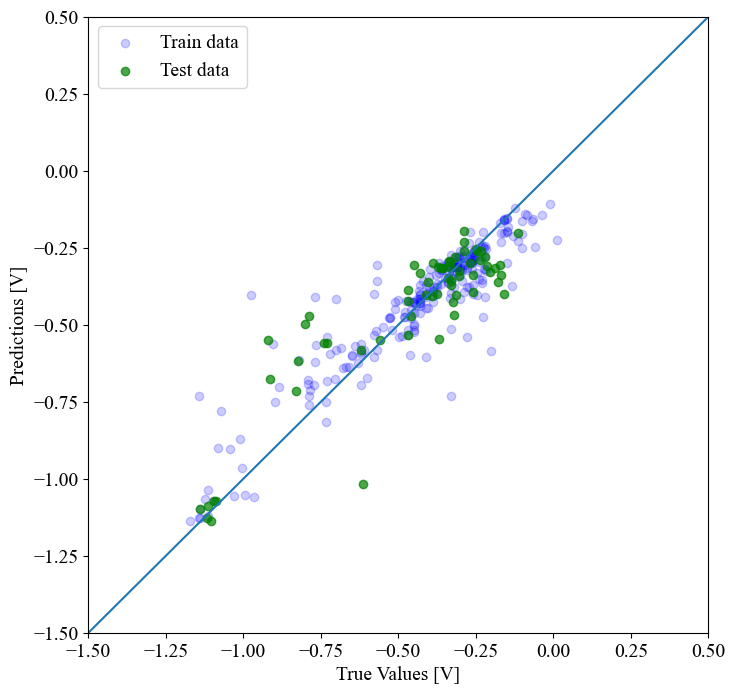

In [18]:
# 模型在训练集以及验证集上的表现情况图
test_predictions = BOrf.predict(X_test).flatten()
train_predictions = BOrf.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'blue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='green', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

        feature  importance
1            PH    0.364270
7            Tm    0.110516
3          σVEC    0.093777
5          χbar    0.080546
8            Co    0.077952
2         [Cl-]    0.065183
6           e/a    0.063005
4         ΔHmix    0.056389
9            Cr    0.037539
10            Y    0.034449
0   Environment    0.016375


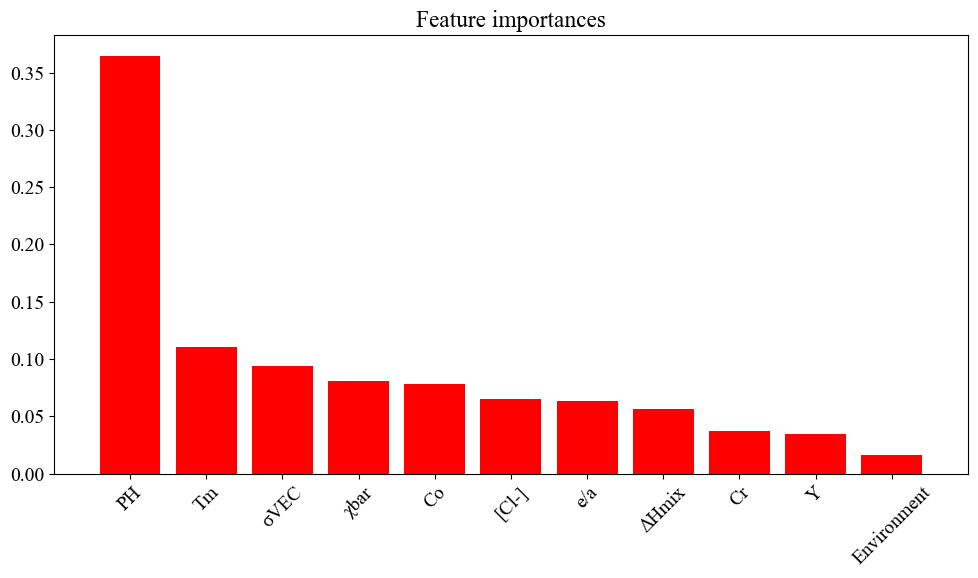

In [19]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 输出各特征名称和对应的重要性值
importances = BOrf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
print(feature_importances.sort_values('importance', ascending=False))

# 绘制柱状图
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [20]:
# 保存训练好的模型
dump(BOrf, open('D:\IPython\Corrosion-ML\saved_model2\随机森林\贝叶斯优化模型\BORF_5.pkl', 'wb'))

# 支持向量机

In [21]:
from sklearn.svm import SVR

# 构建支持向量机回归器
svm = SVR()

# 训练支持向量机回归器
svm.fit(X_train, y_train)

SVR()

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('支持向量机初训练回归模型评价指标展示：')

# 预测测试集
y_pred_test = svm.predict(X_test)

# 预测训练集
y_pred_train = svm.predict(X_train)

# 计算R^2分数
score_test = svm.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = svm.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

支持向量机初训练回归模型评价指标展示：
测试集上的R^2分数： 0.7299103981472396
训练集上的R^2分数： 0.6966242562692629
测试集上的MAE: 0.10591086949688364
训练集上的MAE: 0.0957698803203752
测试集上的MSE: 0.021624036329250633
训练集上的MSE: 0.01938653650640771
测试集上的RMSE: 0.14705113508317655
训练集上的RMSE: 0.13923554325820583


<Figure size 800x600 with 0 Axes>

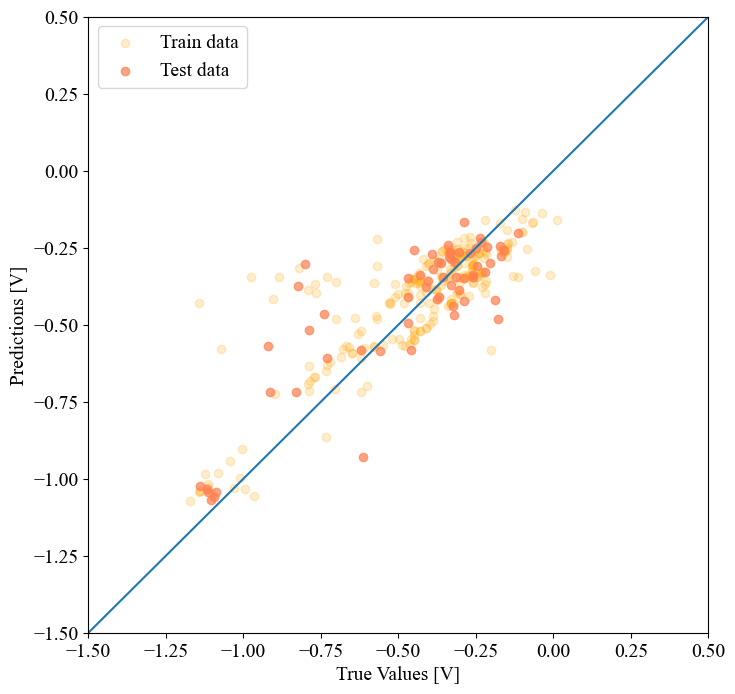

In [23]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = svm.predict(X_test).flatten()
train_predictions = svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [24]:
# 保存训练好的模型
dump(svm, open('D:\IPython\Corrosion-ML\saved_model2\支持向量机\初训练模型\SVM_5.pkl', 'wb'))

# 交叉验证

In [25]:
from sklearn.svm import SVR

# 构建支持向量机回归器
cv_svm = SVR()

# 预测训练集
y_pred_train_cv = cross_val_predict(cv_svm, X_train, y_train, cv=5)

# 在整个训练集上拟合模型
cv_svm.fit(X_train, y_train)

# 预测测试集
y_pred_test_cv = cv_svm.predict(X_test)

In [26]:
print('支持向量机交叉验证回归模型评价指标展示：')

# 计算R^2分数
score_test = cv_svm.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = cv_svm.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

支持向量机交叉验证回归模型评价指标展示：
测试集上的R^2分数： 0.7299103981472396
训练集上的R^2分数： 0.6966242562692629
测试集上的MAE: 0.10591086949688364
训练集上的MAE: 0.1289179684634263
测试集上的MSE: 0.021624036329250633
训练集上的MSE: 0.033031784455383274
测试集上的RMSE: 0.14705113508317655
训练集上的RMSE: 0.18174648402481758


<Figure size 800x600 with 0 Axes>

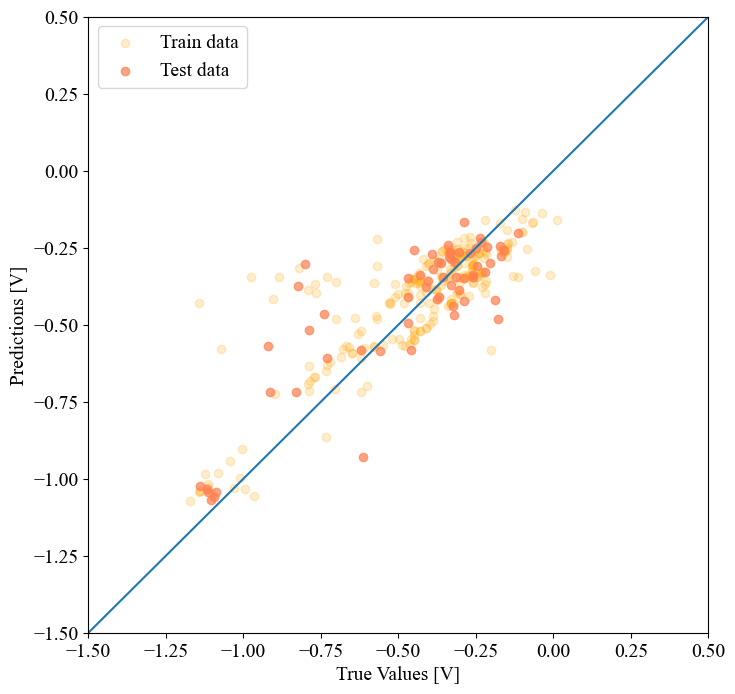

In [27]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及验证集上的表现情况图
test_predictions = cv_svm.predict(X_test).flatten()
train_predictions = cv_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [28]:
# 保存训练好的模型
dump(cv_svm, open('D:\IPython\Corrosion-ML\saved_model2\支持向量机\交叉验证模型\CVSVM_5.pkl', 'wb'))

# 贝叶斯优化

In [29]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import optuna


# 定义目标函数
def objective(trial):
    # 定义超参数搜索空间
    C = trial.suggest_loguniform('C', 50, 1000)
    gamma = trial.suggest_loguniform('gamma', 0.1, 10)
    epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf'])
    degree = 0
    

    # 定义模型
    BO_svm = SVR(C=C, gamma=gamma, epsilon=epsilon, kernel=kernel, degree=degree)
    BO_svm.fit(X_train, y_train)

    # 计算指标
    y_pred = BO_svm.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # 返回目标值（最小化均方误差）
    return mse

# 调用Optuna库进行超参数搜索
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 输出最优超参数和最小化均方误差
print('Best parameters for SVM: ', study.best_params)
print('Best MSE: ', study.best_value)

# 使用最优超参数训练模型并评估性能
BO_svm = SVR(**study.best_params)
BO_svm.fit(X_train, y_train)

# 预测测试集
y_pred_test = BO_svm.predict(X_test)

# 预测训练集
y_pred_train = BO_svm.predict(X_train)

[I 2024-01-03 16:39:24,907] A new study created in memory with name: no-name-0ca96a31-bdf3-498b-9db8-79bb22ba3dd9
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_fl

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:36,118] Trial 7 finis

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:40,032] Trial 14 fini

[I 2024-01-03 16:39:40,195] Trial 20 finished with value: 0.021257029378038753 and parameters: {'C': 50.71352201051201, 'gamma': 0.6516013685891032, 'epsilon': 0.016255169178982662, 'kernel': 'rbf'}. Best is trial 18 with value: 0.01995251141218091.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:40,466] Trial 28 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:41,313] Trial 35 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:43,406] Trial 42 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:45,220] Trial 49 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:45,384] Trial 56 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:45,554] Trial 63 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:45,715] Trial 70 fini

[I 2024-01-03 16:39:46,491] Trial 76 finished with value: 0.041876993605415615 and parameters: {'C': 62.8173163945906, 'gamma': 0.9043401553836162, 'epsilon': 0.0458296690809812, 'kernel': 'linear'}. Best is trial 63 with value: 0.01901928931942056.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:46,685] Trial 84 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:47,338] Trial 91 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:47,521] Trial 98 fini

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:48,351] Trial 105 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:48,533] Trial 112 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:48,725] Trial 119 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:49,690] Trial 126 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:49,868] Trial 133 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:50,052] Trial 140 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:50,613] Trial 147 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:50,789] Trial 154 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:50,975] Trial 161 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:51,172] Trial 168 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:51,358] Trial 175 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:51,933] Trial 182 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:52,128] Trial 189 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:52,314] Trial 196 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:52,517] Trial 203 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:53,343] Trial 210 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:53,556] Trial 217 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:53,761] Trial 224 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:53,970] Trial 231 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:54,211] Trial 238 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:54,432] Trial 245 fin

[I 2024-01-03 16:39:55,129] Trial 251 finished with value: 0.04267193763863552 and parameters: {'C': 52.560212798350285, 'gamma': 0.10465561706335991, 'epsilon': 0.03209709056148537, 'kernel': 'linear'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:55,478] Trial 259 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:55,847] Trial 266 fin

[I 2024-01-03 16:39:56,802] Trial 272 finished with value: 0.043136265176238454 and parameters: {'C': 61.00492299440741, 'gamma': 0.1003250122158357, 'epsilon': 0.026828701939105425, 'kernel': 'linear'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:57,235] Trial 280 fin

[I 2024-01-03 16:39:57,578] Trial 286 finished with value: 0.03654263071675699 and parameters: {'C': 165.01328163244168, 'gamma': 0.14076465187972448, 'epsilon': 0.032470876038821185, 'kernel': 'rbf'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:58,474] Trial 294 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:58,807] Trial 301 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:59,115] Trial 308 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:39:59,961] Trial 315 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:00,412] Trial 322 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:00,702] Trial 329 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:01,584] Trial 336 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:01,948] Trial 343 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:02,302] Trial 350 fin

[I 2024-01-03 16:40:03,300] Trial 356 finished with value: 0.0177205233126519 and parameters: {'C': 60.61126512683711, 'gamma': 0.1000734014591617, 'epsilon': 0.017285222703444538, 'kernel': 'rbf'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

[I 2024-01-03 16:40:03,727] Trial 363 finished with value: 0.046320257831301594 and parameters: {'C': 256.4257007334782, 'gamma': 0.12430297420103, 'epsilon': 0.0176998881605886, 'kernel': 'rbf'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This

[I 2024-01-03 16:40:04,094] Trial 370 finished with value: 0.024368823590174667 and parameters: {'C': 99.50591559415874, 'gamma': 0.100577584141998, 'epsilon': 0.022527065542584764, 'kernel': 'rbf'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2024-01-03 16:40:05,126] Trial 377 finished with value: 0.01805398265979893 and parameters: {'C': 53.716882403689816, 'gamma': 0.11283538671303359, 'epsilon': 0.013688668586333282, 'kernel': 'rbf'}. Best is trial 248 with value: 0.016341850126914543.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:05,641] Trial 385 fin

[I 2024-01-03 16:40:06,600] Trial 391 finished with value: 0.044903881837263314 and parameters: {'C': 60.4402692361605, 'gamma': 0.12461592896625616, 'epsilon': 0.015447827752798755, 'kernel': 'linear'}. Best is trial 385 with value: 0.01618884314978724.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

[I 2024-01-03 16:40:06,975] Trial 398 finished with value: 0.027815012448858097 and parameters: {'C': 221.7526214854401, 'gamma': 0.10012716144010173, 'epsilon': 0.020941626233626186, 'kernel': 'rbf'}. Best is trial 385 with value: 0.01618884314978724.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:07,416] Trial 406 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:08,345] Trial 413 fin

[I 2024-01-03 16:40:08,590] Trial 419 finished with value: 0.01845984507284717 and parameters: {'C': 53.22593267849046, 'gamma': 0.12830518291073323, 'epsilon': 0.03343124179485442, 'kernel': 'rbf'}. Best is trial 385 with value: 0.01618884314978724.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:08,976] Trial 427 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:09,845] Trial 434 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:10,180] Trial 441 fin

[I 2024-01-03 16:40:10,451] Trial 447 finished with value: 0.027775775042945337 and parameters: {'C': 101.71551291844337, 'gamma': 0.27250027763994356, 'epsilon': 0.02392504493588255, 'kernel': 'rbf'}. Best is trial 441 with value: 0.01589275626775342.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:11,306] Trial 455 fin

[I 2024-01-03 16:40:11,611] Trial 461 finished with value: 0.024966978638121275 and parameters: {'C': 92.75601864750936, 'gamma': 0.15267379408448783, 'epsilon': 0.016342396598793225, 'kernel': 'rbf'}. Best is trial 441 with value: 0.01589275626775342.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:19,859] Trial 469 fin

[I 2024-01-03 16:40:20,293] Trial 475 finished with value: 0.1139195887159209 and parameters: {'C': 636.6360014802618, 'gamma': 0.11001682799386354, 'epsilon': 0.011685595210058856, 'kernel': 'rbf'}. Best is trial 441 with value: 0.01589275626775342.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:20,854] Trial 483 fin

[I 2024-01-03 16:40:21,178] Trial 489 finished with value: 0.038031757171269776 and parameters: {'C': 392.2092280089859, 'gamma': 2.1512063534298385, 'epsilon': 0.013326428560808108, 'kernel': 'rbf'}. Best is trial 441 with value: 0.01589275626775342.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2024-01-03 16:40:23,502] Trial 496 finished with value: 0.02715152744650857 and parameters: {'C': 163.23773827945007, 'gamma': 0.10040361710356444, 'epsilon': 0.0149233755546619, 'kernel': 'rbf'}. Best is trial 493 with value: 0.015836651443281814.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:23,881] Trial 504 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:32,715] Trial 511 fin

[I 2024-01-03 16:40:33,196] Trial 517 finished with value: 0.15485980443700664 and parameters: {'C': 956.3933730006867, 'gamma': 0.10057325904890001, 'epsilon': 0.014271817878501304, 'kernel': 'rbf'}. Best is trial 493 with value: 0.015836651443281814.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:33,661] Trial 525 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:34,573] Trial 532 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:35,186] Trial 539 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:35,618] Trial 546 fin

[I 2024-01-03 16:40:43,432] Trial 552 finished with value: 0.0187570103904541 and parameters: {'C': 71.17864598293798, 'gamma': 0.14560669829536804, 'epsilon': 0.043219686984054456, 'kernel': 'rbf'}. Best is trial 493 with value: 0.015836651443281814.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:43,921] Trial 560 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:44,745] Trial 567 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:45,097] Trial 574 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:45,516] Trial 581 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:46,773] Trial 588 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:47,196] Trial 595 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:47,746] Trial 602 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:48,882] Trial 609 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:49,243] Trial 616 fin

[I 2024-01-03 16:40:49,540] Trial 622 finished with value: 0.017443837319660843 and parameters: {'C': 58.101328154359585, 'gamma': 0.1436462899864185, 'epsilon': 0.03635675530376135, 'kernel': 'rbf'}. Best is trial 493 with value: 0.015836651443281814.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:50,034] Trial 630 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:50,394] Trial 637 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:51,695] Trial 644 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:52,092] Trial 651 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:52,463] Trial 658 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:53,261] Trial 665 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:53,602] Trial 672 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:40:53,954] Trial 679 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:02,222] Trial 686 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:02,615] Trial 693 fin

[I 2024-01-03 16:41:02,962] Trial 699 finished with value: 0.044861685323458106 and parameters: {'C': 321.5591199679886, 'gamma': 0.5171050035497121, 'epsilon': 0.02228521241079628, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2024-01-03 16:41:04,691] Trial 706 finished with value: 0.018209599942243984 and parameters: {'C': 62.195855668508734, 'gamma': 0.10013401488628398, 'epsilon': 0.020985360003621244, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:05,216] Trial 714 fin

[I 2024-01-03 16:41:05,485] Trial 720 finished with value: 0.0256432692239774 and parameters: {'C': 57.253749198324066, 'gamma': 0.2132354488009851, 'epsilon': 0.02504179769832389, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:08,279] Trial 728 fin

[I 2024-01-03 16:41:08,604] Trial 734 finished with value: 0.022511812248666697 and parameters: {'C': 73.58853096296879, 'gamma': 0.16549869923558652, 'epsilon': 0.02594731502012219, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:09,779] Trial 742 fin

[I 2024-01-03 16:41:10,137] Trial 748 finished with value: 0.03149690951756823 and parameters: {'C': 56.643542885967726, 'gamma': 0.10897393184526499, 'epsilon': 0.1989230848883747, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:10,650] Trial 756 fin

[I 2024-01-03 16:41:15,302] Trial 762 finished with value: 0.04438223204409273 and parameters: {'C': 514.4458559324181, 'gamma': 0.12965543920138461, 'epsilon': 0.019722309382878278, 'kernel': 'linear'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:15,749] Trial 770 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:16,144] Trial 777 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:22,079] Trial 784 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:22,566] Trial 791 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:22,919] Trial 798 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:24,611] Trial 805 fin

[I 2024-01-03 16:41:25,016] Trial 811 finished with value: 0.04848303987987004 and parameters: {'C': 350.99918376859915, 'gamma': 0.10841972269854144, 'epsilon': 0.0211220186468025, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:25,607] Trial 819 fin

[I 2024-01-03 16:41:30,327] Trial 825 finished with value: 0.031992220326417034 and parameters: {'C': 58.65391564883916, 'gamma': 2.1013339533216957, 'epsilon': 0.02647724598878387, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:30,839] Trial 833 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:31,781] Trial 840 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:32,165] Trial 847 fin

[I 2024-01-03 16:41:32,582] Trial 853 finished with value: 0.035092457211756994 and parameters: {'C': 259.32502183808407, 'gamma': 0.10804399924959267, 'epsilon': 0.01612814450130722, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:33,626] Trial 861 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:34,127] Trial 868 fin

[I 2024-01-03 16:41:34,487] Trial 874 finished with value: 0.021049332344913393 and parameters: {'C': 62.45849721380693, 'gamma': 0.1178566898314746, 'epsilon': 0.023980760897655582, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:35,599] Trial 882 fin

[I 2024-01-03 16:41:36,039] Trial 888 finished with value: 0.20633385294417772 and parameters: {'C': 692.7761193514037, 'gamma': 0.22797586114577484, 'epsilon': 0.011017334243132075, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2024-01-03 16:41:37,014] Trial 895 finished with value: 0.04371963589494315 and parameters: {'C': 54.881240939224625, 'gamma': 0.100311806984714, 'epsilon': 0.02383327132672199, 'kernel': 'linear'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:37,402] Trial 903 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:37,820] Trial 910 fin

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:38,364] Trial 917 fin

[I 2024-01-03 16:41:38,729] Trial 923 finished with value: 0.022988931906355085 and parameters: {'C': 94.21950120620141, 'gamma': 0.10926964114895994, 'epsilon': 0.023079427413333818, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

[I 2024-01-03 16:41:39,154] Trial 930 finished with value: 0.02526909417655452 and parameters: {'C': 100.59498622883413, 'gamma': 0.10037356727205814, 'epsilon': 0.014238010679104414, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0.

[I 2024-01-03 16:41:40,332] Trial 937 finished with value: 0.032084248701270315 and parameters: {'C': 76.57846038064729, 'gamma': 1.9535039715746063, 'epsilon': 0.02678916566188117, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

[I 2024-01-03 16:41:40,812] Trial 944 finished with value: 0.04514418834969724 and parameters: {'C': 658.7008325091883, 'gamma': 0.11699548029179709, 'epsilon': 0.101164675988736, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

[I 2024-01-03 16:41:41,373] Trial 951 finished with value: 0.16958965561467412 and parameters: {'C': 597.846925613651, 'gamma': 0.22135087259369307, 'epsilon': 0.019829416936613883, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. T

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:42,625] Trial 959 fin

[I 2024-01-03 16:41:42,992] Trial 965 finished with value: 0.0484087782802167 and parameters: {'C': 398.9097690885603, 'gamma': 0.48426911765043, 'epsilon': 0.02554191245985699, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:44,239] Trial 973 fin

[I 2024-01-03 16:41:44,677] Trial 979 finished with value: 0.022254989629943715 and parameters: {'C': 126.7280748475082, 'gamma': 0.1161809578465942, 'epsilon': 0.027938220347295824, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

[I 2024-01-03 16:41:45,092] Trial 986 finished with value: 0.021706017012832764 and parameters: {'C': 75.27318754252606, 'gamma': 0.7465666777723491, 'epsilon': 0.023599616842868088, 'kernel': 'rbf'}. Best is trial 672 with value: 0.015671329182648054.
D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. 

D:\Python\temp\ipykernel_10276\1487099966.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  C = trial.suggest_loguniform('C', 50, 1000)
D:\Python\temp\ipykernel_10276\1487099966.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  gamma = trial.suggest_loguniform('gamma', 0.1, 10)
D:\Python\temp\ipykernel_10276\1487099966.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  epsilon = trial.suggest_loguniform('epsilon', 0.01, 0.5)
[I 2024-01-03 16:41:50,126] Trial 994 fin

Best parameters for SVM:  {'C': 50.13149605478661, 'gamma': 0.10015370080144641, 'epsilon': 0.0217467793432209, 'kernel': 'rbf'}
Best MSE:  0.015671329182648054


In [30]:
print('支持向量机贝叶斯优化回归模型评价指标展示：')

# 计算R^2分数
score_test = BO_svm.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = BO_svm.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

支持向量机贝叶斯优化回归模型评价指标展示：
测试集上的R^2分数： 0.8042611936551607
训练集上的R^2分数： 0.8358647735484239
测试集上的MAE: 0.06778304605815942
训练集上的MAE: 0.04795825399584034
测试集上的MSE: 0.015671329182648054
训练集上的MSE: 0.010488688121404955
测试集上的RMSE: 0.12518517956470748
训练集上的RMSE: 0.10241429646980423


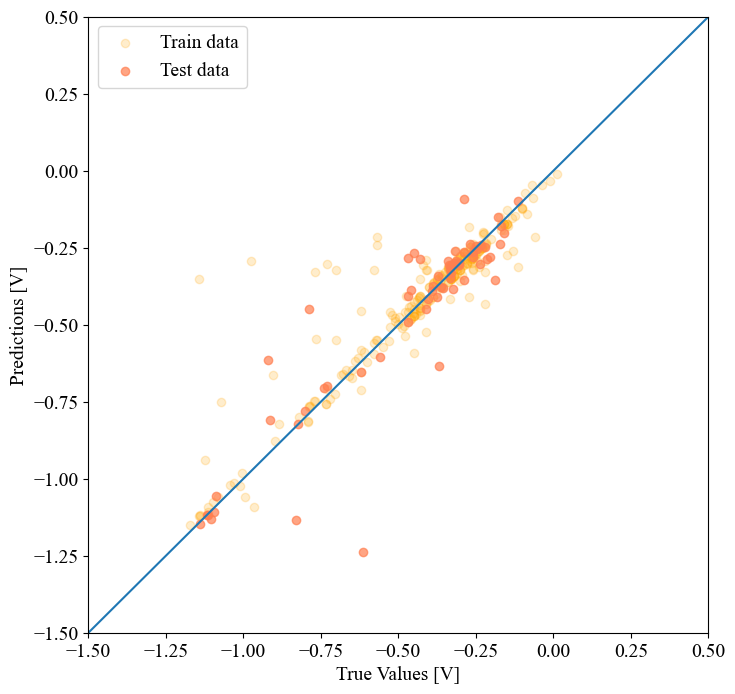

In [31]:
# 模型在训练集以及验证集上的表现情况图
test_predictions = BO_svm.predict(X_test).flatten()
train_predictions = BO_svm.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'orange', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='coral', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [32]:
# 保存训练好的模型
dump(BO_svm, open('D:\IPython\Corrosion-ML\saved_model2\支持向量机\贝叶斯优化模型\BOSVM_5.pkl', 'wb'))

# 梯度提升决策树

In [33]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 定义Gradient Boosting回归器
gbdt = GradientBoostingRegressor()

# 训练模型
gbdt.fit(X_train, y_train)

GradientBoostingRegressor()

In [34]:
print('梯度提升决策树初训练回归模型评价指标展示：')

# 预测测试集
y_pred_test = gbdt.predict(X_test)

# 预测训练集
y_pred_train = gbdt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

梯度提升决策树初训练回归模型评价指标展示：
测试集上的R^2 Score:  0.7616872188598578
训练集上的R^2 Score:  0.8595923924779117
测试集上的MAE: 0.10087524484140233
训练集上的MAE: 0.06449069539210005
测试集上的MSE: 0.01907990608208793
训练集上的MSE: 0.008972428631012346
测试集上的RMSE: 0.1381300332371202
训练集上的RMSE: 0.0947229044688366


<Figure size 800x600 with 0 Axes>

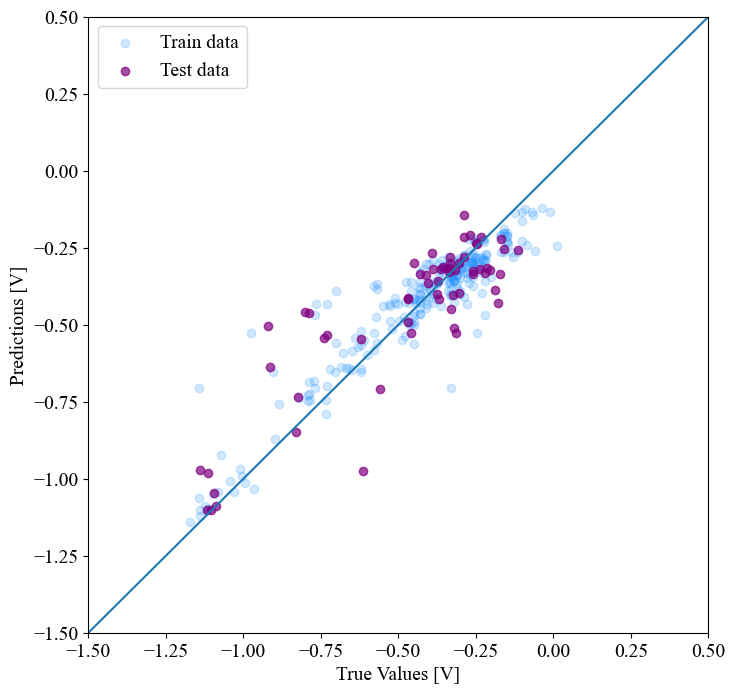

In [35]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = gbdt.predict(X_test).flatten()
train_predictions = gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [36]:
# 保存训练好的模型
dump(gbdt, open('D:\IPython\Corrosion-ML\saved_model2\梯度提升决策树\初训练模型\GBDT_5.pkl', 'wb'))

# 交叉验证

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# 定义Gradient Boosting回归器
cv_gbdt = GradientBoostingRegressor()

# 预测训练集
y_pred_train_cv = cross_val_predict(cv_gbdt, X_train, y_train, cv=5)

# 在整个训练集上拟合模型
cv_gbdt.fit(X_train, y_train)

# 预测测试集
y_pred_test_cv = cv_gbdt.predict(X_test)

In [38]:
print('梯度提升决策树交叉验证回归模型评价指标展示：')

# 计算R^2分数
score_test = cv_gbdt.score(X_test, y_test)
print('测试集上的R^2分数：', score_test)

# 计算R^2分数
score_train = cv_gbdt.score(X_train, y_train)
print('训练集上的R^2分数：', score_train)

mae_test = mean_absolute_error(y_test, y_pred_test_cv)
mae_train = mean_absolute_error(y_train, y_pred_train_cv)

mse_test = mean_squared_error(y_test, y_pred_test_cv)
mse_train = mean_squared_error(y_train, y_pred_train_cv)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

梯度提升决策树交叉验证回归模型评价指标展示：
测试集上的R^2分数： 0.7602346508067095
训练集上的R^2分数： 0.8595923924779117
测试集上的MAE: 0.10161528145980825
训练集上的MAE: 0.13874606277856386
测试集上的MSE: 0.01919620224505206
训练集上的MSE: 0.03695035294969489
测试集上的RMSE: 0.13855035996002343
训练集上的RMSE: 0.19222474593479086


<Figure size 800x600 with 0 Axes>

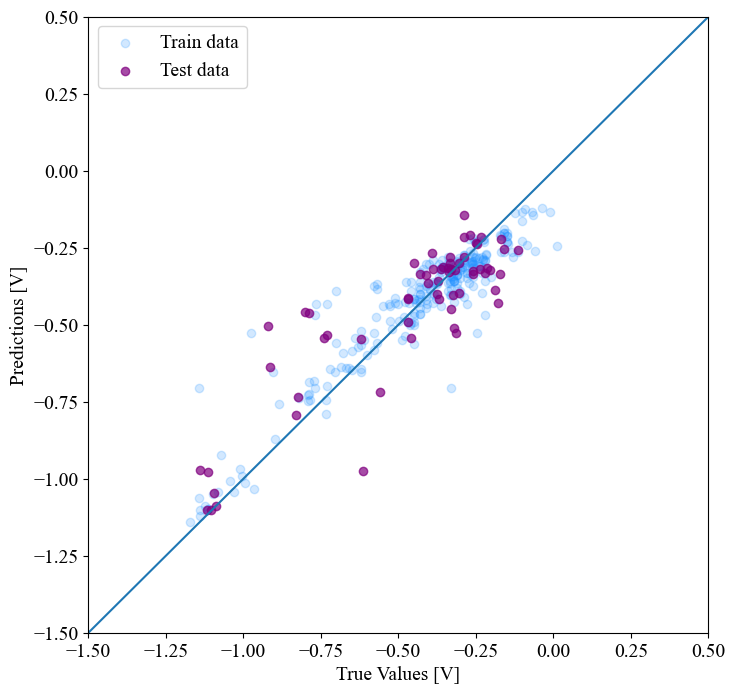

In [39]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = cv_gbdt.predict(X_test).flatten()
train_predictions = cv_gbdt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [40]:
# 保存训练好的模型
dump(cv_gbdt, open('D:\IPython\Corrosion-ML\saved_model2\梯度提升决策树\交叉验证模型\CVGBDT_5.pkl', 'wb'))

# 贝叶斯优化

In [41]:
import optuna

# 定义目标函数
def objective(trial):
    # 定义超参数搜索空间
    n_estimators = trial.suggest_int('n_estimators', 10, 1000, log=True)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
    max_depth = trial.suggest_int('max_depth', 2, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
        
    # 构建梯度提升树模型
    BOmodel = GradientBoostingRegressor(n_estimators=n_estimators,
                                       learning_rate=learning_rate,
                                       max_depth=max_depth,
                                       max_features=max_features,
                                       loss='squared_error',
                                       random_state=42)
    # 训练模型
    BOmodel.fit(X_train, y_train)
    
    # 计算预测误差
    y_pred = BOmodel.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# 运行优化搜索算法
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 打印最优参数
print(f'Best params: {study.best_params}')

# 构建梯度提升树模型，并使用最优参数进行训练和预测
BOmodel = GradientBoostingRegressor(n_estimators=study.best_params['n_estimators'],
                                   learning_rate=study.best_params['learning_rate'],
                                   max_depth=study.best_params['max_depth'],
                                   max_features=study.best_params['max_features'],
                                   loss='squared_error',
                                    random_state=42)
BOmodel.fit(X_train, y_train)

# 预测测试集
y_pred_test = BOmodel.predict(X_test)

# 预测训练集
y_pred_train = BOmodel.predict(X_train)

[I 2024-01-03 16:41:51,939] A new study created in memory with name: no-name-be0d37de-93b9-427b-be9c-f471e70b25f9
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:51,978] Trial 0 finished with value: 0.04161482718628344 and parameters: {'n_estimators': 50, 'learning_rate': 0.012283087622948365, 'max_depth': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.04161482718628344.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_logunifor

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:55,538] Trial 14 finished with value: 0.03539988382829911 and parameters: {'n_estimators': 947, 'learning_rate': 0.001049625645261753, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.015639151244558596.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:41:55,844] Trial 15 finished with value: 0.017508011664587774 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:01,059] Trial 28 finished with value: 0.01824899250464285 and parameters: {'n_estimators': 726, 'learning_rate': 0.1497468712648618, 'max_depth': 7, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.015639151244558596.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:01,703] Trial 29 finished with value: 0.016351129042205367 and 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:07,718] Trial 42 finished with value: 0.016621056689665112 and parameters: {'n_estimators': 441, 'learning_rate': 0.03055957241072491, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 12 with value: 0.015639151244558596.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:08,024] Trial 43 finished with value: 0.017273180863136003 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:14,877] Trial 56 finished with value: 0.016250754582298285 and parameters: {'n_estimators': 562, 'learning_rate': 0.022731394148737295, 'max_depth': 5, 'max_features': 'sqrt'}. Best is trial 54 with value: 0.015524966807938053.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:15,237] Trial 57 finished with value: 0.01739574310808644 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:21,547] Trial 70 finished with value: 0.017623329207804354 and parameters: {'n_estimators': 627, 'learning_rate': 0.0774801862240498, 'max_depth': 3, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:21,852] Trial 71 finished with value: 0.01701124160448261 and 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:27,270] Trial 84 finished with value: 0.015574938694209345 and parameters: {'n_estimators': 400, 'learning_rate': 0.04519311641922525, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:27,683] Trial 85 finished with value: 0.01608774493063156 and

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:33,004] Trial 98 finished with value: 0.015965776236827694 and parameters: {'n_estimators': 358, 'learning_rate': 0.03128724400288721, 'max_depth': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:33,752] Trial 99 finished with value: 0.016713572269053376 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:41,096] Trial 112 finished with value: 0.0160572863337091 and parameters: {'n_estimators': 470, 'learning_rate': 0.02866212358502148, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:41,366] Trial 113 finished with value: 0.015895302208806222 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:49,851] Trial 126 finished with value: 0.0165201207592559 and parameters: {'n_estimators': 529, 'learning_rate': 0.03053385436025461, 'max_depth': 5, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:50,511] Trial 127 finished with value: 0.01654148426074092 and

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:57,023] Trial 140 finished with value: 0.016321254617895704 and parameters: {'n_estimators': 740, 'learning_rate': 0.021224950540611937, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:42:57,377] Trial 141 finished with value: 0.016310851283913314

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:03,327] Trial 154 finished with value: 0.015792308654995577 and parameters: {'n_estimators': 516, 'learning_rate': 0.03174089869360666, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:04,009] Trial 155 finished with value: 0.01595141985262606 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:11,187] Trial 168 finished with value: 0.01613590070092739 and parameters: {'n_estimators': 595, 'learning_rate': 0.06398624755611172, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:11,901] Trial 169 finished with value: 0.01654926238232731 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:17,998] Trial 182 finished with value: 0.016289627873132526 and parameters: {'n_estimators': 366, 'learning_rate': 0.02869041150700158, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:18,203] Trial 183 finished with value: 0.017833737908427908 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:24,081] Trial 196 finished with value: 0.015984691496016945 and parameters: {'n_estimators': 476, 'learning_rate': 0.027359887808211258, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:24,791] Trial 197 finished with value: 0.016061771195952344

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:30,503] Trial 210 finished with value: 0.01641795522378482 and parameters: {'n_estimators': 306, 'learning_rate': 0.03131432164798412, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:31,069] Trial 211 finished with value: 0.015585816918534683 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:36,614] Trial 224 finished with value: 0.01584031806319693 and parameters: {'n_estimators': 437, 'learning_rate': 0.03477767460794671, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:37,150] Trial 225 finished with value: 0.016389925911449655 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:43,694] Trial 238 finished with value: 0.016083398075500632 and parameters: {'n_estimators': 525, 'learning_rate': 0.03670417587325306, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:44,605] Trial 239 finished with value: 0.01715549360928879 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:51,079] Trial 252 finished with value: 0.01579284685219935 and parameters: {'n_estimators': 722, 'learning_rate': 0.03175886105956, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:51,821] Trial 253 finished with value: 0.016086820081767393 and 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:58,844] Trial 266 finished with value: 0.016729031576417735 and parameters: {'n_estimators': 423, 'learning_rate': 0.022346765653578543, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:43:59,827] Trial 267 finished with value: 0.016431904378015675

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:08,594] Trial 280 finished with value: 0.016518793708646912 and parameters: {'n_estimators': 635, 'learning_rate': 0.053314588506813546, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:09,019] Trial 281 finished with value: 0.02519634509144855 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:15,700] Trial 294 finished with value: 0.01595894522662067 and parameters: {'n_estimators': 637, 'learning_rate': 0.08912773458882463, 'max_depth': 4, 'max_features': 'sqrt'}. Best is trial 61 with value: 0.015141609328790304.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:16,525] Trial 295 finished with value: 0.017086847370086332 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:26,993] Trial 308 finished with value: 0.014463129081830938 and parameters: {'n_estimators': 955, 'learning_rate': 0.1786013957486967, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 308 with value: 0.014463129081830938.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:27,925] Trial 309 finished with value: 0.014441456267161682 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:40,162] Trial 322 finished with value: 0.01607106742391255 and parameters: {'n_estimators': 914, 'learning_rate': 0.14803495072637973, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 316 with value: 0.013656424712865085.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:41,125] Trial 323 finished with value: 0.015243875015020208 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:51,281] Trial 336 finished with value: 0.015744139796071685 and parameters: {'n_estimators': 885, 'learning_rate': 0.1263448545648345, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 316 with value: 0.013656424712865085.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:44:52,031] Trial 337 finished with value: 0.015792285241865302 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:02,906] Trial 350 finished with value: 0.014760294608029287 and parameters: {'n_estimators': 855, 'learning_rate': 0.14131786100080826, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 316 with value: 0.013656424712865085.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:03,949] Trial 351 finished with value: 0.014290464411066977

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:11,044] Trial 364 finished with value: 0.014415260639787798 and parameters: {'n_estimators': 783, 'learning_rate': 0.1403686308290626, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 316 with value: 0.013656424712865085.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:11,598] Trial 365 finished with value: 0.015337998787156172 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:18,917] Trial 378 finished with value: 0.015236108680339455 and parameters: {'n_estimators': 743, 'learning_rate': 0.1830966623932931, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 316 with value: 0.013656424712865085.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:19,571] Trial 379 finished with value: 0.019491326348621347 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:26,867] Trial 392 finished with value: 0.02005585322335871 and parameters: {'n_estimators': 77, 'learning_rate': 0.09866049298326308, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 316 with value: 0.013656424712865085.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:27,386] Trial 393 finished with value: 0.012897059202217911 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:31,790] Trial 406 finished with value: 0.015890965445317047 and parameters: {'n_estimators': 176, 'learning_rate': 0.1951943892132807, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:31,966] Trial 407 finished with value: 0.016947226648284155 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:34,141] Trial 420 finished with value: 0.015211706314859637 and parameters: {'n_estimators': 221, 'learning_rate': 0.3146948894197218, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:34,293] Trial 421 finished with value: 0.017070798025136495 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:36,581] Trial 434 finished with value: 0.016413981777337765 and parameters: {'n_estimators': 186, 'learning_rate': 0.1462974960718354, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:36,806] Trial 435 finished with value: 0.017632345855653164 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:39,070] Trial 448 finished with value: 0.022781705664486368 and parameters: {'n_estimators': 241, 'learning_rate': 0.4558405772160675, 'max_depth': 8, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:39,240] Trial 449 finished with value: 0.018367581579927413 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:42,055] Trial 462 finished with value: 0.02860488053832255 and parameters: {'n_estimators': 137, 'learning_rate': 0.6469968935194456, 'max_depth': 9, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:42,292] Trial 463 finished with value: 0.017410161014506303 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:44,095] Trial 476 finished with value: 0.01925460669794415 and parameters: {'n_estimators': 127, 'learning_rate': 0.287601690464697, 'max_depth': 6, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:44,160] Trial 477 finished with value: 0.01647245311164269 and

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:45,665] Trial 490 finished with value: 0.0161584014274559 and parameters: {'n_estimators': 150, 'learning_rate': 0.22296089609326855, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:45,773] Trial 491 finished with value: 0.015917598631708316 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:47,068] Trial 504 finished with value: 0.023824013979454543 and parameters: {'n_estimators': 102, 'learning_rate': 0.4959809309595917, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:47,255] Trial 505 finished with value: 0.014591086404917198 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:48,632] Trial 518 finished with value: 0.06130044937517782 and parameters: {'n_estimators': 117, 'learning_rate': 0.002211058731774608, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:48,793] Trial 519 finished with value: 0.023051431100749545

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:50,006] Trial 532 finished with value: 0.015376283178814974 and parameters: {'n_estimators': 90, 'learning_rate': 0.3244714377290887, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:50,095] Trial 533 finished with value: 0.015358346738067205 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:51,313] Trial 546 finished with value: 0.01563951075775599 and parameters: {'n_estimators': 63, 'learning_rate': 0.3544332729827195, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:51,397] Trial 547 finished with value: 0.018014237096806017 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:52,616] Trial 560 finished with value: 0.014774120680925908 and parameters: {'n_estimators': 95, 'learning_rate': 0.37686794704414345, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:52,685] Trial 561 finished with value: 0.013504407320175917 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:53,763] Trial 574 finished with value: 0.02254796328822769 and parameters: {'n_estimators': 110, 'learning_rate': 0.5752770989163991, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:53,888] Trial 575 finished with value: 0.01586848690069995 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:55,296] Trial 588 finished with value: 0.015990278415035603 and parameters: {'n_estimators': 44, 'learning_rate': 0.2392452845865197, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:55,359] Trial 589 finished with value: 0.01616818437517384 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:56,362] Trial 602 finished with value: 0.01775444256331183 and parameters: {'n_estimators': 39, 'learning_rate': 0.4174510134995347, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:56,428] Trial 603 finished with value: 0.013622961941101446 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:57,293] Trial 616 finished with value: 0.014954237992985193 and parameters: {'n_estimators': 45, 'learning_rate': 0.2363019487945468, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:57,363] Trial 617 finished with value: 0.01960412741312245 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:58,776] Trial 630 finished with value: 0.061118302972005205 and parameters: {'n_estimators': 118, 'learning_rate': 0.002198355879511692, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:45:58,903] Trial 631 finished with value: 0.01475443132239899

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:00,737] Trial 644 finished with value: 0.017946541587781636 and parameters: {'n_estimators': 40, 'learning_rate': 0.3686244903341138, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:00,867] Trial 645 finished with value: 0.018433909662850686 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:02,559] Trial 658 finished with value: 0.019316195881646195 and parameters: {'n_estimators': 82, 'learning_rate': 0.4195197608281551, 'max_depth': 6, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:02,750] Trial 659 finished with value: 0.01434182628505715 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:04,701] Trial 672 finished with value: 0.019547615747751185 and parameters: {'n_estimators': 257, 'learning_rate': 0.45069121237395904, 'max_depth': 5, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:04,895] Trial 673 finished with value: 0.02176995955638085 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:06,871] Trial 686 finished with value: 0.07395950328891623 and parameters: {'n_estimators': 34, 'learning_rate': 0.0024251222556123313, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:07,030] Trial 687 finished with value: 0.03070534559793226 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:08,824] Trial 700 finished with value: 0.017167036104634634 and parameters: {'n_estimators': 120, 'learning_rate': 0.05929462774337946, 'max_depth': 5, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:09,084] Trial 701 finished with value: 0.015370269374517787

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:11,194] Trial 714 finished with value: 0.0183602827210596 and parameters: {'n_estimators': 44, 'learning_rate': 0.08781484559249994, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:11,284] Trial 715 finished with value: 0.017107591034104426 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:14,015] Trial 728 finished with value: 0.013912263819736143 and parameters: {'n_estimators': 21, 'learning_rate': 0.31966639292222127, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:14,072] Trial 729 finished with value: 0.013589798807788192 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:14,844] Trial 742 finished with value: 0.023617077690810603 and parameters: {'n_estimators': 27, 'learning_rate': 0.48722394820585957, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:14,903] Trial 743 finished with value: 0.02090668126991912 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:15,673] Trial 756 finished with value: 0.02337785932566146 and parameters: {'n_estimators': 17, 'learning_rate': 0.27499261133213343, 'max_depth': 3, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:15,736] Trial 757 finished with value: 0.015396986805025333 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:16,526] Trial 770 finished with value: 0.07858389343019329 and parameters: {'n_estimators': 25, 'learning_rate': 0.0011281335590779067, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:16,584] Trial 771 finished with value: 0.014040351627892661

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:17,468] Trial 784 finished with value: 0.07147107576126073 and parameters: {'n_estimators': 34, 'learning_rate': 0.002538953208994767, 'max_depth': 8, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:17,562] Trial 785 finished with value: 0.017045462448825918 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:18,678] Trial 798 finished with value: 0.01738171319230447 and parameters: {'n_estimators': 88, 'learning_rate': 0.05384330395502432, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:18,791] Trial 799 finished with value: 0.05337281304834402 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:20,424] Trial 812 finished with value: 0.050049745054918916 and parameters: {'n_estimators': 150, 'learning_rate': 0.0031955108181424834, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:20,496] Trial 813 finished with value: 0.0175169685197634

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:22,941] Trial 826 finished with value: 0.01574526262484531 and parameters: {'n_estimators': 13, 'learning_rate': 0.33910433534137646, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:23,105] Trial 827 finished with value: 0.022502555889910975 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:25,423] Trial 840 finished with value: 0.015841966179033603 and parameters: {'n_estimators': 296, 'learning_rate': 0.09164145229293383, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:25,499] Trial 841 finished with value: 0.02324236108387145 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:27,070] Trial 854 finished with value: 0.015515131883317863 and parameters: {'n_estimators': 48, 'learning_rate': 0.3819708589915338, 'max_depth': 6, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:27,581] Trial 855 finished with value: 0.017736655063797294 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:29,589] Trial 868 finished with value: 0.07201616984159294 and parameters: {'n_estimators': 36, 'learning_rate': 0.0029480316652912065, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:29,666] Trial 869 finished with value: 0.018537058152531417

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:32,288] Trial 882 finished with value: 0.0185720873741224 and parameters: {'n_estimators': 51, 'learning_rate': 0.4412170521855031, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:32,392] Trial 883 finished with value: 0.031142505500444596 and

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:34,783] Trial 896 finished with value: 0.01741611613185994 and parameters: {'n_estimators': 20, 'learning_rate': 0.39091412181962254, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:34,941] Trial 897 finished with value: 0.05493788214598943 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:37,418] Trial 910 finished with value: 0.01463446000456215 and parameters: {'n_estimators': 65, 'learning_rate': 0.15953722079193905, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:37,517] Trial 911 finished with value: 0.017653301336334123 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:39,426] Trial 924 finished with value: 0.05148955030137176 and parameters: {'n_estimators': 44, 'learning_rate': 0.010207121897887007, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:39,638] Trial 925 finished with value: 0.014656232293670857 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:42,727] Trial 938 finished with value: 0.028526247495842053 and parameters: {'n_estimators': 38, 'learning_rate': 0.8589614059886876, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:42,857] Trial 939 finished with value: 0.04147979484952214 an

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:45,573] Trial 952 finished with value: 0.014730425783419947 and parameters: {'n_estimators': 788, 'learning_rate': 0.15525756380125483, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:46,151] Trial 953 finished with value: 0.02077055268936507 

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:49,843] Trial 966 finished with value: 0.0162211350500242 and parameters: {'n_estimators': 581, 'learning_rate': 0.08259330942986028, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:49,990] Trial 967 finished with value: 0.013187226356984643 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:51,692] Trial 980 finished with value: 0.01407717412416538 and parameters: {'n_estimators': 106, 'learning_rate': 0.1688185300482809, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:51,838] Trial 981 finished with value: 0.028880640013382676 a

D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:53,366] Trial 994 finished with value: 0.01447556530126465 and parameters: {'n_estimators': 90, 'learning_rate': 0.23066351071481397, 'max_depth': 4, 'max_features': 'log2'}. Best is trial 393 with value: 0.012897059202217911.
D:\Python\temp\ipykernel_10276\1794821862.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
[I 2024-01-03 16:46:53,511] Trial 995 finished with value: 0.017134276252261205 a

Best params: {'n_estimators': 735, 'learning_rate': 0.17525559539388066, 'max_depth': 4, 'max_features': 'log2'}


In [42]:
print('梯度提升决策树贝叶斯优化回归模型评价指标展示：')

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

梯度提升决策树贝叶斯优化回归模型评价指标展示：
测试集上的R^2 Score:  0.8389125169806247
训练集上的R^2 Score:  0.9380397184278618
测试集上的MAE: 0.08262644222902063
训练集上的MAE: 0.0145387520377207
测试集上的MSE: 0.012897059202217911
训练集上的MSE: 0.003959430789930542
测试集上的RMSE: 0.11356522003772947
训练集上的RMSE: 0.06292400805678658


<Figure size 800x600 with 0 Axes>

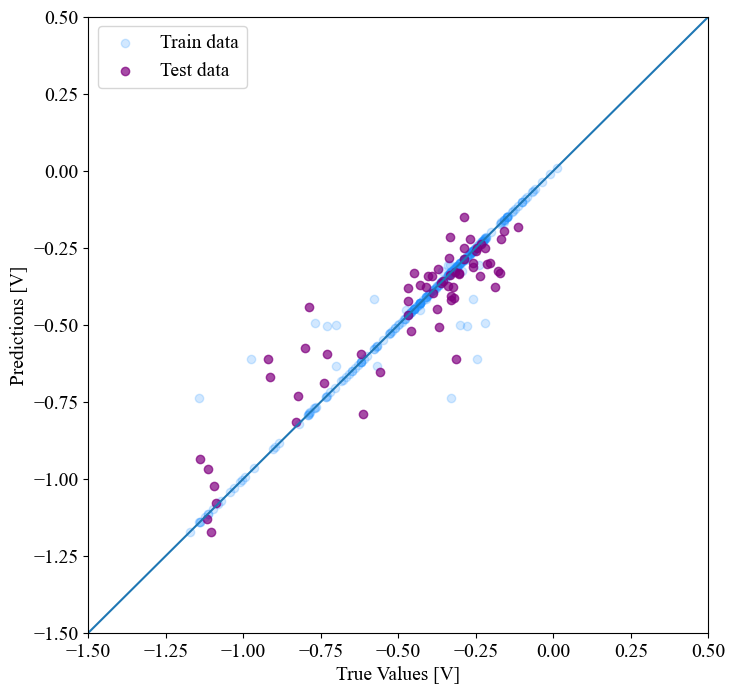

In [43]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = BOmodel.predict(X_test).flatten()
train_predictions = BOmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [44]:
# 保存训练好的模型
dump(BOmodel, open('D:\IPython\Corrosion-ML\saved_model2\梯度提升决策树\贝叶斯优化模型\BOGBDT_5.pkl', 'wb'))

# 极端梯度提升

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# 创建XGBoost回归模型
xgbt = xgb.XGBRegressor()

# 在训练集上拟合模型
xgbt.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
print('极端梯度提升初训练模型评价指标展示：')

# 预测测试集
y_pred_test = xgbt.predict(X_test)

# 预测训练集
y_pred_train = xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

极端梯度提升初训练模型评价指标展示：
测试集上的R^2 Score:  0.7364129127400605
训练集上的R^2 Score:  0.9379862227069486
测试集上的MAE: 0.10458553684420054
训练集上的MAE: 0.01569555117015446
测试集上的MSE: 0.02110342905365735
训练集上的MSE: 0.003962849312234491
测试集上的RMSE: 0.14527019327328422
训练集上的RMSE: 0.06295116609114156


<Figure size 800x600 with 0 Axes>

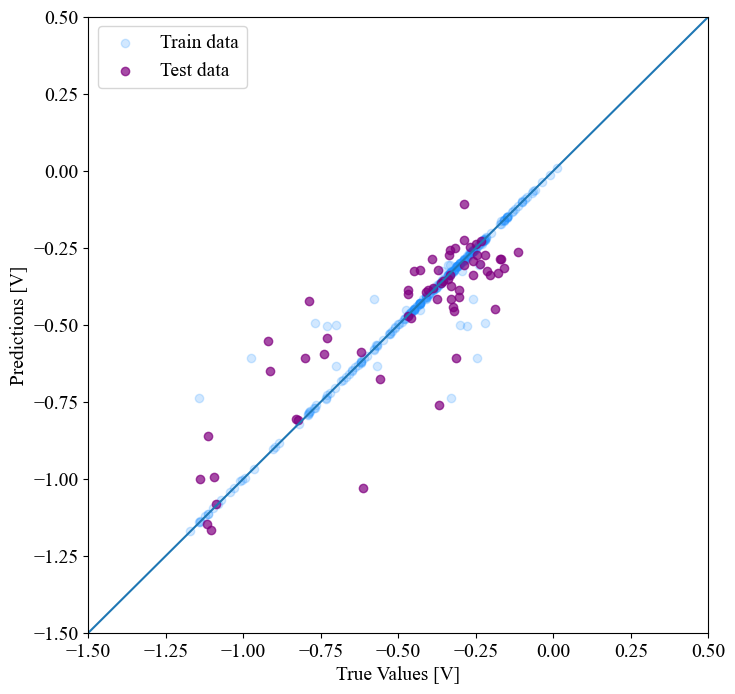

In [47]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = xgbt.predict(X_test).flatten()
train_predictions = xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [48]:
# 保存训练好的模型
dump(xgbt, open('D:\IPython\Corrosion-ML\saved_model2\极端梯度提升\初训练模型\XGBT_5.pkl', 'wb'))

# 贝叶斯优化

In [49]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000, log=True),
        'max_depth': trial.suggest_int('max_depth', 2, 30, step=2),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.5),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }

    BO_xgbt = XGBRegressor(**params, random_state=42)
    BO_xgbt.fit(X_train, y_train)
    
    # 计算指标
    y_pred = BO_xgbt.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# 运行贝叶斯优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print('Best MSE:', study.best_value)

# 输出最佳超参数
best_params_xgb = study.best_params
print('Best params for XGBoost:', best_params_xgb)

# 训练最佳模型
BO_xgbt = XGBRegressor(**best_params_xgb, random_state=42)
BO_xgbt.fit(X_train, y_train)

[I 2024-01-03 16:46:55,502] A new study created in memory with name: no-name-42b6ede0-fefb-460f-ac2b-628221c5f4bd
[I 2024-01-03 16:46:56,152] Trial 0 finished with value: 0.02308863580649803 and parameters: {'n_estimators': 298, 'max_depth': 26, 'learning_rate': 0.26286567568838703, 'subsample': 0.6293297870848247, 'colsample_bytree': 0.8310996674216827, 'min_child_weight': 3}. Best is trial 0 with value: 0.02308863580649803.
[I 2024-01-03 16:46:56,509] Trial 1 finished with value: 0.027559512204499773 and parameters: {'n_estimators': 244, 'max_depth': 16, 'learning_rate': 0.174104089828494, 'subsample': 0.18055478809045367, 'colsample_bytree': 0.5836522032313042, 'min_child_weight': 1}. Best is trial 0 with value: 0.02308863580649803.
[I 2024-01-03 16:46:56,524] Trial 2 finished with value: 0.035065368917054314 and parameters: {'n_estimators': 10, 'max_depth': 8, 'learning_rate': 0.247365147833588, 'subsample': 0.4487977689802045, 'colsample_bytree': 0.4068511596730897, 'min_child_wei

[I 2024-01-03 16:46:59,381] Trial 25 finished with value: 0.023718147509616604 and parameters: {'n_estimators': 42, 'max_depth': 28, 'learning_rate': 0.4964103521869948, 'subsample': 0.7021360299886219, 'colsample_bytree': 0.5285305377878453, 'min_child_weight': 8}. Best is trial 22 with value: 0.018078478111907662.
[I 2024-01-03 16:46:59,580] Trial 26 finished with value: 0.020174817123724913 and parameters: {'n_estimators': 80, 'max_depth': 22, 'learning_rate': 0.40770841553954396, 'subsample': 0.9200563225470462, 'colsample_bytree': 0.4817730771597128, 'min_child_weight': 5}. Best is trial 22 with value: 0.018078478111907662.
[I 2024-01-03 16:46:59,633] Trial 27 finished with value: 0.022270592840951144 and parameters: {'n_estimators': 15, 'max_depth': 18, 'learning_rate': 0.3309591867144646, 'subsample': 0.7907935837559728, 'colsample_bytree': 0.7101547666456162, 'min_child_weight': 9}. Best is trial 22 with value: 0.018078478111907662.
[I 2024-01-03 16:46:59,711] Trial 28 finished

[I 2024-01-03 16:47:02,543] Trial 50 finished with value: 0.020902769816280368 and parameters: {'n_estimators': 152, 'max_depth': 16, 'learning_rate': 0.38786607364022213, 'subsample': 0.9700120587220064, 'colsample_bytree': 0.7969595148226977, 'min_child_weight': 7}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:02,629] Trial 51 finished with value: 0.022585925453026397 and parameters: {'n_estimators': 38, 'max_depth': 30, 'learning_rate': 0.23594334369459952, 'subsample': 0.8744492787573004, 'colsample_bytree': 0.7418769797043672, 'min_child_weight': 9}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:02,733] Trial 52 finished with value: 0.020062085773235715 and parameters: {'n_estimators': 45, 'max_depth': 30, 'learning_rate': 0.3737775518627204, 'subsample': 0.9016524269875142, 'colsample_bytree': 0.6952471596706927, 'min_child_weight': 9}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:02,867] Trial 53 finish

[I 2024-01-03 16:47:05,030] Trial 75 finished with value: 0.02155972652585707 and parameters: {'n_estimators': 57, 'max_depth': 14, 'learning_rate': 0.49920161222339, 'subsample': 0.7832681251457412, 'colsample_bytree': 0.6387306441280672, 'min_child_weight': 2}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:05,095] Trial 76 finished with value: 0.018680217218035273 and parameters: {'n_estimators': 19, 'max_depth': 26, 'learning_rate': 0.4416692557131797, 'subsample': 0.8882910856493766, 'colsample_bytree': 0.7351378883659456, 'min_child_weight': 8}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:05,157] Trial 77 finished with value: 0.022950611969707286 and parameters: {'n_estimators': 19, 'max_depth': 26, 'learning_rate': 0.439144733856832, 'subsample': 0.8807263911606459, 'colsample_bytree': 0.7436219425253354, 'min_child_weight': 8}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:05,223] Trial 78 finished with

[I 2024-01-03 16:47:06,512] Trial 100 finished with value: 0.018910189468419072 and parameters: {'n_estimators': 16, 'max_depth': 30, 'learning_rate': 0.43307972330765004, 'subsample': 0.8051128788533177, 'colsample_bytree': 0.6977889571613298, 'min_child_weight': 10}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:06,569] Trial 101 finished with value: 0.020023523475642277 and parameters: {'n_estimators': 18, 'max_depth': 30, 'learning_rate': 0.42975836765392583, 'subsample': 0.794980110430711, 'colsample_bytree': 0.6997575782842972, 'min_child_weight': 10}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:06,628] Trial 102 finished with value: 0.01958709436463395 and parameters: {'n_estimators': 16, 'max_depth': 28, 'learning_rate': 0.4402009277735664, 'subsample': 0.9015175291338811, 'colsample_bytree': 0.7539522822714146, 'min_child_weight': 10}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:06,681] Trial 103 fi

[I 2024-01-03 16:47:08,313] Trial 125 finished with value: 0.02404242489801759 and parameters: {'n_estimators': 27, 'max_depth': 28, 'learning_rate': 0.4421849703440035, 'subsample': 0.8131782921864363, 'colsample_bytree': 0.7662615778921398, 'min_child_weight': 9}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:08,376] Trial 126 finished with value: 0.023311372296158178 and parameters: {'n_estimators': 21, 'max_depth': 24, 'learning_rate': 0.4820882042589041, 'subsample': 0.7562611221062873, 'colsample_bytree': 0.6909183737262439, 'min_child_weight': 10}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:08,464] Trial 127 finished with value: 0.020573205397410362 and parameters: {'n_estimators': 40, 'max_depth': 28, 'learning_rate': 0.39796407409085893, 'subsample': 0.7837586534583058, 'colsample_bytree': 0.6510499661832576, 'min_child_weight': 10}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:08,546] Trial 128 fin

[I 2024-01-03 16:47:10,736] Trial 150 finished with value: 0.023164826252811365 and parameters: {'n_estimators': 79, 'max_depth': 24, 'learning_rate': 0.45700400341664166, 'subsample': 0.959837320723352, 'colsample_bytree': 0.6263027941954579, 'min_child_weight': 9}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:10,812] Trial 151 finished with value: 0.020552341516478133 and parameters: {'n_estimators': 22, 'max_depth': 26, 'learning_rate': 0.42377382466163216, 'subsample': 0.9095417146417973, 'colsample_bytree': 0.8366428105116119, 'min_child_weight': 9}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:10,869] Trial 152 finished with value: 0.020130840725592566 and parameters: {'n_estimators': 15, 'max_depth': 20, 'learning_rate': 0.43723466560598695, 'subsample': 0.9362128766785415, 'colsample_bytree': 0.7403042376583528, 'min_child_weight': 10}. Best is trial 44 with value: 0.018012794350030774.
[I 2024-01-03 16:47:10,931] Trial 153 fi

[I 2024-01-03 16:47:13,231] Trial 175 finished with value: 0.02234896102086645 and parameters: {'n_estimators': 31, 'max_depth': 30, 'learning_rate': 0.36644276833434497, 'subsample': 0.7752917535575781, 'colsample_bytree': 0.6660618658958811, 'min_child_weight': 9}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:13,345] Trial 176 finished with value: 0.026755283055967638 and parameters: {'n_estimators': 50, 'max_depth': 26, 'learning_rate': 0.39407317214352483, 'subsample': 0.8423132178114245, 'colsample_bytree': 0.745675658843664, 'min_child_weight': 9}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:13,519] Trial 177 finished with value: 0.02196505523820461 and parameters: {'n_estimators': 95, 'max_depth': 28, 'learning_rate': 0.22763346961360276, 'subsample': 0.7909554653275958, 'colsample_bytree': 0.6351828029822147, 'min_child_weight': 8}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:13,627] Trial 178 fi

[I 2024-01-03 16:47:16,166] Trial 200 finished with value: 0.018316893660883717 and parameters: {'n_estimators': 41, 'max_depth': 14, 'learning_rate': 0.22872769408890292, 'subsample': 0.7875244722633896, 'colsample_bytree': 0.7965791038220092, 'min_child_weight': 4}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:16,290] Trial 201 finished with value: 0.01618541620698982 and parameters: {'n_estimators': 41, 'max_depth': 14, 'learning_rate': 0.22138795780765133, 'subsample': 0.7803646264129833, 'colsample_bytree': 0.7971237910829851, 'min_child_weight': 4}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:16,412] Trial 202 finished with value: 0.02013744240022333 and parameters: {'n_estimators': 41, 'max_depth': 14, 'learning_rate': 0.2160602976328428, 'subsample': 0.7876057457389831, 'colsample_bytree': 0.7956827073977369, 'min_child_weight': 4}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:16,539] Trial 203 fi

[I 2024-01-03 16:47:19,106] Trial 225 finished with value: 0.018057968012380382 and parameters: {'n_estimators': 32, 'max_depth': 14, 'learning_rate': 0.25458558713028157, 'subsample': 0.8156987447596185, 'colsample_bytree': 0.7682044830089878, 'min_child_weight': 3}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:19,221] Trial 226 finished with value: 0.0192848750656993 and parameters: {'n_estimators': 32, 'max_depth': 16, 'learning_rate': 0.24693227964675513, 'subsample': 0.8350907231364979, 'colsample_bytree': 0.7718167353680678, 'min_child_weight': 3}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:19,340] Trial 227 finished with value: 0.018614104412495287 and parameters: {'n_estimators': 34, 'max_depth': 16, 'learning_rate': 0.25519343834732877, 'subsample': 0.8041965672670801, 'colsample_bytree': 0.7684229412898806, 'min_child_weight': 3}. Best is trial 161 with value: 0.016028311412516302.
[I 2024-01-03 16:47:19,443] Trial 228 f

[I 2024-01-03 16:47:22,514] Trial 250 finished with value: 0.020242252713434373 and parameters: {'n_estimators': 39, 'max_depth': 16, 'learning_rate': 0.20512682499581736, 'subsample': 0.7643177372971843, 'colsample_bytree': 0.7896809880192026, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:22,662] Trial 251 finished with value: 0.018854665578245503 and parameters: {'n_estimators': 46, 'max_depth': 16, 'learning_rate': 0.2142768635708923, 'subsample': 0.8310355792413018, 'colsample_bytree': 0.804427495148487, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:22,809] Trial 252 finished with value: 0.01924389432202041 and parameters: {'n_estimators': 57, 'max_depth': 18, 'learning_rate': 0.18481776891587276, 'subsample': 0.7841145160718295, 'colsample_bytree': 0.7792526954772953, 'min_child_weight': 5}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:22,928] Trial 253 fi

[I 2024-01-03 16:47:25,206] Trial 275 finished with value: 0.017580890384182996 and parameters: {'n_estimators': 36, 'max_depth': 14, 'learning_rate': 0.24877785567268754, 'subsample': 0.8481455791851984, 'colsample_bytree': 0.8019911322111203, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:25,314] Trial 276 finished with value: 0.018362365603674356 and parameters: {'n_estimators': 31, 'max_depth': 12, 'learning_rate': 0.25355378275729257, 'subsample': 0.8595398275845754, 'colsample_bytree': 0.8111327361293987, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:25,415] Trial 277 finished with value: 0.021871950192867345 and parameters: {'n_estimators': 26, 'max_depth': 14, 'learning_rate': 0.24453586000075275, 'subsample': 0.8470815822973832, 'colsample_bytree': 0.7951034999504112, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:25,537] Trial 278

[I 2024-01-03 16:47:32,800] Trial 300 finished with value: 0.02195094892661828 and parameters: {'n_estimators': 460, 'max_depth': 10, 'learning_rate': 0.20015618249339912, 'subsample': 0.729587170076187, 'colsample_bytree': 0.9789682610264163, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:32,923] Trial 301 finished with value: 0.017546762332699858 and parameters: {'n_estimators': 38, 'max_depth': 12, 'learning_rate': 0.21502089793693596, 'subsample': 0.8585749453190809, 'colsample_bytree': 0.9548502786588458, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:33,016] Trial 302 finished with value: 0.02235644837607222 and parameters: {'n_estimators': 23, 'max_depth': 16, 'learning_rate': 0.14656280224477908, 'subsample': 0.8359306617840915, 'colsample_bytree': 0.7757752294864355, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:33,558] Trial 303 f

[I 2024-01-03 16:47:38,586] Trial 325 finished with value: 0.024716974524037302 and parameters: {'n_estimators': 58, 'max_depth': 14, 'learning_rate': 0.22896763532249176, 'subsample': 0.746996888020852, 'colsample_bytree': 0.7272038787237654, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:38,750] Trial 326 finished with value: 0.0207535293889601 and parameters: {'n_estimators': 45, 'max_depth': 16, 'learning_rate': 0.20870538118136767, 'subsample': 0.702973792255545, 'colsample_bytree': 0.7933392865925277, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:39,079] Trial 327 finished with value: 0.02023296319212548 and parameters: {'n_estimators': 128, 'max_depth': 14, 'learning_rate': 0.25180819943579, 'subsample': 0.7955031309615179, 'colsample_bytree': 0.8324869815794239, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:39,207] Trial 328 finish

[I 2024-01-03 16:47:42,360] Trial 350 finished with value: 0.02646127031496452 and parameters: {'n_estimators': 24, 'max_depth': 22, 'learning_rate': 0.2997631009550979, 'subsample': 0.14998859370630002, 'colsample_bytree': 0.5553987225724076, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:42,480] Trial 351 finished with value: 0.022635057442679383 and parameters: {'n_estimators': 35, 'max_depth': 14, 'learning_rate': 0.2248224566852968, 'subsample': 0.6275156348348563, 'colsample_bytree': 0.8697519312340056, 'min_child_weight': 6}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:42,618] Trial 352 finished with value: 0.01755101522071881 and parameters: {'n_estimators': 31, 'max_depth': 18, 'learning_rate': 0.2585420039037177, 'subsample': 0.7672167283180567, 'colsample_bytree': 0.729604309991819, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:42,732] Trial 353 fini

[I 2024-01-03 16:47:45,871] Trial 375 finished with value: 0.01866773274788602 and parameters: {'n_estimators': 43, 'max_depth': 12, 'learning_rate': 0.21975091456578172, 'subsample': 0.751184007959286, 'colsample_bytree': 0.5960247542636165, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:45,986] Trial 376 finished with value: 0.017176742001547618 and parameters: {'n_estimators': 30, 'max_depth': 16, 'learning_rate': 0.18976204801840074, 'subsample': 0.8157110492749402, 'colsample_bytree': 0.7791443007775118, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:46,057] Trial 377 finished with value: 0.02262090913938415 and parameters: {'n_estimators': 10, 'max_depth': 14, 'learning_rate': 0.3391053501289151, 'subsample': 0.49597680995221743, 'colsample_bytree': 0.7209609315503746, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:46,181] Trial 378 fi

[I 2024-01-03 16:47:49,649] Trial 400 finished with value: 0.023772403650422998 and parameters: {'n_estimators': 33, 'max_depth': 14, 'learning_rate': 0.46478762661013623, 'subsample': 0.8059967170046076, 'colsample_bytree': 0.8076897772624964, 'min_child_weight': 5}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:49,796] Trial 401 finished with value: 0.02207234349292954 and parameters: {'n_estimators': 45, 'max_depth': 12, 'learning_rate': 0.35356619591780813, 'subsample': 0.8752944334105426, 'colsample_bytree': 0.7536103594047212, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:49,981] Trial 402 finished with value: 0.021249553433074338 and parameters: {'n_estimators': 55, 'max_depth': 16, 'learning_rate': 0.3649817288480921, 'subsample': 0.8308818623182186, 'colsample_bytree': 0.7369817791204786, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:50,090] Trial 403 f

[I 2024-01-03 16:47:53,961] Trial 425 finished with value: 0.018766357728984395 and parameters: {'n_estimators': 27, 'max_depth': 12, 'learning_rate': 0.1687488076503158, 'subsample': 0.7193702728697723, 'colsample_bytree': 0.8151037504390972, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:54,060] Trial 426 finished with value: 0.022891892607406046 and parameters: {'n_estimators': 31, 'max_depth': 12, 'learning_rate': 0.10394763027426918, 'subsample': 0.6704730426924642, 'colsample_bytree': 0.5420826275238309, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:54,192] Trial 427 finished with value: 0.019302354895775593 and parameters: {'n_estimators': 54, 'max_depth': 12, 'learning_rate': 0.07750134246483578, 'subsample': 0.6215917987892952, 'colsample_bytree': 0.8406064578701324, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:54,412] Trial 428 

[I 2024-01-03 16:47:58,537] Trial 450 finished with value: 0.01882043916061622 and parameters: {'n_estimators': 67, 'max_depth': 12, 'learning_rate': 0.1519910825212359, 'subsample': 0.6221269017336998, 'colsample_bytree': 0.7477296640603892, 'min_child_weight': 5}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:58,701] Trial 451 finished with value: 0.018916137063584176 and parameters: {'n_estimators': 47, 'max_depth': 14, 'learning_rate': 0.13144559016520915, 'subsample': 0.6519342277857757, 'colsample_bytree': 0.7989048923833891, 'min_child_weight': 1}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:58,850] Trial 452 finished with value: 0.02083669763830898 and parameters: {'n_estimators': 56, 'max_depth': 14, 'learning_rate': 0.19200808457917112, 'subsample': 0.6863713761443728, 'colsample_bytree': 0.46713232197322224, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:47:58,986] Trial 453 f

[I 2024-01-03 16:48:04,680] Trial 475 finished with value: 0.01783634208424272 and parameters: {'n_estimators': 23, 'max_depth': 12, 'learning_rate': 0.21665633578808619, 'subsample': 0.6895266865284742, 'colsample_bytree': 0.7440794564418713, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:04,782] Trial 476 finished with value: 0.017164006992995053 and parameters: {'n_estimators': 26, 'max_depth': 10, 'learning_rate': 0.20302739879544904, 'subsample': 0.681028267961517, 'colsample_bytree': 0.726114809918813, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:04,929] Trial 477 finished with value: 0.018428576457960148 and parameters: {'n_estimators': 57, 'max_depth': 10, 'learning_rate': 0.1539239252521557, 'subsample': 0.668109811034689, 'colsample_bytree': 0.7259520518885433, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:06,318] Trial 478 fini

[I 2024-01-03 16:48:10,388] Trial 500 finished with value: 0.02534515714190808 and parameters: {'n_estimators': 86, 'max_depth': 12, 'learning_rate': 0.22583188910543783, 'subsample': 0.6217396309958145, 'colsample_bytree': 0.7886188964640499, 'min_child_weight': 1}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:10,835] Trial 501 finished with value: 0.017460614941977304 and parameters: {'n_estimators': 195, 'max_depth': 14, 'learning_rate': 0.06863064941511501, 'subsample': 0.6376427878324926, 'colsample_bytree': 0.7556529899362354, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:10,954] Trial 502 finished with value: 0.02270635084009399 and parameters: {'n_estimators': 32, 'max_depth': 12, 'learning_rate': 0.23685921691229903, 'subsample': 0.5913899913359111, 'colsample_bytree': 0.7177620105704127, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:11,083] Trial 503 

[I 2024-01-03 16:48:15,870] Trial 525 finished with value: 0.018033748863540876 and parameters: {'n_estimators': 312, 'max_depth': 16, 'learning_rate': 0.2652518695546888, 'subsample': 0.7696580934210535, 'colsample_bytree': 0.7710933400425113, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:16,314] Trial 526 finished with value: 0.027098200123250975 and parameters: {'n_estimators': 170, 'max_depth': 24, 'learning_rate': 0.4645541451750076, 'subsample': 0.8123267261777244, 'colsample_bytree': 0.7227206026599415, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:16,753] Trial 527 finished with value: 0.020183954410644953 and parameters: {'n_estimators': 201, 'max_depth': 12, 'learning_rate': 0.2095043979857568, 'subsample': 0.5996538433876664, 'colsample_bytree': 0.7936733768069009, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:16,956] Trial 528

[I 2024-01-03 16:48:20,785] Trial 550 finished with value: 0.0202266727558771 and parameters: {'n_estimators': 42, 'max_depth': 14, 'learning_rate': 0.21896502748325306, 'subsample': 0.8240006499691263, 'colsample_bytree': 0.58259280246545, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:20,864] Trial 551 finished with value: 0.044417751165038453 and parameters: {'n_estimators': 13, 'max_depth': 12, 'learning_rate': 0.18842225131800466, 'subsample': 0.27908864661715693, 'colsample_bytree': 0.7316447529893569, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:20,975] Trial 552 finished with value: 0.018877262254503854 and parameters: {'n_estimators': 30, 'max_depth': 12, 'learning_rate': 0.2314807580816472, 'subsample': 0.4128317661245438, 'colsample_bytree': 0.8148000994159931, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:21,156] Trial 553 fin

[I 2024-01-03 16:48:27,051] Trial 575 finished with value: 0.026728107191703515 and parameters: {'n_estimators': 57, 'max_depth': 16, 'learning_rate': 0.37935416075698136, 'subsample': 0.640872540859016, 'colsample_bytree': 0.6842462432187292, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:27,213] Trial 576 finished with value: 0.022929883258806502 and parameters: {'n_estimators': 49, 'max_depth': 14, 'learning_rate': 0.22520320748764755, 'subsample': 0.7150465591504891, 'colsample_bytree': 0.8068371564211523, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:27,368] Trial 577 finished with value: 0.020701321179939943 and parameters: {'n_estimators': 68, 'max_depth': 8, 'learning_rate': 0.09157969625916476, 'subsample': 0.7731114771602682, 'colsample_bytree': 0.5181386914174602, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:27,596] Trial 578 f

[I 2024-01-03 16:48:32,717] Trial 600 finished with value: 0.02453133939997663 and parameters: {'n_estimators': 55, 'max_depth': 12, 'learning_rate': 0.3585188979082109, 'subsample': 0.7844991259258918, 'colsample_bytree': 0.5295601178178934, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:32,862] Trial 601 finished with value: 0.02708558292161211 and parameters: {'n_estimators': 46, 'max_depth': 10, 'learning_rate': 0.4900150783394811, 'subsample': 0.7615696166354786, 'colsample_bytree': 0.8726493520181368, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:32,998] Trial 602 finished with value: 0.019735862527854073 and parameters: {'n_estimators': 37, 'max_depth': 12, 'learning_rate': 0.4693862850270251, 'subsample': 0.7880356550543245, 'colsample_bytree': 0.4800175224975639, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:33,157] Trial 603 fini

[I 2024-01-03 16:48:38,236] Trial 625 finished with value: 0.025434294620189757 and parameters: {'n_estimators': 96, 'max_depth': 16, 'learning_rate': 0.3648497437445743, 'subsample': 0.4257699881353665, 'colsample_bytree': 0.4426314356764364, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:38,396] Trial 626 finished with value: 0.026677502427180835 and parameters: {'n_estimators': 40, 'max_depth': 24, 'learning_rate': 0.46386507093661244, 'subsample': 0.806320819145956, 'colsample_bytree': 0.9937480571708595, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:38,488] Trial 627 finished with value: 0.03086226605755788 and parameters: {'n_estimators': 19, 'max_depth': 12, 'learning_rate': 0.3878772282454025, 'subsample': 0.23991996178502795, 'colsample_bytree': 0.49684759485056373, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:39,070] Trial 628 f

[I 2024-01-03 16:48:44,749] Trial 650 finished with value: 0.024832108565339742 and parameters: {'n_estimators': 121, 'max_depth': 14, 'learning_rate': 0.48253290968571705, 'subsample': 0.6762514633834049, 'colsample_bytree': 0.7613907296883, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:44,896] Trial 651 finished with value: 0.01889995657918994 and parameters: {'n_estimators': 26, 'max_depth': 14, 'learning_rate': 0.4281955330424927, 'subsample': 0.9381767901501987, 'colsample_bytree': 0.7906432537460564, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:45,038] Trial 652 finished with value: 0.024535326989388092 and parameters: {'n_estimators': 37, 'max_depth': 10, 'learning_rate': 0.4750780477370365, 'subsample': 0.3858358371339321, 'colsample_bytree': 0.9098268775228131, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:45,588] Trial 653 fini

[I 2024-01-03 16:48:51,352] Trial 675 finished with value: 0.023706902957094888 and parameters: {'n_estimators': 46, 'max_depth': 16, 'learning_rate': 0.47878165125293876, 'subsample': 0.6825051539558111, 'colsample_bytree': 0.5286322523470208, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:51,536] Trial 676 finished with value: 0.02560536863549449 and parameters: {'n_estimators': 56, 'max_depth': 12, 'learning_rate': 0.4665679253243138, 'subsample': 0.6205596537917359, 'colsample_bytree': 0.8177862575912953, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:51,733] Trial 677 finished with value: 0.023603674567170416 and parameters: {'n_estimators': 62, 'max_depth': 14, 'learning_rate': 0.49669218904662515, 'subsample': 0.6563622506899854, 'colsample_bytree': 0.7986944788043067, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:48:52,690] Trial 678 f

[I 2024-01-03 16:49:01,200] Trial 700 finished with value: 0.028351034849273163 and parameters: {'n_estimators': 28, 'max_depth': 12, 'learning_rate': 0.20635060375737752, 'subsample': 0.3237180094172912, 'colsample_bytree': 0.7214558208558642, 'min_child_weight': 8}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:01,323] Trial 701 finished with value: 0.023672340154797678 and parameters: {'n_estimators': 45, 'max_depth': 14, 'learning_rate': 0.2233936563535558, 'subsample': 0.30908995408183015, 'colsample_bytree': 0.6144638103113593, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:01,484] Trial 702 finished with value: 0.02510233964889682 and parameters: {'n_estimators': 38, 'max_depth': 16, 'learning_rate': 0.4852491462148887, 'subsample': 0.7976515118178344, 'colsample_bytree': 0.776214296087109, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:01,727] Trial 703 fi

[I 2024-01-03 16:49:06,142] Trial 725 finished with value: 0.029067382143757533 and parameters: {'n_estimators': 47, 'max_depth': 12, 'learning_rate': 0.3065586816710544, 'subsample': 0.4240843456272169, 'colsample_bytree': 0.7135469092362727, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:06,828] Trial 726 finished with value: 0.02766937852161325 and parameters: {'n_estimators': 426, 'max_depth': 14, 'learning_rate': 0.2234808347585565, 'subsample': 0.6514795189468324, 'colsample_bytree': 0.8239571501678836, 'min_child_weight': 8}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:06,946] Trial 727 finished with value: 0.027486192849334012 and parameters: {'n_estimators': 31, 'max_depth': 6, 'learning_rate': 0.4842999023387102, 'subsample': 0.7921015115481442, 'colsample_bytree': 0.33454889473148497, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:07,107] Trial 728 fi

[I 2024-01-03 16:49:13,159] Trial 750 finished with value: 0.02077450219727544 and parameters: {'n_estimators': 35, 'max_depth': 10, 'learning_rate': 0.25427276623466044, 'subsample': 0.8659469240148003, 'colsample_bytree': 0.7695843421319809, 'min_child_weight': 8}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:13,343] Trial 751 finished with value: 0.019416973044625904 and parameters: {'n_estimators': 57, 'max_depth': 12, 'learning_rate': 0.20914557171526868, 'subsample': 0.8159793009565054, 'colsample_bytree': 0.8458348547469068, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:13,447] Trial 752 finished with value: 0.05114025825182465 and parameters: {'n_estimators': 25, 'max_depth': 12, 'learning_rate': 0.0853614238039552, 'subsample': 0.8007799385663337, 'colsample_bytree': 0.3632864477289535, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:13,579] Trial 753 fi

[I 2024-01-03 16:49:19,559] Trial 775 finished with value: 0.025300117687065082 and parameters: {'n_estimators': 153, 'max_depth': 10, 'learning_rate': 0.26016422314997434, 'subsample': 0.46617577396365967, 'colsample_bytree': 0.8872088200010418, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:19,709] Trial 776 finished with value: 0.022604903091081166 and parameters: {'n_estimators': 29, 'max_depth': 14, 'learning_rate': 0.24380165639247012, 'subsample': 0.7670076943690296, 'colsample_bytree': 0.9392919004894398, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:20,868] Trial 777 finished with value: 0.02430563312917513 and parameters: {'n_estimators': 893, 'max_depth': 8, 'learning_rate': 0.14078912217269413, 'subsample': 0.4503091860608252, 'colsample_bytree': 0.7898955232579635, 'min_child_weight': 5}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:21,008] Trial 77

[I 2024-01-03 16:49:29,864] Trial 800 finished with value: 0.0162983325634693 and parameters: {'n_estimators': 632, 'max_depth': 12, 'learning_rate': 0.1290278461161473, 'subsample': 0.6458765829197259, 'colsample_bytree': 0.7821288697937594, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:30,618] Trial 801 finished with value: 0.024481014318139826 and parameters: {'n_estimators': 428, 'max_depth': 12, 'learning_rate': 0.1252089886310701, 'subsample': 0.6262557884789133, 'colsample_bytree': 0.32192909000893344, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:31,295] Trial 802 finished with value: 0.03248912357203644 and parameters: {'n_estimators': 558, 'max_depth': 12, 'learning_rate': 0.11788376673942325, 'subsample': 0.9774904227845802, 'colsample_bytree': 0.1690115683473351, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:31,906] Trial 803 

[I 2024-01-03 16:49:45,743] Trial 825 finished with value: 0.015407642744225767 and parameters: {'n_estimators': 984, 'max_depth': 12, 'learning_rate': 0.2099846268320875, 'subsample': 0.7580249320356462, 'colsample_bytree': 0.5515726804351564, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:47,065] Trial 826 finished with value: 0.01651831953398071 and parameters: {'n_estimators': 628, 'max_depth': 12, 'learning_rate': 0.21034653844529505, 'subsample': 0.7539811892333376, 'colsample_bytree': 0.5629117370412389, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:48,791] Trial 827 finished with value: 0.020772617369167915 and parameters: {'n_estimators': 886, 'max_depth': 12, 'learning_rate': 0.21036257798101754, 'subsample': 0.7289607656323633, 'colsample_bytree': 0.5565383435145648, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:49:50,582] Trial 82

[I 2024-01-03 16:50:16,051] Trial 850 finished with value: 0.023391397489833335 and parameters: {'n_estimators': 740, 'max_depth': 14, 'learning_rate': 0.47346791475566, 'subsample': 0.7616743893606032, 'colsample_bytree': 0.8033123378463106, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:50:17,122] Trial 851 finished with value: 0.018998226759659627 and parameters: {'n_estimators': 510, 'max_depth': 22, 'learning_rate': 0.2137065944011076, 'subsample': 0.7115498846124495, 'colsample_bytree': 0.6083037250764133, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:50:17,815] Trial 852 finished with value: 0.05320435063350455 and parameters: {'n_estimators': 364, 'max_depth': 12, 'learning_rate': 0.48855810429174207, 'subsample': 0.5600132984299659, 'colsample_bytree': 0.36667004850428286, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:50:18,642] Trial 853 

[I 2024-01-03 16:50:39,535] Trial 875 finished with value: 0.01838667598518032 and parameters: {'n_estimators': 840, 'max_depth': 8, 'learning_rate': 0.22296978586018432, 'subsample': 0.7761892987027031, 'colsample_bytree': 0.7787411217224539, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:50:39,827] Trial 876 finished with value: 0.023548110021756948 and parameters: {'n_estimators': 245, 'max_depth': 12, 'learning_rate': 0.3229374294977624, 'subsample': 0.9999649850991894, 'colsample_bytree': 0.5823273073170183, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:50:41,139] Trial 877 finished with value: 0.02259209438388871 and parameters: {'n_estimators': 741, 'max_depth': 14, 'learning_rate': 0.41488723706607805, 'subsample': 0.9076190410325551, 'colsample_bytree': 0.7941904821040217, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:50:42,372] Trial 878 

[I 2024-01-03 16:51:01,369] Trial 900 finished with value: 0.020581147713496218 and parameters: {'n_estimators': 333, 'max_depth': 6, 'learning_rate': 0.3610784078528213, 'subsample': 0.8189619062191162, 'colsample_bytree': 0.5124984958178247, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:01,757] Trial 901 finished with value: 0.029351206180824495 and parameters: {'n_estimators': 447, 'max_depth': 4, 'learning_rate': 0.41242706578777727, 'subsample': 0.8596028688808909, 'colsample_bytree': 0.21558068664107272, 'min_child_weight': 2}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:02,338] Trial 902 finished with value: 0.02607860094619581 and parameters: {'n_estimators': 237, 'max_depth': 14, 'learning_rate': 0.4892287823505864, 'subsample': 0.7300130150349812, 'colsample_bytree': 0.7911621003231348, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:02,581] Trial 903 

[I 2024-01-03 16:51:17,984] Trial 925 finished with value: 0.017476968894331705 and parameters: {'n_estimators': 42, 'max_depth': 8, 'learning_rate': 0.13318483395127267, 'subsample': 0.6098382151584718, 'colsample_bytree': 0.6806637883725366, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:18,488] Trial 926 finished with value: 0.022890818442871008 and parameters: {'n_estimators': 324, 'max_depth': 8, 'learning_rate': 0.3723076759026878, 'subsample': 0.6501324731859863, 'colsample_bytree': 0.6326360699457777, 'min_child_weight': 4}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:18,673] Trial 927 finished with value: 0.02164244553500905 and parameters: {'n_estimators': 77, 'max_depth': 6, 'learning_rate': 0.3246097049646537, 'subsample': 0.6890897665352037, 'colsample_bytree': 0.7679198974212861, 'min_child_weight': 1}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:19,019] Trial 928 fini

[I 2024-01-03 16:51:30,880] Trial 950 finished with value: 0.04095096291454417 and parameters: {'n_estimators': 739, 'max_depth': 22, 'learning_rate': 0.43387203696466364, 'subsample': 0.5384069949675877, 'colsample_bytree': 0.207300994813036, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:30,993] Trial 951 finished with value: 0.018041766134092595 and parameters: {'n_estimators': 13, 'max_depth': 10, 'learning_rate': 0.4660709811514807, 'subsample': 0.8490676120111291, 'colsample_bytree': 0.8251779913804713, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:31,273] Trial 952 finished with value: 0.019281965781898575 and parameters: {'n_estimators': 155, 'max_depth': 8, 'learning_rate': 0.29967020297912306, 'subsample': 0.6601265070154162, 'colsample_bytree': 0.7015989290218205, 'min_child_weight': 6}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:31,467] Trial 953 f

[I 2024-01-03 16:51:38,625] Trial 975 finished with value: 0.020313281373395727 and parameters: {'n_estimators': 24, 'max_depth': 12, 'learning_rate': 0.26424219259642073, 'subsample': 0.8613127199517362, 'colsample_bytree': 0.7337612750981939, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:38,914] Trial 976 finished with value: 0.020355924037747677 and parameters: {'n_estimators': 137, 'max_depth': 12, 'learning_rate': 0.26823822359689, 'subsample': 0.8957468958214826, 'colsample_bytree': 0.7189878992905337, 'min_child_weight': 10}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:39,042] Trial 977 finished with value: 0.020752799179707057 and parameters: {'n_estimators': 19, 'max_depth': 12, 'learning_rate': 0.24874500518705409, 'subsample': 0.8468226036845595, 'colsample_bytree': 0.7014518218273694, 'min_child_weight': 3}. Best is trial 239 with value: 0.014843910184004876.
[I 2024-01-03 16:51:39,166] Trial 978 

Best MSE: 0.014843910184004876
Best params for XGBoost: {'n_estimators': 49, 'max_depth': 16, 'learning_rate': 0.21843053199819587, 'subsample': 0.8246274887111613, 'colsample_bytree': 0.8040683304560802, 'min_child_weight': 3}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8040683304560802, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.21843053199819587,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=49, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [50]:
print('极端梯度提升贝叶斯优化模型评价指标展示：')

# 预测测试集
y_pred_test = BO_xgbt.predict(X_test)

# 预测训练集
y_pred_train = BO_xgbt.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

极端梯度提升贝叶斯优化模型评价指标展示：
测试集上的R^2 Score:  0.8145958631177093
训练集上的R^2 Score:  0.9341723554352706
测试集上的MAE: 0.09150658099802712
训练集上的MAE: 0.023011990837398025
测试集上的MSE: 0.014843910184004876
训练集上的MSE: 0.004206565820956444
测试集上的RMSE: 0.12183558668962396
训练集上的RMSE: 0.06485804361030668


<Figure size 800x600 with 0 Axes>

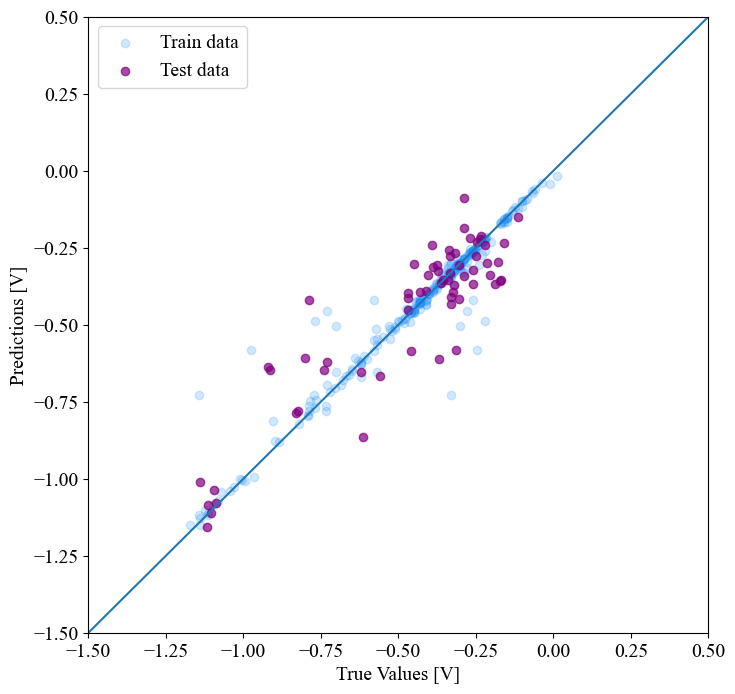

In [51]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = BO_xgbt.predict(X_test).flatten()
train_predictions = BO_xgbt.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [52]:
# 保存训练好的模型
dump(BO_xgbt, open('D:\IPython\Corrosion-ML\saved_model2\极端梯度提升\贝叶斯优化模型\BOXGBT_5.pkl', 'wb'))

# 岭回归

In [53]:
from sklearn.linear_model import Ridge

# 创建岭回归模型
rr = Ridge()

# 在训练集上拟合模型
rr.fit(X_train, y_train)

Ridge()

In [54]:
print('岭回归初训练模型评价指标展示：')

# 预测测试集
y_pred_test = rr.predict(X_test)

# 预测训练集
y_pred_train = rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

岭回归初训练模型评价指标展示：
测试集上的R^2 Score:  0.536517536664052
训练集上的R^2 Score:  0.424871900145551
测试集上的MAE: 0.15509745379446546
训练集上的MAE: 0.1469602141776691
测试集上的MSE: 0.03710754340928242
训练集上的MSE: 0.036752252393603344
测试集上的RMSE: 0.192633183562133
训练集上的RMSE: 0.19170876973577225


<Figure size 800x600 with 0 Axes>

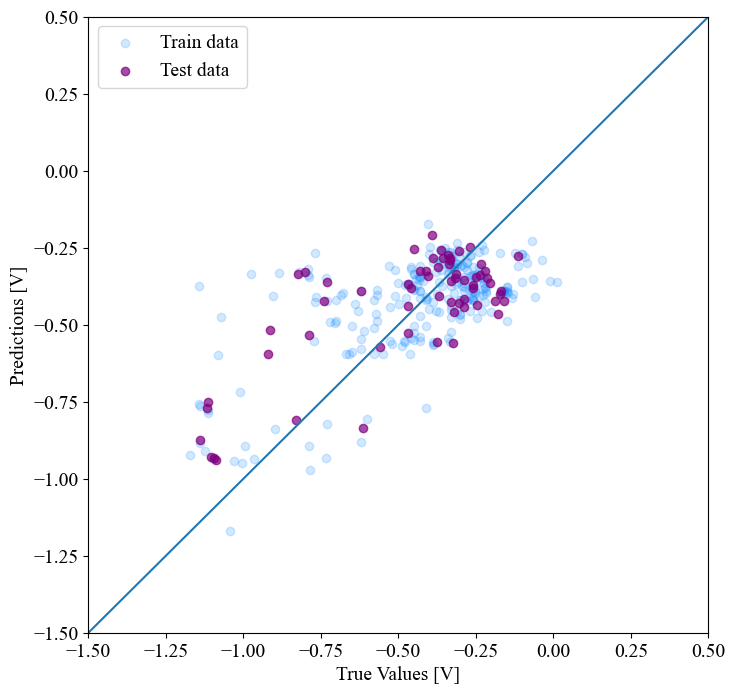

In [55]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = rr.predict(X_test).flatten()
train_predictions = rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [56]:
# 保存训练好的模型
dump(rr, open('D:\IPython\Corrosion-ML\saved_model2\岭回归\初训练模型\RR_5.pkl', 'wb'))

# 贝叶斯优化

In [57]:
import optuna

# 定义岭回归的目标函数
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 10.0, log=True)
    
    # 创建岭回归模型
    BO_rr = Ridge(alpha=alpha, random_state=42)
    
    # 在训练集上拟合模型
    BO_rr.fit(X_train, y_train)
    
    # 在测试集上进行预测
    y_pred = BO_rr.predict(X_test)
    
    # 计算均方误差
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# 运行贝叶斯优化
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

# 输出最佳均方误差和最佳超参数
best_params_ridge = study.best_params
print('Best MSE:', study.best_value)
print('Best params for Ridge Regression:', best_params_ridge)

# 使用最佳超参数初始化岭回归模型
BO_rr = Ridge(**best_params_ridge, random_state=42)

# 在训练集上拟合最佳模型
BO_rr.fit(X_train, y_train)

[I 2024-01-03 16:51:49,533] A new study created in memory with name: no-name-794e3460-8924-4e22-9469-95c0b10bdd73
[I 2024-01-03 16:51:49,539] Trial 0 finished with value: 0.03744202130104722 and parameters: {'alpha': 5.002922242421484}. Best is trial 0 with value: 0.03744202130104722.
[I 2024-01-03 16:51:49,543] Trial 1 finished with value: 0.0370484764536715 and parameters: {'alpha': 0.2793233670198037}. Best is trial 1 with value: 0.0370484764536715.
[I 2024-01-03 16:51:49,546] Trial 2 finished with value: 0.03702756151954263 and parameters: {'alpha': 0.02295026848032585}. Best is trial 2 with value: 0.03702756151954263.
[I 2024-01-03 16:51:49,551] Trial 3 finished with value: 0.03706180911508574 and parameters: {'alpha': 0.44242178178589736}. Best is trial 2 with value: 0.03702756151954263.
[I 2024-01-03 16:51:49,554] Trial 4 finished with value: 0.03704458826984437 and parameters: {'alpha': 0.2317109519566607}. Best is trial 2 with value: 0.03702756151954263.
[I 2024-01-03 16:51:49

[I 2024-01-03 16:51:49,879] Trial 43 finished with value: 0.037026513783474095 and parameters: {'alpha': 0.010090204376197495}. Best is trial 43 with value: 0.037026513783474095.
[I 2024-01-03 16:51:49,889] Trial 44 finished with value: 0.03702736683338197 and parameters: {'alpha': 0.02056078653512621}. Best is trial 43 with value: 0.037026513783474095.
[I 2024-01-03 16:51:49,898] Trial 45 finished with value: 0.03702690173713638 and parameters: {'alpha': 0.014852195166569562}. Best is trial 43 with value: 0.037026513783474095.
[I 2024-01-03 16:51:49,908] Trial 46 finished with value: 0.037028093923370364 and parameters: {'alpha': 0.02948444138428039}. Best is trial 43 with value: 0.037026513783474095.
[I 2024-01-03 16:51:49,917] Trial 47 finished with value: 0.03702933119714977 and parameters: {'alpha': 0.044667823644940374}. Best is trial 43 with value: 0.037026513783474095.
[I 2024-01-03 16:51:49,925] Trial 48 finished with value: 0.03702650835476239 and parameters: {'alpha': 0.0100

[I 2024-01-03 16:51:50,282] Trial 87 finished with value: 0.037026516102719655 and parameters: {'alpha': 0.01011867294497411}. Best is trial 66 with value: 0.03702650674023355.
[I 2024-01-03 16:51:50,290] Trial 88 finished with value: 0.03702670997169238 and parameters: {'alpha': 0.012498371893267453}. Best is trial 66 with value: 0.03702650674023355.
[I 2024-01-03 16:51:50,298] Trial 89 finished with value: 0.03702695461220723 and parameters: {'alpha': 0.015501200088701391}. Best is trial 66 with value: 0.03702650674023355.
[I 2024-01-03 16:51:50,306] Trial 90 finished with value: 0.03702734544225984 and parameters: {'alpha': 0.020298238995120173}. Best is trial 66 with value: 0.03702650674023355.
[I 2024-01-03 16:51:50,314] Trial 91 finished with value: 0.03702652544726661 and parameters: {'alpha': 0.010233376491423056}. Best is trial 66 with value: 0.03702650674023355.
[I 2024-01-03 16:51:50,322] Trial 92 finished with value: 0.03702665755760095 and parameters: {'alpha': 0.011855006

[I 2024-01-03 16:51:50,625] Trial 130 finished with value: 0.03702709053183803 and parameters: {'alpha': 0.01716950035499742}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:50,633] Trial 131 finished with value: 0.03702651163960391 and parameters: {'alpha': 0.010063888519977674}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:50,641] Trial 132 finished with value: 0.03702664272114095 and parameters: {'alpha': 0.011672892554758785}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:50,651] Trial 133 finished with value: 0.03702676101652463 and parameters: {'alpha': 0.013124926615434912}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:50,661] Trial 134 finished with value: 0.03702689820267371 and parameters: {'alpha': 0.01480881193277906}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:50,671] Trial 135 finished with value: 0.03702663165676483 and parameters: {'alpha': 0.01153

[I 2024-01-03 16:51:51,000] Trial 173 finished with value: 0.037026507562089146 and parameters: {'alpha': 0.010013837292800006}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,008] Trial 174 finished with value: 0.037026749530387586 and parameters: {'alpha': 0.012983939257038713}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,016] Trial 175 finished with value: 0.03702663807204989 and parameters: {'alpha': 0.01161582617602704}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,025] Trial 176 finished with value: 0.037026508968824784 and parameters: {'alpha': 0.010031104883675541}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,034] Trial 177 finished with value: 0.03702675583052344 and parameters: {'alpha': 0.013061270721049428}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,044] Trial 178 finished with value: 0.03702689701276705 and parameters: {'alpha': 0.0

[I 2024-01-03 16:51:51,383] Trial 216 finished with value: 0.037026508388669326 and parameters: {'alpha': 0.010023983512712617}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,392] Trial 217 finished with value: 0.037026859967734166 and parameters: {'alpha': 0.014339501688829642}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,401] Trial 218 finished with value: 0.037026628206454276 and parameters: {'alpha': 0.011494728459201537}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,410] Trial 219 finished with value: 0.03702799746986898 and parameters: {'alpha': 0.02830070245465484}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,419] Trial 220 finished with value: 0.0370270570695486 and parameters: {'alpha': 0.016758781185082124}. Best is trial 115 with value: 0.0370265065698555.
[I 2024-01-03 16:51:51,428] Trial 221 finished with value: 0.037026506913634086 and parameters: {'alpha': 0.0

[I 2024-01-03 16:51:51,777] Trial 259 finished with value: 0.037026507719490544 and parameters: {'alpha': 0.010015769385313643}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:51,787] Trial 260 finished with value: 0.03702650707462549 and parameters: {'alpha': 0.0100078537068444}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:51,796] Trial 261 finished with value: 0.037026718251760224 and parameters: {'alpha': 0.012600006650441654}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:51,805] Trial 262 finished with value: 0.037028313036415884 and parameters: {'alpha': 0.03217348490893371}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:51,813] Trial 263 finished with value: 0.03702650654347552 and parameters: {'alpha': 0.010001333873527899}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:51,822] Trial 264 finished with value: 0.03769356346173217 and parameters: {'alpha': 

[I 2024-01-03 16:51:52,218] Trial 302 finished with value: 0.03702662042399684 and parameters: {'alpha': 0.011399200639389605}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,228] Trial 303 finished with value: 0.03703682307315801 and parameters: {'alpha': 0.13655687195059052}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,238] Trial 304 finished with value: 0.037026719070655086 and parameters: {'alpha': 0.01261005827497294}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,247] Trial 305 finished with value: 0.03702690233742266 and parameters: {'alpha': 0.014859563288932112}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,257] Trial 306 finished with value: 0.03702651299466149 and parameters: {'alpha': 0.01008052175748041}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,267] Trial 307 finished with value: 0.03703008167762666 and parameters: {'alpha': 0.

[I 2024-01-03 16:51:52,644] Trial 345 finished with value: 0.037026846313136456 and parameters: {'alpha': 0.01417189941400074}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,654] Trial 346 finished with value: 0.03702940847842403 and parameters: {'alpha': 0.045616116117190325}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,664] Trial 347 finished with value: 0.03702671252175243 and parameters: {'alpha': 0.012529672944018962}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,674] Trial 348 finished with value: 0.037027182232983534 and parameters: {'alpha': 0.018295039935507566}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,684] Trial 349 finished with value: 0.03702660675757912 and parameters: {'alpha': 0.011231448382841768}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:52,695] Trial 350 finished with value: 0.037026512213068824 and parameters: {'alpha'

[I 2024-01-03 16:51:53,093] Trial 388 finished with value: 0.03702678455054248 and parameters: {'alpha': 0.013413795876935159}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:53,104] Trial 389 finished with value: 0.037063262225336215 and parameters: {'alpha': 0.4601823273735788}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:53,115] Trial 390 finished with value: 0.03705571566143872 and parameters: {'alpha': 0.36791220648122747}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:53,126] Trial 391 finished with value: 0.03704200557822962 and parameters: {'alpha': 0.20007266170585072}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:53,137] Trial 392 finished with value: 0.037026627217660826 and parameters: {'alpha': 0.011482591259266926}. Best is trial 249 with value: 0.03702650645752853.
[I 2024-01-03 16:51:53,149] Trial 393 finished with value: 0.03703577648245396 and parameters: {'alpha': 0.

[I 2024-01-03 16:51:53,557] Trial 431 finished with value: 0.03702661955632351 and parameters: {'alpha': 0.011388550149403707}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:53,568] Trial 432 finished with value: 0.037040850484422655 and parameters: {'alpha': 0.18591946554531236}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:53,580] Trial 433 finished with value: 0.0370267402949801 and parameters: {'alpha': 0.012870578486338187}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:53,591] Trial 434 finished with value: 0.03702650761841257 and parameters: {'alpha': 0.010014528659375327}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:53,602] Trial 435 finished with value: 0.037027358032100256 and parameters: {'alpha': 0.020452762604652553}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:53,612] Trial 436 finished with value: 0.037136028711527005 and parameters: {'alpha':

[I 2024-01-03 16:51:54,039] Trial 474 finished with value: 0.03702674552401817 and parameters: {'alpha': 0.012934762761045243}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,050] Trial 475 finished with value: 0.037026620804752296 and parameters: {'alpha': 0.011403874324376062}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,062] Trial 476 finished with value: 0.03702900385741878 and parameters: {'alpha': 0.04065104941341532}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,073] Trial 477 finished with value: 0.037114612001547635 and parameters: {'alpha': 1.085925152278971}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,085] Trial 478 finished with value: 0.03702651147093178 and parameters: {'alpha': 0.010061818081051273}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,096] Trial 479 finished with value: 0.037068246307624904 and parameters: {'alpha': 0

[I 2024-01-03 16:51:54,551] Trial 517 finished with value: 0.037058894846232045 and parameters: {'alpha': 0.4067932739416259}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,565] Trial 518 finished with value: 0.037038409445671244 and parameters: {'alpha': 0.15600333932778782}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,578] Trial 519 finished with value: 0.03702662188146252 and parameters: {'alpha': 0.011417090691830284}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,589] Trial 520 finished with value: 0.037026778498919624 and parameters: {'alpha': 0.013339515064490555}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,601] Trial 521 finished with value: 0.037231484893187665 and parameters: {'alpha': 2.4975387666432023}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:54,612] Trial 522 finished with value: 0.03702661861215377 and parameters: {'alpha': 0

[I 2024-01-03 16:51:55,066] Trial 560 finished with value: 0.0370266238014687 and parameters: {'alpha': 0.011440658316767802}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,079] Trial 561 finished with value: 0.03702923441437296 and parameters: {'alpha': 0.04348022225364201}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,091] Trial 562 finished with value: 0.037027399883876315 and parameters: {'alpha': 0.020966435999126353}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,104] Trial 563 finished with value: 0.037026511963134986 and parameters: {'alpha': 0.01006785984170449}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,116] Trial 564 finished with value: 0.03703983281515517 and parameters: {'alpha': 0.17344849274635687}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,127] Trial 565 finished with value: 0.03702674379573539 and parameters: {'alpha': 0.

[I 2024-01-03 16:51:55,602] Trial 603 finished with value: 0.037185704103943035 and parameters: {'alpha': 1.9465591195787055}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,615] Trial 604 finished with value: 0.03714164796085035 and parameters: {'alpha': 1.4139699775665155}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,627] Trial 605 finished with value: 0.03776438409393388 and parameters: {'alpha': 8.76637359724145}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,640] Trial 606 finished with value: 0.03705547292649458 and parameters: {'alpha': 0.3649429914305678}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,652] Trial 607 finished with value: 0.03703751468431845 and parameters: {'alpha': 0.14503540793030148}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:55,665] Trial 608 finished with value: 0.03702672569293226 and parameters: {'alpha': 0.01269134

[I 2024-01-03 16:51:56,152] Trial 646 finished with value: 0.03704402014477601 and parameters: {'alpha': 0.22475218492727594}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,165] Trial 647 finished with value: 0.03702662554375753 and parameters: {'alpha': 0.011462044498155556}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,177] Trial 648 finished with value: 0.03702669216807149 and parameters: {'alpha': 0.012279838712628699}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,189] Trial 649 finished with value: 0.037027173394111 and parameters: {'alpha': 0.018186552188349584}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,202] Trial 650 finished with value: 0.037032892989604355 and parameters: {'alpha': 0.08836414699771865}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,215] Trial 651 finished with value: 0.037048208253340945 and parameters: {'alpha': 0.

[I 2024-01-03 16:51:56,834] Trial 689 finished with value: 0.0370268354153425 and parameters: {'alpha': 0.014038135107592992}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,848] Trial 690 finished with value: 0.03703527068370734 and parameters: {'alpha': 0.11752339382601174}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,861] Trial 691 finished with value: 0.037027845286972144 and parameters: {'alpha': 0.026432988562923254}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,875] Trial 692 finished with value: 0.03702651009807453 and parameters: {'alpha': 0.010044966350563535}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,887] Trial 693 finished with value: 0.037042286983564585 and parameters: {'alpha': 0.2035203845695514}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:56,900] Trial 694 finished with value: 0.037026699792226454 and parameters: {'alpha': 0

[I 2024-01-03 16:51:57,417] Trial 732 finished with value: 0.03702878781879809 and parameters: {'alpha': 0.03799995964673682}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:57,431] Trial 733 finished with value: 0.03709836225627924 and parameters: {'alpha': 0.8882954055532706}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:57,444] Trial 734 finished with value: 0.03702685257658786 and parameters: {'alpha': 0.014248779685274056}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:57,459] Trial 735 finished with value: 0.03702670729703409 and parameters: {'alpha': 0.012465541434252816}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:57,474] Trial 736 finished with value: 0.03702650981716153 and parameters: {'alpha': 0.010041518162073746}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:57,487] Trial 737 finished with value: 0.03704531559170101 and parameters: {'alpha': 0.2

[I 2024-01-03 16:51:58,023] Trial 775 finished with value: 0.03702673011349039 and parameters: {'alpha': 0.012745604803451875}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,037] Trial 776 finished with value: 0.037131744679702886 and parameters: {'alpha': 1.2939165483819703}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,051] Trial 777 finished with value: 0.03702704338106283 and parameters: {'alpha': 0.0165907669891233}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,066] Trial 778 finished with value: 0.037026605569128464 and parameters: {'alpha': 0.011216860400382831}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,080] Trial 779 finished with value: 0.03728542380128268 and parameters: {'alpha': 3.1436820767576306}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,094] Trial 780 finished with value: 0.037027615328682636 and parameters: {'alpha': 0.0

[I 2024-01-03 16:51:58,643] Trial 818 finished with value: 0.03702650724695786 and parameters: {'alpha': 0.010009969075971742}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,658] Trial 819 finished with value: 0.037228481121182114 and parameters: {'alpha': 2.4614617791360445}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,673] Trial 820 finished with value: 0.037029871310004535 and parameters: {'alpha': 0.05129518024521836}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,687] Trial 821 finished with value: 0.03702669012281349 and parameters: {'alpha': 0.012254733859942465}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,701] Trial 822 finished with value: 0.03733594982054025 and parameters: {'alpha': 3.746159259169497}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:58,715] Trial 823 finished with value: 0.03702764737931275 and parameters: {'alpha': 0.02

[I 2024-01-03 16:51:59,330] Trial 861 finished with value: 0.03716091813116168 and parameters: {'alpha': 1.647219162785935}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:59,345] Trial 862 finished with value: 0.037028183000267674 and parameters: {'alpha': 0.030577637582708903}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:59,362] Trial 863 finished with value: 0.037029883191832695 and parameters: {'alpha': 0.05144096917339939}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:59,378] Trial 864 finished with value: 0.03715195135003232 and parameters: {'alpha': 1.5387416682970083}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:59,394] Trial 865 finished with value: 0.037026615331125556 and parameters: {'alpha': 0.011336686802917925}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:51:59,423] Trial 866 finished with value: 0.03764822472329283 and parameters: {'alpha': 7.4

[I 2024-01-03 16:52:00,034] Trial 904 finished with value: 0.0370265090004627 and parameters: {'alpha': 0.010031493236969936}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,050] Trial 905 finished with value: 0.037036653963745426 and parameters: {'alpha': 0.1344836341525897}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,066] Trial 906 finished with value: 0.03702692064656537 and parameters: {'alpha': 0.015084295808322339}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,082] Trial 907 finished with value: 0.03703392203075249 and parameters: {'alpha': 0.10098499106694304}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,096] Trial 908 finished with value: 0.037026506569036784 and parameters: {'alpha': 0.010001647636283919}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,111] Trial 909 finished with value: 0.03702673722871338 and parameters: {'alpha': 0.

[I 2024-01-03 16:52:00,707] Trial 947 finished with value: 0.03703192406482226 and parameters: {'alpha': 0.07647917513241291}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,722] Trial 948 finished with value: 0.03740719261189406 and parameters: {'alpha': 4.591407300761127}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,738] Trial 949 finished with value: 0.03702650889964809 and parameters: {'alpha': 0.010030255744242123}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,755] Trial 950 finished with value: 0.03714283966269749 and parameters: {'alpha': 1.4284080688198362}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,771] Trial 951 finished with value: 0.03708663382461767 and parameters: {'alpha': 0.7454332904332146}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:00,785] Trial 952 finished with value: 0.037026506638910626 and parameters: {'alpha': 0.01000

[I 2024-01-03 16:52:01,410] Trial 990 finished with value: 0.037478469425320834 and parameters: {'alpha': 5.432437451792175}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:01,425] Trial 991 finished with value: 0.03702659643656254 and parameters: {'alpha': 0.01110476000033912}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:01,442] Trial 992 finished with value: 0.03702650655575765 and parameters: {'alpha': 0.010001484635691862}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:01,461] Trial 993 finished with value: 0.03764011442602492 and parameters: {'alpha': 7.324482745700738}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:01,479] Trial 994 finished with value: 0.03702683971169774 and parameters: {'alpha': 0.014090870478893196}. Best is trial 412 with value: 0.03702650643584587.
[I 2024-01-03 16:52:01,493] Trial 995 finished with value: 0.03702650939291346 and parameters: {'alpha': 0.0100

Best MSE: 0.03702650643584587
Best params for Ridge Regression: {'alpha': 0.010000012725985467}


Ridge(alpha=0.010000012725985467, random_state=42)

In [58]:
print('岭回归贝叶斯优化模型评价指标展示：')

# 预测测试集
y_pred_test = BO_rr.predict(X_test)

# 预测训练集
y_pred_train = BO_rr.predict(X_train)

r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)

print("测试集上的R^2 Score: ",r2_test)
print("训练集上的R^2 Score: ",r2_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)

rmse_test = np.sqrt(mse_test)
rmse_train = np.sqrt(mse_train)

print("测试集上的MAE:", mae_test)
print("训练集上的MAE:", mae_train)

print("测试集上的MSE:", mse_test)
print("训练集上的MSE:", mse_train)

print("测试集上的RMSE:", rmse_test)
print("训练集上的RMSE:", rmse_train)

岭回归贝叶斯优化模型评价指标展示：
测试集上的R^2 Score:  0.5375297086544044
训练集上的R^2 Score:  0.4248868990912369
测试集上的MAE: 0.15493136201067964
训练集上的MAE: 0.146980213464104
测试集上的MSE: 0.03702650643584587
训练集上的MSE: 0.03675129392011261
测试集上的RMSE: 0.19242272848041073
训练集上的RMSE: 0.19170626990297582


<Figure size 800x600 with 0 Axes>

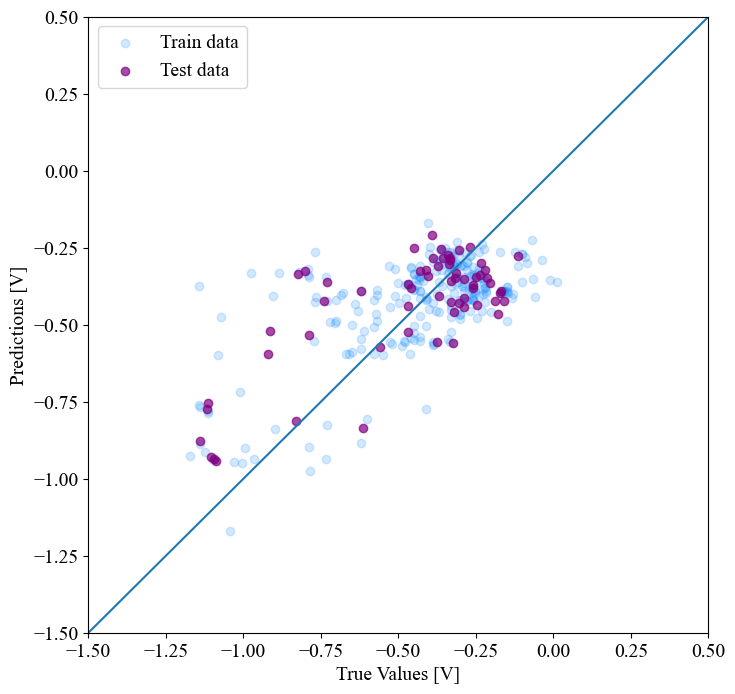

In [59]:
# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(8, 6))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14
plt.rcParams['font.sans-serif'] = ['SimSun']

# 模型在训练集以及测试集上的表现情况图
test_predictions = BO_rr.predict(X_test).flatten()
train_predictions = BO_rr.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'dodgerblue', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='purple', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [60]:
# 保存训练好的模型
dump(BO_rr, open('D:\IPython\Corrosion-ML\saved_model2\岭回归\贝叶斯优化模型\BORR_5.pkl', 'wb'))

# 深度学习

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from pickle import dump

In [62]:
# 用于搭建神经网络模型的函数
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[17], reg_l2=0.01, dropout=0.2):
    model = keras.Sequential()
    options = {"input_shape": input_shape}
    model.add(keras.Input(shape=(len(X.keys()))))
    for layer in range(n_hidden):
        model.add(layers.Dense(n_neurons, kernel_regularizer=regularizers.l2(reg_l2), 
                 activation='elu'))
        model.add(layers.Dropout(dropout))
        options = {}
    model.add(keras.layers.Dense(1, **options))
    optimizer = tf.keras.optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [63]:
imodel = build_model(n_hidden=3, n_neurons=50, learning_rate=0.0005, reg_l2=0.0001, dropout=0.2)

MAX_EPOCHS = 10000

# 添加回调函数Early Stopping
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=1000)

eshistory = imodel.fit(X_train, y_train, 
                    epochs=MAX_EPOCHS, validation_split = 0.2, verbose=2, 
                    callbacks=[early_stop],
                         batch_size = 5)

Epoch 1/10000


D:\Python\anaconda\envs\tf2x\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


41/41 - 1s - loss: 0.3062 - mae: 0.4382 - mse: 0.2945 - val_loss: 0.1417 - val_mae: 0.2572 - val_mse: 0.1301 - 856ms/epoch - 21ms/step
Epoch 2/10000
41/41 - 0s - loss: 0.1839 - mae: 0.3316 - mse: 0.1723 - val_loss: 0.0992 - val_mae: 0.2076 - val_mse: 0.0876 - 91ms/epoch - 2ms/step
Epoch 3/10000
41/41 - 0s - loss: 0.2232 - mae: 0.3435 - mse: 0.2116 - val_loss: 0.0649 - val_mae: 0.1615 - val_mse: 0.0534 - 98ms/epoch - 2ms/step
Epoch 4/10000
41/41 - 0s - loss: 0.1569 - mae: 0.2786 - mse: 0.1453 - val_loss: 0.0627 - val_mae: 0.1764 - val_mse: 0.0512 - 92ms/epoch - 2ms/step
Epoch 5/10000
41/41 - 0s - loss: 0.1529 - mae: 0.2903 - mse: 0.1415 - val_loss: 0.0631 - val_mae: 0.1769 - val_mse: 0.0517 - 94ms/epoch - 2ms/step
Epoch 6/10000
41/41 - 0s - loss: 0.1349 - mae: 0.2714 - mse: 0.1234 - val_loss: 0.0654 - val_mae: 0.1621 - val_mse: 0.0540 - 94ms/epoch - 2ms/step
Epoch 7/10000
41/41 - 0s - loss: 0.1362 - mae: 0.2742 - mse: 0.1249 - val_loss: 0.0635 - val_mae: 0.1775 - val_mse: 0.0521 - 88ms/

Epoch 57/10000
41/41 - 0s - loss: 0.0580 - mae: 0.1650 - mse: 0.0478 - val_loss: 0.0510 - val_mae: 0.1494 - val_mse: 0.0408 - 87ms/epoch - 2ms/step
Epoch 58/10000
41/41 - 0s - loss: 0.0609 - mae: 0.1701 - mse: 0.0508 - val_loss: 0.0512 - val_mae: 0.1445 - val_mse: 0.0410 - 90ms/epoch - 2ms/step
Epoch 59/10000
41/41 - 0s - loss: 0.0598 - mae: 0.1690 - mse: 0.0497 - val_loss: 0.0517 - val_mae: 0.1465 - val_mse: 0.0416 - 86ms/epoch - 2ms/step
Epoch 60/10000
41/41 - 0s - loss: 0.0668 - mae: 0.1827 - mse: 0.0567 - val_loss: 0.0482 - val_mae: 0.1428 - val_mse: 0.0381 - 88ms/epoch - 2ms/step
Epoch 61/10000
41/41 - 0s - loss: 0.0611 - mae: 0.1754 - mse: 0.0510 - val_loss: 0.0489 - val_mae: 0.1432 - val_mse: 0.0389 - 94ms/epoch - 2ms/step
Epoch 62/10000
41/41 - 0s - loss: 0.0607 - mae: 0.1748 - mse: 0.0506 - val_loss: 0.0489 - val_mae: 0.1436 - val_mse: 0.0389 - 87ms/epoch - 2ms/step
Epoch 63/10000
41/41 - 0s - loss: 0.0557 - mae: 0.1658 - mse: 0.0456 - val_loss: 0.0501 - val_mae: 0.1456 - val_

Epoch 113/10000
41/41 - 0s - loss: 0.0503 - mae: 0.1537 - mse: 0.0412 - val_loss: 0.0438 - val_mae: 0.1409 - val_mse: 0.0347 - 88ms/epoch - 2ms/step
Epoch 114/10000
41/41 - 0s - loss: 0.0499 - mae: 0.1548 - mse: 0.0408 - val_loss: 0.0455 - val_mae: 0.1444 - val_mse: 0.0365 - 96ms/epoch - 2ms/step
Epoch 115/10000
41/41 - 0s - loss: 0.0496 - mae: 0.1534 - mse: 0.0405 - val_loss: 0.0428 - val_mae: 0.1397 - val_mse: 0.0338 - 87ms/epoch - 2ms/step
Epoch 116/10000
41/41 - 0s - loss: 0.0503 - mae: 0.1560 - mse: 0.0413 - val_loss: 0.0426 - val_mae: 0.1375 - val_mse: 0.0336 - 85ms/epoch - 2ms/step
Epoch 117/10000
41/41 - 0s - loss: 0.0457 - mae: 0.1460 - mse: 0.0366 - val_loss: 0.0429 - val_mae: 0.1361 - val_mse: 0.0339 - 90ms/epoch - 2ms/step
Epoch 118/10000
41/41 - 0s - loss: 0.0489 - mae: 0.1453 - mse: 0.0400 - val_loss: 0.0429 - val_mae: 0.1351 - val_mse: 0.0339 - 86ms/epoch - 2ms/step
Epoch 119/10000
41/41 - 0s - loss: 0.0491 - mae: 0.1531 - mse: 0.0402 - val_loss: 0.0437 - val_mae: 0.1375

Epoch 168/10000
41/41 - 0s - loss: 0.0463 - mae: 0.1477 - mse: 0.0382 - val_loss: 0.0443 - val_mae: 0.1437 - val_mse: 0.0363 - 87ms/epoch - 2ms/step
Epoch 169/10000
41/41 - 0s - loss: 0.0432 - mae: 0.1452 - mse: 0.0352 - val_loss: 0.0436 - val_mae: 0.1406 - val_mse: 0.0356 - 91ms/epoch - 2ms/step
Epoch 170/10000
41/41 - 0s - loss: 0.0415 - mae: 0.1411 - mse: 0.0335 - val_loss: 0.0447 - val_mae: 0.1442 - val_mse: 0.0367 - 89ms/epoch - 2ms/step
Epoch 171/10000
41/41 - 0s - loss: 0.0434 - mae: 0.1462 - mse: 0.0354 - val_loss: 0.0450 - val_mae: 0.1433 - val_mse: 0.0371 - 89ms/epoch - 2ms/step
Epoch 172/10000
41/41 - 0s - loss: 0.0433 - mae: 0.1426 - mse: 0.0353 - val_loss: 0.0432 - val_mae: 0.1398 - val_mse: 0.0353 - 89ms/epoch - 2ms/step
Epoch 173/10000
41/41 - 0s - loss: 0.0430 - mae: 0.1420 - mse: 0.0351 - val_loss: 0.0433 - val_mae: 0.1413 - val_mse: 0.0354 - 93ms/epoch - 2ms/step
Epoch 174/10000
41/41 - 0s - loss: 0.0410 - mae: 0.1352 - mse: 0.0331 - val_loss: 0.0412 - val_mae: 0.1350

Epoch 223/10000
41/41 - 0s - loss: 0.0410 - mae: 0.1419 - mse: 0.0340 - val_loss: 0.0381 - val_mae: 0.1313 - val_mse: 0.0311 - 90ms/epoch - 2ms/step
Epoch 224/10000
41/41 - 0s - loss: 0.0430 - mae: 0.1446 - mse: 0.0360 - val_loss: 0.0366 - val_mae: 0.1296 - val_mse: 0.0296 - 87ms/epoch - 2ms/step
Epoch 225/10000
41/41 - 0s - loss: 0.0400 - mae: 0.1396 - mse: 0.0330 - val_loss: 0.0386 - val_mae: 0.1310 - val_mse: 0.0317 - 95ms/epoch - 2ms/step
Epoch 226/10000
41/41 - 0s - loss: 0.0426 - mae: 0.1428 - mse: 0.0357 - val_loss: 0.0382 - val_mae: 0.1341 - val_mse: 0.0313 - 87ms/epoch - 2ms/step
Epoch 227/10000
41/41 - 0s - loss: 0.0408 - mae: 0.1400 - mse: 0.0339 - val_loss: 0.0387 - val_mae: 0.1349 - val_mse: 0.0318 - 87ms/epoch - 2ms/step
Epoch 228/10000
41/41 - 0s - loss: 0.0391 - mae: 0.1366 - mse: 0.0322 - val_loss: 0.0393 - val_mae: 0.1339 - val_mse: 0.0324 - 91ms/epoch - 2ms/step
Epoch 229/10000
41/41 - 0s - loss: 0.0405 - mae: 0.1379 - mse: 0.0336 - val_loss: 0.0397 - val_mae: 0.1345

Epoch 278/10000
41/41 - 0s - loss: 0.0372 - mae: 0.1325 - mse: 0.0311 - val_loss: 0.0366 - val_mae: 0.1288 - val_mse: 0.0305 - 90ms/epoch - 2ms/step
Epoch 279/10000
41/41 - 0s - loss: 0.0371 - mae: 0.1308 - mse: 0.0310 - val_loss: 0.0350 - val_mae: 0.1257 - val_mse: 0.0289 - 87ms/epoch - 2ms/step
Epoch 280/10000
41/41 - 0s - loss: 0.0385 - mae: 0.1335 - mse: 0.0324 - val_loss: 0.0361 - val_mae: 0.1274 - val_mse: 0.0300 - 89ms/epoch - 2ms/step
Epoch 281/10000
41/41 - 0s - loss: 0.0368 - mae: 0.1348 - mse: 0.0308 - val_loss: 0.0368 - val_mae: 0.1322 - val_mse: 0.0307 - 96ms/epoch - 2ms/step
Epoch 282/10000
41/41 - 0s - loss: 0.0394 - mae: 0.1356 - mse: 0.0333 - val_loss: 0.0355 - val_mae: 0.1265 - val_mse: 0.0294 - 90ms/epoch - 2ms/step
Epoch 283/10000
41/41 - 0s - loss: 0.0380 - mae: 0.1357 - mse: 0.0320 - val_loss: 0.0390 - val_mae: 0.1368 - val_mse: 0.0329 - 87ms/epoch - 2ms/step
Epoch 284/10000
41/41 - 0s - loss: 0.0356 - mae: 0.1339 - mse: 0.0296 - val_loss: 0.0369 - val_mae: 0.1311

Epoch 333/10000
41/41 - 0s - loss: 0.0355 - mae: 0.1307 - mse: 0.0300 - val_loss: 0.0343 - val_mae: 0.1274 - val_mse: 0.0289 - 95ms/epoch - 2ms/step
Epoch 334/10000
41/41 - 0s - loss: 0.0364 - mae: 0.1303 - mse: 0.0310 - val_loss: 0.0349 - val_mae: 0.1291 - val_mse: 0.0296 - 87ms/epoch - 2ms/step
Epoch 335/10000
41/41 - 0s - loss: 0.0331 - mae: 0.1242 - mse: 0.0277 - val_loss: 0.0345 - val_mae: 0.1308 - val_mse: 0.0291 - 87ms/epoch - 2ms/step
Epoch 336/10000
41/41 - 0s - loss: 0.0380 - mae: 0.1356 - mse: 0.0327 - val_loss: 0.0347 - val_mae: 0.1287 - val_mse: 0.0293 - 88ms/epoch - 2ms/step
Epoch 337/10000
41/41 - 0s - loss: 0.0376 - mae: 0.1361 - mse: 0.0322 - val_loss: 0.0369 - val_mae: 0.1339 - val_mse: 0.0316 - 91ms/epoch - 2ms/step
Epoch 338/10000
41/41 - 0s - loss: 0.0353 - mae: 0.1290 - mse: 0.0300 - val_loss: 0.0349 - val_mae: 0.1297 - val_mse: 0.0296 - 85ms/epoch - 2ms/step
Epoch 339/10000
41/41 - 0s - loss: 0.0354 - mae: 0.1283 - mse: 0.0301 - val_loss: 0.0348 - val_mae: 0.1269

Epoch 388/10000
41/41 - 0s - loss: 0.0413 - mae: 0.1455 - mse: 0.0364 - val_loss: 0.0354 - val_mae: 0.1328 - val_mse: 0.0306 - 88ms/epoch - 2ms/step
Epoch 389/10000
41/41 - 0s - loss: 0.0354 - mae: 0.1322 - mse: 0.0306 - val_loss: 0.0345 - val_mae: 0.1304 - val_mse: 0.0297 - 92ms/epoch - 2ms/step
Epoch 390/10000
41/41 - 0s - loss: 0.0353 - mae: 0.1296 - mse: 0.0305 - val_loss: 0.0358 - val_mae: 0.1319 - val_mse: 0.0310 - 85ms/epoch - 2ms/step
Epoch 391/10000
41/41 - 0s - loss: 0.0363 - mae: 0.1325 - mse: 0.0314 - val_loss: 0.0342 - val_mae: 0.1291 - val_mse: 0.0294 - 89ms/epoch - 2ms/step
Epoch 392/10000
41/41 - 0s - loss: 0.0338 - mae: 0.1277 - mse: 0.0290 - val_loss: 0.0343 - val_mae: 0.1264 - val_mse: 0.0295 - 98ms/epoch - 2ms/step
Epoch 393/10000
41/41 - 0s - loss: 0.0344 - mae: 0.1264 - mse: 0.0296 - val_loss: 0.0330 - val_mae: 0.1249 - val_mse: 0.0282 - 88ms/epoch - 2ms/step
Epoch 394/10000
41/41 - 0s - loss: 0.0322 - mae: 0.1223 - mse: 0.0274 - val_loss: 0.0336 - val_mae: 0.1272

Epoch 443/10000
41/41 - 0s - loss: 0.0313 - mae: 0.1231 - mse: 0.0269 - val_loss: 0.0316 - val_mae: 0.1269 - val_mse: 0.0272 - 90ms/epoch - 2ms/step
Epoch 444/10000
41/41 - 0s - loss: 0.0337 - mae: 0.1283 - mse: 0.0293 - val_loss: 0.0329 - val_mae: 0.1277 - val_mse: 0.0284 - 94ms/epoch - 2ms/step
Epoch 445/10000
41/41 - 0s - loss: 0.0311 - mae: 0.1254 - mse: 0.0266 - val_loss: 0.0334 - val_mae: 0.1309 - val_mse: 0.0289 - 84ms/epoch - 2ms/step
Epoch 446/10000
41/41 - 0s - loss: 0.0334 - mae: 0.1255 - mse: 0.0289 - val_loss: 0.0330 - val_mae: 0.1279 - val_mse: 0.0286 - 86ms/epoch - 2ms/step
Epoch 447/10000
41/41 - 0s - loss: 0.0324 - mae: 0.1233 - mse: 0.0280 - val_loss: 0.0304 - val_mae: 0.1212 - val_mse: 0.0259 - 86ms/epoch - 2ms/step
Epoch 448/10000
41/41 - 0s - loss: 0.0317 - mae: 0.1197 - mse: 0.0273 - val_loss: 0.0313 - val_mae: 0.1253 - val_mse: 0.0269 - 88ms/epoch - 2ms/step
Epoch 449/10000
41/41 - 0s - loss: 0.0333 - mae: 0.1260 - mse: 0.0289 - val_loss: 0.0314 - val_mae: 0.1266

Epoch 498/10000
41/41 - 0s - loss: 0.0316 - mae: 0.1230 - mse: 0.0274 - val_loss: 0.0338 - val_mae: 0.1278 - val_mse: 0.0296 - 88ms/epoch - 2ms/step
Epoch 499/10000
41/41 - 0s - loss: 0.0332 - mae: 0.1259 - mse: 0.0291 - val_loss: 0.0314 - val_mae: 0.1263 - val_mse: 0.0273 - 85ms/epoch - 2ms/step
Epoch 500/10000
41/41 - 0s - loss: 0.0328 - mae: 0.1269 - mse: 0.0286 - val_loss: 0.0322 - val_mae: 0.1240 - val_mse: 0.0281 - 91ms/epoch - 2ms/step
Epoch 501/10000
41/41 - 0s - loss: 0.0316 - mae: 0.1236 - mse: 0.0275 - val_loss: 0.0320 - val_mae: 0.1259 - val_mse: 0.0279 - 82ms/epoch - 2ms/step
Epoch 502/10000
41/41 - 0s - loss: 0.0325 - mae: 0.1267 - mse: 0.0283 - val_loss: 0.0321 - val_mae: 0.1253 - val_mse: 0.0280 - 86ms/epoch - 2ms/step
Epoch 503/10000
41/41 - 0s - loss: 0.0309 - mae: 0.1231 - mse: 0.0268 - val_loss: 0.0324 - val_mae: 0.1273 - val_mse: 0.0282 - 89ms/epoch - 2ms/step
Epoch 504/10000
41/41 - 0s - loss: 0.0341 - mae: 0.1293 - mse: 0.0300 - val_loss: 0.0320 - val_mae: 0.1252

Epoch 553/10000
41/41 - 0s - loss: 0.0303 - mae: 0.1219 - mse: 0.0263 - val_loss: 0.0314 - val_mae: 0.1252 - val_mse: 0.0273 - 87ms/epoch - 2ms/step
Epoch 554/10000
41/41 - 0s - loss: 0.0306 - mae: 0.1206 - mse: 0.0265 - val_loss: 0.0324 - val_mae: 0.1246 - val_mse: 0.0284 - 89ms/epoch - 2ms/step
Epoch 555/10000
41/41 - 0s - loss: 0.0323 - mae: 0.1261 - mse: 0.0283 - val_loss: 0.0303 - val_mae: 0.1258 - val_mse: 0.0263 - 94ms/epoch - 2ms/step
Epoch 556/10000
41/41 - 0s - loss: 0.0306 - mae: 0.1215 - mse: 0.0265 - val_loss: 0.0314 - val_mae: 0.1231 - val_mse: 0.0274 - 86ms/epoch - 2ms/step
Epoch 557/10000
41/41 - 0s - loss: 0.0302 - mae: 0.1199 - mse: 0.0262 - val_loss: 0.0333 - val_mae: 0.1272 - val_mse: 0.0293 - 86ms/epoch - 2ms/step
Epoch 558/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1160 - mse: 0.0250 - val_loss: 0.0309 - val_mae: 0.1249 - val_mse: 0.0269 - 93ms/epoch - 2ms/step
Epoch 559/10000
41/41 - 0s - loss: 0.0312 - mae: 0.1240 - mse: 0.0271 - val_loss: 0.0313 - val_mae: 0.1263

Epoch 608/10000
41/41 - 0s - loss: 0.0325 - mae: 0.1259 - mse: 0.0286 - val_loss: 0.0329 - val_mae: 0.1309 - val_mse: 0.0290 - 131ms/epoch - 3ms/step
Epoch 609/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1219 - mse: 0.0258 - val_loss: 0.0321 - val_mae: 0.1283 - val_mse: 0.0282 - 118ms/epoch - 3ms/step
Epoch 610/10000
41/41 - 0s - loss: 0.0303 - mae: 0.1202 - mse: 0.0263 - val_loss: 0.0310 - val_mae: 0.1240 - val_mse: 0.0271 - 96ms/epoch - 2ms/step
Epoch 611/10000
41/41 - 0s - loss: 0.0329 - mae: 0.1273 - mse: 0.0290 - val_loss: 0.0301 - val_mae: 0.1231 - val_mse: 0.0262 - 89ms/epoch - 2ms/step
Epoch 612/10000
41/41 - 0s - loss: 0.0317 - mae: 0.1264 - mse: 0.0278 - val_loss: 0.0334 - val_mae: 0.1261 - val_mse: 0.0295 - 91ms/epoch - 2ms/step
Epoch 613/10000
41/41 - 0s - loss: 0.0324 - mae: 0.1249 - mse: 0.0285 - val_loss: 0.0304 - val_mae: 0.1250 - val_mse: 0.0265 - 88ms/epoch - 2ms/step
Epoch 614/10000
41/41 - 0s - loss: 0.0321 - mae: 0.1214 - mse: 0.0282 - val_loss: 0.0311 - val_mae: 0.12

Epoch 663/10000
41/41 - 0s - loss: 0.0322 - mae: 0.1254 - mse: 0.0283 - val_loss: 0.0315 - val_mae: 0.1214 - val_mse: 0.0277 - 86ms/epoch - 2ms/step
Epoch 664/10000
41/41 - 0s - loss: 0.0310 - mae: 0.1210 - mse: 0.0271 - val_loss: 0.0304 - val_mae: 0.1241 - val_mse: 0.0265 - 92ms/epoch - 2ms/step
Epoch 665/10000
41/41 - 0s - loss: 0.0309 - mae: 0.1222 - mse: 0.0270 - val_loss: 0.0298 - val_mae: 0.1232 - val_mse: 0.0259 - 85ms/epoch - 2ms/step
Epoch 666/10000
41/41 - 0s - loss: 0.0320 - mae: 0.1285 - mse: 0.0281 - val_loss: 0.0328 - val_mae: 0.1252 - val_mse: 0.0289 - 87ms/epoch - 2ms/step
Epoch 667/10000
41/41 - 0s - loss: 0.0304 - mae: 0.1177 - mse: 0.0265 - val_loss: 0.0310 - val_mae: 0.1245 - val_mse: 0.0271 - 91ms/epoch - 2ms/step
Epoch 668/10000
41/41 - 0s - loss: 0.0313 - mae: 0.1257 - mse: 0.0274 - val_loss: 0.0318 - val_mae: 0.1263 - val_mse: 0.0280 - 85ms/epoch - 2ms/step
Epoch 669/10000
41/41 - 0s - loss: 0.0320 - mae: 0.1206 - mse: 0.0282 - val_loss: 0.0317 - val_mae: 0.1250

Epoch 718/10000
41/41 - 0s - loss: 0.0310 - mae: 0.1251 - mse: 0.0271 - val_loss: 0.0309 - val_mae: 0.1216 - val_mse: 0.0271 - 83ms/epoch - 2ms/step
Epoch 719/10000
41/41 - 0s - loss: 0.0317 - mae: 0.1245 - mse: 0.0278 - val_loss: 0.0294 - val_mae: 0.1185 - val_mse: 0.0255 - 88ms/epoch - 2ms/step
Epoch 720/10000
41/41 - 0s - loss: 0.0305 - mae: 0.1190 - mse: 0.0266 - val_loss: 0.0304 - val_mae: 0.1249 - val_mse: 0.0266 - 91ms/epoch - 2ms/step
Epoch 721/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1151 - mse: 0.0243 - val_loss: 0.0297 - val_mae: 0.1190 - val_mse: 0.0258 - 84ms/epoch - 2ms/step
Epoch 722/10000
41/41 - 0s - loss: 0.0302 - mae: 0.1167 - mse: 0.0263 - val_loss: 0.0307 - val_mae: 0.1240 - val_mse: 0.0268 - 84ms/epoch - 2ms/step
Epoch 723/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1193 - mse: 0.0258 - val_loss: 0.0291 - val_mae: 0.1213 - val_mse: 0.0252 - 93ms/epoch - 2ms/step
Epoch 724/10000
41/41 - 0s - loss: 0.0328 - mae: 0.1228 - mse: 0.0289 - val_loss: 0.0302 - val_mae: 0.1232

Epoch 773/10000
41/41 - 0s - loss: 0.0303 - mae: 0.1207 - mse: 0.0263 - val_loss: 0.0293 - val_mae: 0.1218 - val_mse: 0.0254 - 90ms/epoch - 2ms/step
Epoch 774/10000
41/41 - 0s - loss: 0.0319 - mae: 0.1262 - mse: 0.0280 - val_loss: 0.0317 - val_mae: 0.1276 - val_mse: 0.0278 - 89ms/epoch - 2ms/step
Epoch 775/10000
41/41 - 0s - loss: 0.0311 - mae: 0.1270 - mse: 0.0271 - val_loss: 0.0310 - val_mae: 0.1226 - val_mse: 0.0271 - 85ms/epoch - 2ms/step
Epoch 776/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1160 - mse: 0.0242 - val_loss: 0.0292 - val_mae: 0.1193 - val_mse: 0.0252 - 91ms/epoch - 2ms/step
Epoch 777/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1164 - mse: 0.0247 - val_loss: 0.0298 - val_mae: 0.1260 - val_mse: 0.0259 - 84ms/epoch - 2ms/step
Epoch 778/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1128 - mse: 0.0241 - val_loss: 0.0297 - val_mae: 0.1217 - val_mse: 0.0257 - 87ms/epoch - 2ms/step
Epoch 779/10000
41/41 - 0s - loss: 0.0316 - mae: 0.1225 - mse: 0.0277 - val_loss: 0.0301 - val_mae: 0.1303

Epoch 828/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1172 - mse: 0.0243 - val_loss: 0.0299 - val_mae: 0.1221 - val_mse: 0.0259 - 88ms/epoch - 2ms/step
Epoch 829/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1176 - mse: 0.0248 - val_loss: 0.0293 - val_mae: 0.1234 - val_mse: 0.0253 - 93ms/epoch - 2ms/step
Epoch 830/10000
41/41 - 0s - loss: 0.0312 - mae: 0.1220 - mse: 0.0272 - val_loss: 0.0301 - val_mae: 0.1249 - val_mse: 0.0262 - 86ms/epoch - 2ms/step
Epoch 831/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1208 - mse: 0.0254 - val_loss: 0.0297 - val_mae: 0.1238 - val_mse: 0.0258 - 85ms/epoch - 2ms/step
Epoch 832/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1169 - mse: 0.0247 - val_loss: 0.0287 - val_mae: 0.1181 - val_mse: 0.0247 - 87ms/epoch - 2ms/step
Epoch 833/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1166 - mse: 0.0256 - val_loss: 0.0296 - val_mae: 0.1213 - val_mse: 0.0256 - 90ms/epoch - 2ms/step
Epoch 834/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1136 - mse: 0.0251 - val_loss: 0.0292 - val_mae: 0.1245

Epoch 883/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1218 - mse: 0.0257 - val_loss: 0.0324 - val_mae: 0.1215 - val_mse: 0.0284 - 88ms/epoch - 2ms/step
Epoch 884/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1176 - mse: 0.0253 - val_loss: 0.0294 - val_mae: 0.1251 - val_mse: 0.0254 - 87ms/epoch - 2ms/step
Epoch 885/10000
41/41 - 0s - loss: 0.0323 - mae: 0.1248 - mse: 0.0283 - val_loss: 0.0305 - val_mae: 0.1225 - val_mse: 0.0265 - 89ms/epoch - 2ms/step
Epoch 886/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1096 - mse: 0.0233 - val_loss: 0.0299 - val_mae: 0.1200 - val_mse: 0.0259 - 92ms/epoch - 2ms/step
Epoch 887/10000
41/41 - 0s - loss: 0.0306 - mae: 0.1185 - mse: 0.0266 - val_loss: 0.0304 - val_mae: 0.1264 - val_mse: 0.0264 - 90ms/epoch - 2ms/step
Epoch 888/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1196 - mse: 0.0251 - val_loss: 0.0290 - val_mae: 0.1227 - val_mse: 0.0250 - 88ms/epoch - 2ms/step
Epoch 889/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1122 - mse: 0.0230 - val_loss: 0.0284 - val_mae: 0.1200

Epoch 938/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1152 - mse: 0.0243 - val_loss: 0.0289 - val_mae: 0.1216 - val_mse: 0.0248 - 87ms/epoch - 2ms/step
Epoch 939/10000
41/41 - 0s - loss: 0.0312 - mae: 0.1208 - mse: 0.0271 - val_loss: 0.0289 - val_mae: 0.1152 - val_mse: 0.0248 - 93ms/epoch - 2ms/step
Epoch 940/10000
41/41 - 0s - loss: 0.0316 - mae: 0.1223 - mse: 0.0275 - val_loss: 0.0297 - val_mae: 0.1274 - val_mse: 0.0256 - 91ms/epoch - 2ms/step
Epoch 941/10000
41/41 - 0s - loss: 0.0285 - mae: 0.1123 - mse: 0.0244 - val_loss: 0.0292 - val_mae: 0.1192 - val_mse: 0.0251 - 87ms/epoch - 2ms/step
Epoch 942/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1114 - mse: 0.0245 - val_loss: 0.0291 - val_mae: 0.1201 - val_mse: 0.0250 - 100ms/epoch - 2ms/step
Epoch 943/10000
41/41 - 0s - loss: 0.0302 - mae: 0.1219 - mse: 0.0261 - val_loss: 0.0287 - val_mae: 0.1195 - val_mse: 0.0246 - 85ms/epoch - 2ms/step
Epoch 944/10000
41/41 - 0s - loss: 0.0264 - mae: 0.1128 - mse: 0.0223 - val_loss: 0.0290 - val_mae: 0.118

Epoch 993/10000
41/41 - 0s - loss: 0.0305 - mae: 0.1183 - mse: 0.0264 - val_loss: 0.0288 - val_mae: 0.1208 - val_mse: 0.0247 - 86ms/epoch - 2ms/step
Epoch 994/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1170 - mse: 0.0253 - val_loss: 0.0292 - val_mae: 0.1193 - val_mse: 0.0251 - 87ms/epoch - 2ms/step
Epoch 995/10000
41/41 - 0s - loss: 0.0296 - mae: 0.1161 - mse: 0.0254 - val_loss: 0.0283 - val_mae: 0.1194 - val_mse: 0.0242 - 90ms/epoch - 2ms/step
Epoch 996/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1111 - mse: 0.0250 - val_loss: 0.0289 - val_mae: 0.1207 - val_mse: 0.0248 - 84ms/epoch - 2ms/step
Epoch 997/10000
41/41 - 0s - loss: 0.0301 - mae: 0.1211 - mse: 0.0259 - val_loss: 0.0294 - val_mae: 0.1218 - val_mse: 0.0253 - 84ms/epoch - 2ms/step
Epoch 998/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1162 - mse: 0.0246 - val_loss: 0.0301 - val_mae: 0.1232 - val_mse: 0.0259 - 86ms/epoch - 2ms/step
Epoch 999/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1121 - mse: 0.0249 - val_loss: 0.0281 - val_mae: 0.1137

Epoch 1048/10000
41/41 - 0s - loss: 0.0307 - mae: 0.1138 - mse: 0.0265 - val_loss: 0.0283 - val_mae: 0.1212 - val_mse: 0.0241 - 87ms/epoch - 2ms/step
Epoch 1049/10000
41/41 - 0s - loss: 0.0302 - mae: 0.1162 - mse: 0.0260 - val_loss: 0.0283 - val_mae: 0.1188 - val_mse: 0.0241 - 93ms/epoch - 2ms/step
Epoch 1050/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1099 - mse: 0.0228 - val_loss: 0.0286 - val_mae: 0.1148 - val_mse: 0.0244 - 87ms/epoch - 2ms/step
Epoch 1051/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1108 - mse: 0.0238 - val_loss: 0.0271 - val_mae: 0.1172 - val_mse: 0.0229 - 86ms/epoch - 2ms/step
Epoch 1052/10000
41/41 - 0s - loss: 0.0304 - mae: 0.1169 - mse: 0.0261 - val_loss: 0.0280 - val_mae: 0.1157 - val_mse: 0.0238 - 90ms/epoch - 2ms/step
Epoch 1053/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1141 - mse: 0.0232 - val_loss: 0.0286 - val_mae: 0.1158 - val_mse: 0.0243 - 84ms/epoch - 2ms/step
Epoch 1054/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1209 - mse: 0.0255 - val_loss: 0.0277 - val_mae:

Epoch 1103/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1118 - mse: 0.0230 - val_loss: 0.0277 - val_mae: 0.1198 - val_mse: 0.0234 - 88ms/epoch - 2ms/step
Epoch 1104/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1194 - mse: 0.0252 - val_loss: 0.0283 - val_mae: 0.1150 - val_mse: 0.0240 - 89ms/epoch - 2ms/step
Epoch 1105/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1157 - mse: 0.0247 - val_loss: 0.0278 - val_mae: 0.1175 - val_mse: 0.0235 - 90ms/epoch - 2ms/step
Epoch 1106/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1183 - mse: 0.0251 - val_loss: 0.0291 - val_mae: 0.1171 - val_mse: 0.0249 - 85ms/epoch - 2ms/step
Epoch 1107/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1128 - mse: 0.0244 - val_loss: 0.0299 - val_mae: 0.1192 - val_mse: 0.0257 - 84ms/epoch - 2ms/step
Epoch 1108/10000
41/41 - 0s - loss: 0.0257 - mae: 0.1080 - mse: 0.0215 - val_loss: 0.0281 - val_mae: 0.1182 - val_mse: 0.0238 - 88ms/epoch - 2ms/step
Epoch 1109/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1140 - mse: 0.0246 - val_loss: 0.0291 - val_mae:

Epoch 1158/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1096 - mse: 0.0244 - val_loss: 0.0286 - val_mae: 0.1196 - val_mse: 0.0244 - 94ms/epoch - 2ms/step
Epoch 1159/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1154 - mse: 0.0244 - val_loss: 0.0284 - val_mae: 0.1149 - val_mse: 0.0241 - 87ms/epoch - 2ms/step
Epoch 1160/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1130 - mse: 0.0235 - val_loss: 0.0279 - val_mae: 0.1166 - val_mse: 0.0237 - 83ms/epoch - 2ms/step
Epoch 1161/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1151 - mse: 0.0248 - val_loss: 0.0295 - val_mae: 0.1212 - val_mse: 0.0253 - 88ms/epoch - 2ms/step
Epoch 1162/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1160 - mse: 0.0252 - val_loss: 0.0284 - val_mae: 0.1198 - val_mse: 0.0242 - 84ms/epoch - 2ms/step
Epoch 1163/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1117 - mse: 0.0242 - val_loss: 0.0293 - val_mae: 0.1212 - val_mse: 0.0250 - 87ms/epoch - 2ms/step
Epoch 1164/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1172 - mse: 0.0246 - val_loss: 0.0277 - val_mae:

Epoch 1213/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1169 - mse: 0.0255 - val_loss: 0.0305 - val_mae: 0.1192 - val_mse: 0.0262 - 92ms/epoch - 2ms/step
Epoch 1214/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1155 - mse: 0.0245 - val_loss: 0.0276 - val_mae: 0.1144 - val_mse: 0.0233 - 89ms/epoch - 2ms/step
Epoch 1215/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1146 - mse: 0.0255 - val_loss: 0.0276 - val_mae: 0.1190 - val_mse: 0.0233 - 86ms/epoch - 2ms/step
Epoch 1216/10000
41/41 - 0s - loss: 0.0269 - mae: 0.1143 - mse: 0.0226 - val_loss: 0.0277 - val_mae: 0.1157 - val_mse: 0.0234 - 87ms/epoch - 2ms/step
Epoch 1217/10000
41/41 - 0s - loss: 0.0309 - mae: 0.1214 - mse: 0.0266 - val_loss: 0.0284 - val_mae: 0.1208 - val_mse: 0.0241 - 86ms/epoch - 2ms/step
Epoch 1218/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1155 - mse: 0.0244 - val_loss: 0.0280 - val_mae: 0.1168 - val_mse: 0.0237 - 84ms/epoch - 2ms/step
Epoch 1219/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1149 - mse: 0.0238 - val_loss: 0.0276 - val_mae:

Epoch 1268/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1161 - mse: 0.0243 - val_loss: 0.0273 - val_mae: 0.1163 - val_mse: 0.0229 - 89ms/epoch - 2ms/step
Epoch 1269/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1144 - mse: 0.0245 - val_loss: 0.0280 - val_mae: 0.1201 - val_mse: 0.0236 - 91ms/epoch - 2ms/step
Epoch 1270/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1145 - mse: 0.0233 - val_loss: 0.0273 - val_mae: 0.1104 - val_mse: 0.0229 - 149ms/epoch - 4ms/step
Epoch 1271/10000
41/41 - 0s - loss: 0.0314 - mae: 0.1204 - mse: 0.0269 - val_loss: 0.0271 - val_mae: 0.1106 - val_mse: 0.0227 - 122ms/epoch - 3ms/step
Epoch 1272/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1151 - mse: 0.0246 - val_loss: 0.0273 - val_mae: 0.1126 - val_mse: 0.0229 - 102ms/epoch - 2ms/step
Epoch 1273/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1167 - mse: 0.0251 - val_loss: 0.0287 - val_mae: 0.1153 - val_mse: 0.0243 - 98ms/epoch - 2ms/step
Epoch 1274/10000
41/41 - 0s - loss: 0.0278 - mae: 0.1100 - mse: 0.0234 - val_loss: 0.0281 - val_m

Epoch 1323/10000
41/41 - 0s - loss: 0.0278 - mae: 0.1103 - mse: 0.0233 - val_loss: 0.0277 - val_mae: 0.1144 - val_mse: 0.0233 - 84ms/epoch - 2ms/step
Epoch 1324/10000
41/41 - 0s - loss: 0.0302 - mae: 0.1152 - mse: 0.0258 - val_loss: 0.0279 - val_mae: 0.1164 - val_mse: 0.0234 - 93ms/epoch - 2ms/step
Epoch 1325/10000
41/41 - 0s - loss: 0.0267 - mae: 0.1057 - mse: 0.0222 - val_loss: 0.0275 - val_mae: 0.1187 - val_mse: 0.0231 - 87ms/epoch - 2ms/step
Epoch 1326/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1175 - mse: 0.0246 - val_loss: 0.0290 - val_mae: 0.1168 - val_mse: 0.0246 - 84ms/epoch - 2ms/step
Epoch 1327/10000
41/41 - 0s - loss: 0.0319 - mae: 0.1237 - mse: 0.0274 - val_loss: 0.0285 - val_mae: 0.1185 - val_mse: 0.0240 - 90ms/epoch - 2ms/step
Epoch 1328/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1107 - mse: 0.0237 - val_loss: 0.0275 - val_mae: 0.1137 - val_mse: 0.0230 - 85ms/epoch - 2ms/step
Epoch 1329/10000
41/41 - 0s - loss: 0.0296 - mae: 0.1162 - mse: 0.0251 - val_loss: 0.0273 - val_mae:

Epoch 1378/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1149 - mse: 0.0241 - val_loss: 0.0271 - val_mae: 0.1121 - val_mse: 0.0226 - 84ms/epoch - 2ms/step
Epoch 1379/10000
41/41 - 0s - loss: 0.0267 - mae: 0.1081 - mse: 0.0222 - val_loss: 0.0275 - val_mae: 0.1167 - val_mse: 0.0230 - 86ms/epoch - 2ms/step
Epoch 1380/10000
41/41 - 0s - loss: 0.0304 - mae: 0.1164 - mse: 0.0259 - val_loss: 0.0281 - val_mae: 0.1166 - val_mse: 0.0236 - 86ms/epoch - 2ms/step
Epoch 1381/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1092 - mse: 0.0245 - val_loss: 0.0287 - val_mae: 0.1153 - val_mse: 0.0242 - 95ms/epoch - 2ms/step
Epoch 1382/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1130 - mse: 0.0239 - val_loss: 0.0270 - val_mae: 0.1156 - val_mse: 0.0225 - 87ms/epoch - 2ms/step
Epoch 1383/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1115 - mse: 0.0229 - val_loss: 0.0271 - val_mae: 0.1094 - val_mse: 0.0226 - 88ms/epoch - 2ms/step
Epoch 1384/10000
41/41 - 0s - loss: 0.0300 - mae: 0.1174 - mse: 0.0255 - val_loss: 0.0272 - val_mae:

Epoch 1433/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1122 - mse: 0.0243 - val_loss: 0.0282 - val_mae: 0.1144 - val_mse: 0.0236 - 85ms/epoch - 2ms/step
Epoch 1434/10000
41/41 - 0s - loss: 0.0317 - mae: 0.1186 - mse: 0.0271 - val_loss: 0.0276 - val_mae: 0.1132 - val_mse: 0.0231 - 88ms/epoch - 2ms/step
Epoch 1435/10000
41/41 - 0s - loss: 0.0304 - mae: 0.1176 - mse: 0.0258 - val_loss: 0.0269 - val_mae: 0.1139 - val_mse: 0.0223 - 85ms/epoch - 2ms/step
Epoch 1436/10000
41/41 - 0s - loss: 0.0276 - mae: 0.1127 - mse: 0.0230 - val_loss: 0.0276 - val_mae: 0.1105 - val_mse: 0.0231 - 86ms/epoch - 2ms/step
Epoch 1437/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1135 - mse: 0.0234 - val_loss: 0.0274 - val_mae: 0.1100 - val_mse: 0.0228 - 88ms/epoch - 2ms/step
Epoch 1438/10000
41/41 - 0s - loss: 0.0269 - mae: 0.1059 - mse: 0.0223 - val_loss: 0.0265 - val_mae: 0.1146 - val_mse: 0.0219 - 89ms/epoch - 2ms/step
Epoch 1439/10000
41/41 - 0s - loss: 0.0317 - mae: 0.1192 - mse: 0.0271 - val_loss: 0.0276 - val_mae:

Epoch 1488/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1138 - mse: 0.0245 - val_loss: 0.0276 - val_mae: 0.1132 - val_mse: 0.0230 - 85ms/epoch - 2ms/step
Epoch 1489/10000
41/41 - 0s - loss: 0.0263 - mae: 0.1068 - mse: 0.0217 - val_loss: 0.0268 - val_mae: 0.1070 - val_mse: 0.0222 - 87ms/epoch - 2ms/step
Epoch 1490/10000
41/41 - 0s - loss: 0.0294 - mae: 0.1157 - mse: 0.0248 - val_loss: 0.0273 - val_mae: 0.1134 - val_mse: 0.0227 - 85ms/epoch - 2ms/step
Epoch 1491/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1138 - mse: 0.0245 - val_loss: 0.0275 - val_mae: 0.1124 - val_mse: 0.0229 - 95ms/epoch - 2ms/step
Epoch 1492/10000
41/41 - 0s - loss: 0.0268 - mae: 0.1095 - mse: 0.0222 - val_loss: 0.0281 - val_mae: 0.1144 - val_mse: 0.0235 - 84ms/epoch - 2ms/step
Epoch 1493/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1182 - mse: 0.0251 - val_loss: 0.0277 - val_mae: 0.1176 - val_mse: 0.0231 - 88ms/epoch - 2ms/step
Epoch 1494/10000
41/41 - 0s - loss: 0.0260 - mae: 0.1070 - mse: 0.0214 - val_loss: 0.0271 - val_mae:

Epoch 1543/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1156 - mse: 0.0252 - val_loss: 0.0270 - val_mae: 0.1105 - val_mse: 0.0224 - 85ms/epoch - 2ms/step
Epoch 1544/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1086 - mse: 0.0240 - val_loss: 0.0267 - val_mae: 0.1096 - val_mse: 0.0221 - 90ms/epoch - 2ms/step
Epoch 1545/10000
41/41 - 0s - loss: 0.0271 - mae: 0.1071 - mse: 0.0225 - val_loss: 0.0271 - val_mae: 0.1115 - val_mse: 0.0225 - 88ms/epoch - 2ms/step
Epoch 1546/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1138 - mse: 0.0236 - val_loss: 0.0277 - val_mae: 0.1161 - val_mse: 0.0231 - 88ms/epoch - 2ms/step
Epoch 1547/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1081 - mse: 0.0228 - val_loss: 0.0278 - val_mae: 0.1143 - val_mse: 0.0232 - 90ms/epoch - 2ms/step
Epoch 1548/10000
41/41 - 0s - loss: 0.0301 - mae: 0.1132 - mse: 0.0255 - val_loss: 0.0259 - val_mae: 0.1122 - val_mse: 0.0213 - 88ms/epoch - 2ms/step
Epoch 1549/10000
41/41 - 0s - loss: 0.0313 - mae: 0.1194 - mse: 0.0267 - val_loss: 0.0270 - val_mae:

Epoch 1598/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1130 - mse: 0.0240 - val_loss: 0.0275 - val_mae: 0.1089 - val_mse: 0.0228 - 83ms/epoch - 2ms/step
Epoch 1599/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1083 - mse: 0.0230 - val_loss: 0.0274 - val_mae: 0.1136 - val_mse: 0.0227 - 83ms/epoch - 2ms/step
Epoch 1600/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1088 - mse: 0.0230 - val_loss: 0.0269 - val_mae: 0.1131 - val_mse: 0.0222 - 87ms/epoch - 2ms/step
Epoch 1601/10000
41/41 - 0s - loss: 0.0294 - mae: 0.1127 - mse: 0.0247 - val_loss: 0.0269 - val_mae: 0.1107 - val_mse: 0.0222 - 93ms/epoch - 2ms/step
Epoch 1602/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1090 - mse: 0.0237 - val_loss: 0.0261 - val_mae: 0.1082 - val_mse: 0.0215 - 87ms/epoch - 2ms/step
Epoch 1603/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1141 - mse: 0.0227 - val_loss: 0.0267 - val_mae: 0.1128 - val_mse: 0.0220 - 87ms/epoch - 2ms/step
Epoch 1604/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1096 - mse: 0.0226 - val_loss: 0.0268 - val_mae:

Epoch 1653/10000
41/41 - 0s - loss: 0.0272 - mae: 0.1125 - mse: 0.0225 - val_loss: 0.0268 - val_mae: 0.1095 - val_mse: 0.0221 - 86ms/epoch - 2ms/step
Epoch 1654/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1117 - mse: 0.0232 - val_loss: 0.0264 - val_mae: 0.1120 - val_mse: 0.0217 - 91ms/epoch - 2ms/step
Epoch 1655/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1150 - mse: 0.0250 - val_loss: 0.0274 - val_mae: 0.1103 - val_mse: 0.0227 - 84ms/epoch - 2ms/step
Epoch 1656/10000
41/41 - 0s - loss: 0.0278 - mae: 0.1106 - mse: 0.0231 - val_loss: 0.0263 - val_mae: 0.1117 - val_mse: 0.0216 - 84ms/epoch - 2ms/step
Epoch 1657/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1143 - mse: 0.0250 - val_loss: 0.0275 - val_mae: 0.1146 - val_mse: 0.0228 - 89ms/epoch - 2ms/step
Epoch 1658/10000
41/41 - 0s - loss: 0.0306 - mae: 0.1127 - mse: 0.0260 - val_loss: 0.0272 - val_mae: 0.1099 - val_mse: 0.0226 - 89ms/epoch - 2ms/step
Epoch 1659/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1100 - mse: 0.0235 - val_loss: 0.0272 - val_mae:

Epoch 1708/10000
41/41 - 0s - loss: 0.0322 - mae: 0.1196 - mse: 0.0274 - val_loss: 0.0283 - val_mae: 0.1114 - val_mse: 0.0235 - 84ms/epoch - 2ms/step
Epoch 1709/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1128 - mse: 0.0241 - val_loss: 0.0279 - val_mae: 0.1120 - val_mse: 0.0232 - 85ms/epoch - 2ms/step
Epoch 1710/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1089 - mse: 0.0233 - val_loss: 0.0279 - val_mae: 0.1154 - val_mse: 0.0232 - 88ms/epoch - 2ms/step
Epoch 1711/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1106 - mse: 0.0235 - val_loss: 0.0269 - val_mae: 0.1120 - val_mse: 0.0222 - 86ms/epoch - 2ms/step
Epoch 1712/10000
41/41 - 0s - loss: 0.0311 - mae: 0.1203 - mse: 0.0264 - val_loss: 0.0273 - val_mae: 0.1096 - val_mse: 0.0225 - 88ms/epoch - 2ms/step
Epoch 1713/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1148 - mse: 0.0250 - val_loss: 0.0272 - val_mae: 0.1147 - val_mse: 0.0225 - 89ms/epoch - 2ms/step
Epoch 1714/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1131 - mse: 0.0228 - val_loss: 0.0264 - val_mae:

Epoch 1763/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1139 - mse: 0.0236 - val_loss: 0.0270 - val_mae: 0.1140 - val_mse: 0.0223 - 88ms/epoch - 2ms/step
Epoch 1764/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1063 - mse: 0.0239 - val_loss: 0.0261 - val_mae: 0.1106 - val_mse: 0.0214 - 87ms/epoch - 2ms/step
Epoch 1765/10000
41/41 - 0s - loss: 0.0296 - mae: 0.1141 - mse: 0.0249 - val_loss: 0.0261 - val_mae: 0.1073 - val_mse: 0.0213 - 85ms/epoch - 2ms/step
Epoch 1766/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1130 - mse: 0.0247 - val_loss: 0.0263 - val_mae: 0.1102 - val_mse: 0.0215 - 87ms/epoch - 2ms/step
Epoch 1767/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1113 - mse: 0.0235 - val_loss: 0.0268 - val_mae: 0.1154 - val_mse: 0.0220 - 95ms/epoch - 2ms/step
Epoch 1768/10000
41/41 - 0s - loss: 0.0285 - mae: 0.1102 - mse: 0.0237 - val_loss: 0.0253 - val_mae: 0.1064 - val_mse: 0.0206 - 87ms/epoch - 2ms/step
Epoch 1769/10000
41/41 - 0s - loss: 0.0262 - mae: 0.1063 - mse: 0.0215 - val_loss: 0.0264 - val_mae:

Epoch 1818/10000
41/41 - 0s - loss: 0.0263 - mae: 0.1102 - mse: 0.0215 - val_loss: 0.0259 - val_mae: 0.1075 - val_mse: 0.0212 - 85ms/epoch - 2ms/step
Epoch 1819/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1119 - mse: 0.0241 - val_loss: 0.0264 - val_mae: 0.1113 - val_mse: 0.0217 - 89ms/epoch - 2ms/step
Epoch 1820/10000
41/41 - 0s - loss: 0.0292 - mae: 0.1129 - mse: 0.0244 - val_loss: 0.0256 - val_mae: 0.1100 - val_mse: 0.0208 - 90ms/epoch - 2ms/step
Epoch 1821/10000
41/41 - 0s - loss: 0.0310 - mae: 0.1162 - mse: 0.0263 - val_loss: 0.0271 - val_mae: 0.1097 - val_mse: 0.0223 - 86ms/epoch - 2ms/step
Epoch 1822/10000
41/41 - 0s - loss: 0.0304 - mae: 0.1173 - mse: 0.0257 - val_loss: 0.0274 - val_mae: 0.1145 - val_mse: 0.0226 - 87ms/epoch - 2ms/step
Epoch 1823/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1101 - mse: 0.0241 - val_loss: 0.0269 - val_mae: 0.1088 - val_mse: 0.0221 - 89ms/epoch - 2ms/step
Epoch 1824/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1179 - mse: 0.0247 - val_loss: 0.0258 - val_mae:

Epoch 1873/10000
41/41 - 0s - loss: 0.0262 - mae: 0.1051 - mse: 0.0214 - val_loss: 0.0248 - val_mae: 0.1023 - val_mse: 0.0200 - 94ms/epoch - 2ms/step
Epoch 1874/10000
41/41 - 0s - loss: 0.0307 - mae: 0.1197 - mse: 0.0259 - val_loss: 0.0267 - val_mae: 0.1092 - val_mse: 0.0219 - 104ms/epoch - 3ms/step
Epoch 1875/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1103 - mse: 0.0236 - val_loss: 0.0266 - val_mae: 0.1116 - val_mse: 0.0218 - 104ms/epoch - 3ms/step
Epoch 1876/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1098 - mse: 0.0240 - val_loss: 0.0254 - val_mae: 0.1076 - val_mse: 0.0205 - 116ms/epoch - 3ms/step
Epoch 1877/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1109 - mse: 0.0249 - val_loss: 0.0262 - val_mae: 0.1059 - val_mse: 0.0214 - 106ms/epoch - 3ms/step
Epoch 1878/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1137 - mse: 0.0231 - val_loss: 0.0258 - val_mae: 0.1025 - val_mse: 0.0210 - 108ms/epoch - 3ms/step
Epoch 1879/10000
41/41 - 0s - loss: 0.0267 - mae: 0.1068 - mse: 0.0218 - val_loss: 0.0246 - val

Epoch 1928/10000
41/41 - 0s - loss: 0.0276 - mae: 0.1090 - mse: 0.0228 - val_loss: 0.0267 - val_mae: 0.1108 - val_mse: 0.0219 - 93ms/epoch - 2ms/step
Epoch 1929/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1105 - mse: 0.0241 - val_loss: 0.0268 - val_mae: 0.1083 - val_mse: 0.0220 - 85ms/epoch - 2ms/step
Epoch 1930/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1156 - mse: 0.0247 - val_loss: 0.0271 - val_mae: 0.1106 - val_mse: 0.0223 - 85ms/epoch - 2ms/step
Epoch 1931/10000
41/41 - 0s - loss: 0.0301 - mae: 0.1175 - mse: 0.0253 - val_loss: 0.0269 - val_mae: 0.1063 - val_mse: 0.0221 - 118ms/epoch - 3ms/step
Epoch 1932/10000
41/41 - 0s - loss: 0.0304 - mae: 0.1136 - mse: 0.0255 - val_loss: 0.0264 - val_mae: 0.1102 - val_mse: 0.0216 - 114ms/epoch - 3ms/step
Epoch 1933/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1114 - mse: 0.0236 - val_loss: 0.0255 - val_mae: 0.1046 - val_mse: 0.0206 - 98ms/epoch - 2ms/step
Epoch 1934/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1136 - mse: 0.0247 - val_loss: 0.0253 - val_ma

Epoch 1983/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1134 - mse: 0.0231 - val_loss: 0.0255 - val_mae: 0.1077 - val_mse: 0.0206 - 89ms/epoch - 2ms/step
Epoch 1984/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1165 - mse: 0.0241 - val_loss: 0.0257 - val_mae: 0.1031 - val_mse: 0.0209 - 87ms/epoch - 2ms/step
Epoch 1985/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1094 - mse: 0.0229 - val_loss: 0.0255 - val_mae: 0.1037 - val_mse: 0.0206 - 86ms/epoch - 2ms/step
Epoch 1986/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1135 - mse: 0.0234 - val_loss: 0.0256 - val_mae: 0.1115 - val_mse: 0.0208 - 86ms/epoch - 2ms/step
Epoch 1987/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1143 - mse: 0.0241 - val_loss: 0.0254 - val_mae: 0.1057 - val_mse: 0.0205 - 96ms/epoch - 2ms/step
Epoch 1988/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1119 - mse: 0.0237 - val_loss: 0.0244 - val_mae: 0.1038 - val_mse: 0.0196 - 87ms/epoch - 2ms/step
Epoch 1989/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1134 - mse: 0.0240 - val_loss: 0.0263 - val_mae:

Epoch 2038/10000
41/41 - 0s - loss: 0.0269 - mae: 0.1090 - mse: 0.0221 - val_loss: 0.0260 - val_mae: 0.1060 - val_mse: 0.0211 - 87ms/epoch - 2ms/step
Epoch 2039/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1087 - mse: 0.0226 - val_loss: 0.0241 - val_mae: 0.1022 - val_mse: 0.0192 - 85ms/epoch - 2ms/step
Epoch 2040/10000
41/41 - 0s - loss: 0.0265 - mae: 0.1072 - mse: 0.0216 - val_loss: 0.0253 - val_mae: 0.1020 - val_mse: 0.0204 - 91ms/epoch - 2ms/step
Epoch 2041/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1072 - mse: 0.0235 - val_loss: 0.0247 - val_mae: 0.1035 - val_mse: 0.0198 - 86ms/epoch - 2ms/step
Epoch 2042/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1121 - mse: 0.0241 - val_loss: 0.0262 - val_mae: 0.1076 - val_mse: 0.0213 - 88ms/epoch - 2ms/step
Epoch 2043/10000
41/41 - 0s - loss: 0.0294 - mae: 0.1145 - mse: 0.0245 - val_loss: 0.0254 - val_mae: 0.1036 - val_mse: 0.0205 - 94ms/epoch - 2ms/step
Epoch 2044/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1136 - mse: 0.0234 - val_loss: 0.0248 - val_mae:

Epoch 2093/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1121 - mse: 0.0244 - val_loss: 0.0246 - val_mae: 0.1027 - val_mse: 0.0197 - 93ms/epoch - 2ms/step
Epoch 2094/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1090 - mse: 0.0234 - val_loss: 0.0249 - val_mae: 0.1054 - val_mse: 0.0200 - 85ms/epoch - 2ms/step
Epoch 2095/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1120 - mse: 0.0238 - val_loss: 0.0247 - val_mae: 0.1038 - val_mse: 0.0198 - 85ms/epoch - 2ms/step
Epoch 2096/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1124 - mse: 0.0237 - val_loss: 0.0253 - val_mae: 0.1044 - val_mse: 0.0204 - 92ms/epoch - 2ms/step
Epoch 2097/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1097 - mse: 0.0236 - val_loss: 0.0253 - val_mae: 0.1063 - val_mse: 0.0205 - 86ms/epoch - 2ms/step
Epoch 2098/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1106 - mse: 0.0246 - val_loss: 0.0254 - val_mae: 0.1093 - val_mse: 0.0205 - 86ms/epoch - 2ms/step
Epoch 2099/10000
41/41 - 0s - loss: 0.0294 - mae: 0.1124 - mse: 0.0245 - val_loss: 0.0244 - val_mae:

Epoch 2148/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1125 - mse: 0.0231 - val_loss: 0.0259 - val_mae: 0.1077 - val_mse: 0.0210 - 86ms/epoch - 2ms/step
Epoch 2149/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1088 - mse: 0.0230 - val_loss: 0.0255 - val_mae: 0.1093 - val_mse: 0.0206 - 89ms/epoch - 2ms/step
Epoch 2150/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1068 - mse: 0.0224 - val_loss: 0.0259 - val_mae: 0.1076 - val_mse: 0.0210 - 93ms/epoch - 2ms/step
Epoch 2151/10000
41/41 - 0s - loss: 0.0278 - mae: 0.1094 - mse: 0.0228 - val_loss: 0.0252 - val_mae: 0.1040 - val_mse: 0.0203 - 87ms/epoch - 2ms/step
Epoch 2152/10000
41/41 - 0s - loss: 0.0271 - mae: 0.1065 - mse: 0.0222 - val_loss: 0.0256 - val_mae: 0.1039 - val_mse: 0.0206 - 87ms/epoch - 2ms/step
Epoch 2153/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1126 - mse: 0.0249 - val_loss: 0.0251 - val_mae: 0.1054 - val_mse: 0.0202 - 94ms/epoch - 2ms/step
Epoch 2154/10000
41/41 - 0s - loss: 0.0264 - mae: 0.1068 - mse: 0.0215 - val_loss: 0.0252 - val_mae:

Epoch 2203/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1074 - mse: 0.0225 - val_loss: 0.0258 - val_mae: 0.1107 - val_mse: 0.0208 - 92ms/epoch - 2ms/step
Epoch 2204/10000
41/41 - 0s - loss: 0.0314 - mae: 0.1217 - mse: 0.0265 - val_loss: 0.0261 - val_mae: 0.1059 - val_mse: 0.0211 - 86ms/epoch - 2ms/step
Epoch 2205/10000
41/41 - 0s - loss: 0.0289 - mae: 0.1127 - mse: 0.0239 - val_loss: 0.0251 - val_mae: 0.1015 - val_mse: 0.0201 - 88ms/epoch - 2ms/step
Epoch 2206/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1091 - mse: 0.0223 - val_loss: 0.0263 - val_mae: 0.1102 - val_mse: 0.0214 - 96ms/epoch - 2ms/step
Epoch 2207/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1055 - mse: 0.0225 - val_loss: 0.0253 - val_mae: 0.1081 - val_mse: 0.0203 - 86ms/epoch - 2ms/step
Epoch 2208/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1100 - mse: 0.0231 - val_loss: 0.0260 - val_mae: 0.1037 - val_mse: 0.0210 - 90ms/epoch - 2ms/step
Epoch 2209/10000
41/41 - 0s - loss: 0.0271 - mae: 0.1044 - mse: 0.0222 - val_loss: 0.0261 - val_mae:

Epoch 2258/10000
41/41 - 0s - loss: 0.0262 - mae: 0.1055 - mse: 0.0212 - val_loss: 0.0257 - val_mae: 0.1060 - val_mse: 0.0207 - 85ms/epoch - 2ms/step
Epoch 2259/10000
41/41 - 0s - loss: 0.0300 - mae: 0.1143 - mse: 0.0250 - val_loss: 0.0265 - val_mae: 0.1063 - val_mse: 0.0216 - 92ms/epoch - 2ms/step
Epoch 2260/10000
41/41 - 0s - loss: 0.0291 - mae: 0.1115 - mse: 0.0241 - val_loss: 0.0253 - val_mae: 0.1075 - val_mse: 0.0204 - 89ms/epoch - 2ms/step
Epoch 2261/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1102 - mse: 0.0234 - val_loss: 0.0253 - val_mae: 0.1046 - val_mse: 0.0204 - 90ms/epoch - 2ms/step
Epoch 2262/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1136 - mse: 0.0246 - val_loss: 0.0264 - val_mae: 0.1107 - val_mse: 0.0215 - 92ms/epoch - 2ms/step
Epoch 2263/10000
41/41 - 0s - loss: 0.0256 - mae: 0.1018 - mse: 0.0207 - val_loss: 0.0250 - val_mae: 0.1042 - val_mse: 0.0200 - 87ms/epoch - 2ms/step
Epoch 2264/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1133 - mse: 0.0237 - val_loss: 0.0254 - val_mae:

Epoch 2313/10000
41/41 - 0s - loss: 0.0265 - mae: 0.1029 - mse: 0.0215 - val_loss: 0.0243 - val_mae: 0.1040 - val_mse: 0.0193 - 94ms/epoch - 2ms/step
Epoch 2314/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1114 - mse: 0.0236 - val_loss: 0.0249 - val_mae: 0.1012 - val_mse: 0.0199 - 87ms/epoch - 2ms/step
Epoch 2315/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1082 - mse: 0.0223 - val_loss: 0.0239 - val_mae: 0.1011 - val_mse: 0.0189 - 88ms/epoch - 2ms/step
Epoch 2316/10000
41/41 - 0s - loss: 0.0269 - mae: 0.1055 - mse: 0.0219 - val_loss: 0.0246 - val_mae: 0.1002 - val_mse: 0.0196 - 92ms/epoch - 2ms/step
Epoch 2317/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1098 - mse: 0.0227 - val_loss: 0.0245 - val_mae: 0.1020 - val_mse: 0.0195 - 87ms/epoch - 2ms/step
Epoch 2318/10000
41/41 - 0s - loss: 0.0295 - mae: 0.1157 - mse: 0.0245 - val_loss: 0.0257 - val_mae: 0.1051 - val_mse: 0.0207 - 88ms/epoch - 2ms/step
Epoch 2319/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1068 - mse: 0.0238 - val_loss: 0.0257 - val_mae:

Epoch 2368/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1111 - mse: 0.0239 - val_loss: 0.0260 - val_mae: 0.1062 - val_mse: 0.0210 - 87ms/epoch - 2ms/step
Epoch 2369/10000
41/41 - 0s - loss: 0.0266 - mae: 0.1026 - mse: 0.0217 - val_loss: 0.0247 - val_mae: 0.1054 - val_mse: 0.0198 - 91ms/epoch - 2ms/step
Epoch 2370/10000
41/41 - 0s - loss: 0.0267 - mae: 0.1079 - mse: 0.0218 - val_loss: 0.0242 - val_mae: 0.0993 - val_mse: 0.0192 - 86ms/epoch - 2ms/step
Epoch 2371/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1217 - mse: 0.0248 - val_loss: 0.0244 - val_mae: 0.1030 - val_mse: 0.0194 - 85ms/epoch - 2ms/step
Epoch 2372/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1110 - mse: 0.0233 - val_loss: 0.0247 - val_mae: 0.1025 - val_mse: 0.0197 - 90ms/epoch - 2ms/step
Epoch 2373/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1122 - mse: 0.0243 - val_loss: 0.0246 - val_mae: 0.1038 - val_mse: 0.0196 - 89ms/epoch - 2ms/step
Epoch 2374/10000
41/41 - 0s - loss: 0.0298 - mae: 0.1151 - mse: 0.0248 - val_loss: 0.0261 - val_mae:

Epoch 2423/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1093 - mse: 0.0230 - val_loss: 0.0253 - val_mae: 0.1018 - val_mse: 0.0203 - 91ms/epoch - 2ms/step
Epoch 2424/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1072 - mse: 0.0240 - val_loss: 0.0249 - val_mae: 0.1028 - val_mse: 0.0199 - 88ms/epoch - 2ms/step
Epoch 2425/10000
41/41 - 0s - loss: 0.0300 - mae: 0.1157 - mse: 0.0250 - val_loss: 0.0248 - val_mae: 0.1037 - val_mse: 0.0198 - 89ms/epoch - 2ms/step
Epoch 2426/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1101 - mse: 0.0229 - val_loss: 0.0249 - val_mae: 0.1034 - val_mse: 0.0199 - 91ms/epoch - 2ms/step
Epoch 2427/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1100 - mse: 0.0226 - val_loss: 0.0251 - val_mae: 0.1035 - val_mse: 0.0201 - 87ms/epoch - 2ms/step
Epoch 2428/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1105 - mse: 0.0234 - val_loss: 0.0254 - val_mae: 0.1021 - val_mse: 0.0203 - 86ms/epoch - 2ms/step
Epoch 2429/10000
41/41 - 0s - loss: 0.0292 - mae: 0.1102 - mse: 0.0242 - val_loss: 0.0254 - val_mae:

Epoch 2478/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1097 - mse: 0.0240 - val_loss: 0.0247 - val_mae: 0.1037 - val_mse: 0.0197 - 95ms/epoch - 2ms/step
Epoch 2479/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1088 - mse: 0.0224 - val_loss: 0.0242 - val_mae: 0.1014 - val_mse: 0.0192 - 87ms/epoch - 2ms/step
Epoch 2480/10000
41/41 - 0s - loss: 0.0285 - mae: 0.1119 - mse: 0.0235 - val_loss: 0.0247 - val_mae: 0.1019 - val_mse: 0.0197 - 88ms/epoch - 2ms/step
Epoch 2481/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1045 - mse: 0.0224 - val_loss: 0.0253 - val_mae: 0.1027 - val_mse: 0.0203 - 91ms/epoch - 2ms/step
Epoch 2482/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1096 - mse: 0.0227 - val_loss: 0.0247 - val_mae: 0.1002 - val_mse: 0.0197 - 88ms/epoch - 2ms/step
Epoch 2483/10000
41/41 - 0s - loss: 0.0296 - mae: 0.1150 - mse: 0.0247 - val_loss: 0.0261 - val_mae: 0.1065 - val_mse: 0.0211 - 85ms/epoch - 2ms/step
Epoch 2484/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1077 - mse: 0.0224 - val_loss: 0.0252 - val_mae:

Epoch 2533/10000
41/41 - 0s - loss: 0.0257 - mae: 0.1033 - mse: 0.0207 - val_loss: 0.0254 - val_mae: 0.1016 - val_mse: 0.0204 - 86ms/epoch - 2ms/step
Epoch 2534/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1103 - mse: 0.0234 - val_loss: 0.0246 - val_mae: 0.1029 - val_mse: 0.0197 - 87ms/epoch - 2ms/step
Epoch 2535/10000
41/41 - 0s - loss: 0.0262 - mae: 0.1062 - mse: 0.0212 - val_loss: 0.0246 - val_mae: 0.1015 - val_mse: 0.0196 - 93ms/epoch - 2ms/step
Epoch 2536/10000
41/41 - 0s - loss: 0.0271 - mae: 0.1041 - mse: 0.0221 - val_loss: 0.0256 - val_mae: 0.1060 - val_mse: 0.0206 - 87ms/epoch - 2ms/step
Epoch 2537/10000
41/41 - 0s - loss: 0.0305 - mae: 0.1179 - mse: 0.0255 - val_loss: 0.0256 - val_mae: 0.1037 - val_mse: 0.0206 - 87ms/epoch - 2ms/step
Epoch 2538/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1084 - mse: 0.0236 - val_loss: 0.0257 - val_mae: 0.1053 - val_mse: 0.0207 - 91ms/epoch - 2ms/step
Epoch 2539/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1133 - mse: 0.0244 - val_loss: 0.0253 - val_mae:

Epoch 2588/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1145 - mse: 0.0239 - val_loss: 0.0257 - val_mae: 0.1051 - val_mse: 0.0207 - 84ms/epoch - 2ms/step
Epoch 2589/10000
41/41 - 0s - loss: 0.0310 - mae: 0.1165 - mse: 0.0260 - val_loss: 0.0270 - val_mae: 0.1108 - val_mse: 0.0221 - 91ms/epoch - 2ms/step
Epoch 2590/10000
41/41 - 0s - loss: 0.0285 - mae: 0.1156 - mse: 0.0235 - val_loss: 0.0256 - val_mae: 0.1039 - val_mse: 0.0207 - 86ms/epoch - 2ms/step
Epoch 2591/10000
41/41 - 0s - loss: 0.0278 - mae: 0.1085 - mse: 0.0228 - val_loss: 0.0257 - val_mae: 0.1065 - val_mse: 0.0208 - 86ms/epoch - 2ms/step
Epoch 2592/10000
41/41 - 0s - loss: 0.0264 - mae: 0.1060 - mse: 0.0215 - val_loss: 0.0258 - val_mae: 0.1047 - val_mse: 0.0209 - 92ms/epoch - 2ms/step
Epoch 2593/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1094 - mse: 0.0226 - val_loss: 0.0252 - val_mae: 0.1041 - val_mse: 0.0203 - 141ms/epoch - 3ms/step
Epoch 2594/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1076 - mse: 0.0231 - val_loss: 0.0259 - val_mae

Epoch 2643/10000
41/41 - 0s - loss: 0.0300 - mae: 0.1143 - mse: 0.0250 - val_loss: 0.0244 - val_mae: 0.0998 - val_mse: 0.0194 - 84ms/epoch - 2ms/step
Epoch 2644/10000
41/41 - 0s - loss: 0.0299 - mae: 0.1144 - mse: 0.0249 - val_loss: 0.0254 - val_mae: 0.1060 - val_mse: 0.0204 - 93ms/epoch - 2ms/step
Epoch 2645/10000
41/41 - 0s - loss: 0.0292 - mae: 0.1099 - mse: 0.0242 - val_loss: 0.0258 - val_mae: 0.1069 - val_mse: 0.0209 - 86ms/epoch - 2ms/step
Epoch 2646/10000
41/41 - 0s - loss: 0.0259 - mae: 0.1046 - mse: 0.0209 - val_loss: 0.0253 - val_mae: 0.1014 - val_mse: 0.0203 - 88ms/epoch - 2ms/step
Epoch 2647/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1065 - mse: 0.0220 - val_loss: 0.0243 - val_mae: 0.1005 - val_mse: 0.0194 - 95ms/epoch - 2ms/step
Epoch 2648/10000
41/41 - 0s - loss: 0.0267 - mae: 0.1073 - mse: 0.0218 - val_loss: 0.0240 - val_mae: 0.1018 - val_mse: 0.0190 - 87ms/epoch - 2ms/step
Epoch 2649/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1079 - mse: 0.0229 - val_loss: 0.0250 - val_mae:

Epoch 2698/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1129 - mse: 0.0229 - val_loss: 0.0247 - val_mae: 0.1014 - val_mse: 0.0197 - 85ms/epoch - 2ms/step
Epoch 2699/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1123 - mse: 0.0237 - val_loss: 0.0259 - val_mae: 0.1049 - val_mse: 0.0208 - 84ms/epoch - 2ms/step
Epoch 2700/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1094 - mse: 0.0230 - val_loss: 0.0249 - val_mae: 0.1014 - val_mse: 0.0199 - 83ms/epoch - 2ms/step
Epoch 2701/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1078 - mse: 0.0224 - val_loss: 0.0252 - val_mae: 0.1035 - val_mse: 0.0202 - 93ms/epoch - 2ms/step
Epoch 2702/10000
41/41 - 0s - loss: 0.0278 - mae: 0.1080 - mse: 0.0228 - val_loss: 0.0245 - val_mae: 0.1033 - val_mse: 0.0195 - 89ms/epoch - 2ms/step
Epoch 2703/10000
41/41 - 0s - loss: 0.0276 - mae: 0.1054 - mse: 0.0226 - val_loss: 0.0243 - val_mae: 0.0994 - val_mse: 0.0193 - 86ms/epoch - 2ms/step
Epoch 2704/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1049 - mse: 0.0222 - val_loss: 0.0258 - val_mae:

Epoch 2753/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1090 - mse: 0.0220 - val_loss: 0.0247 - val_mae: 0.1010 - val_mse: 0.0197 - 85ms/epoch - 2ms/step
Epoch 2754/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1077 - mse: 0.0220 - val_loss: 0.0264 - val_mae: 0.1062 - val_mse: 0.0215 - 88ms/epoch - 2ms/step
Epoch 2755/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1100 - mse: 0.0241 - val_loss: 0.0247 - val_mae: 0.1014 - val_mse: 0.0197 - 87ms/epoch - 2ms/step
Epoch 2756/10000
41/41 - 0s - loss: 0.0299 - mae: 0.1124 - mse: 0.0249 - val_loss: 0.0263 - val_mae: 0.1094 - val_mse: 0.0214 - 87ms/epoch - 2ms/step
Epoch 2757/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1111 - mse: 0.0244 - val_loss: 0.0252 - val_mae: 0.1037 - val_mse: 0.0203 - 84ms/epoch - 2ms/step
Epoch 2758/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1107 - mse: 0.0241 - val_loss: 0.0257 - val_mae: 0.1060 - val_mse: 0.0207 - 85ms/epoch - 2ms/step
Epoch 2759/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1105 - mse: 0.0233 - val_loss: 0.0243 - val_mae:

Epoch 2808/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1063 - mse: 0.0224 - val_loss: 0.0253 - val_mae: 0.1059 - val_mse: 0.0203 - 90ms/epoch - 2ms/step
Epoch 2809/10000
41/41 - 0s - loss: 0.0272 - mae: 0.1106 - mse: 0.0222 - val_loss: 0.0249 - val_mae: 0.1022 - val_mse: 0.0200 - 85ms/epoch - 2ms/step
Epoch 2810/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1076 - mse: 0.0228 - val_loss: 0.0252 - val_mae: 0.1025 - val_mse: 0.0202 - 85ms/epoch - 2ms/step
Epoch 2811/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1091 - mse: 0.0230 - val_loss: 0.0256 - val_mae: 0.1028 - val_mse: 0.0206 - 92ms/epoch - 2ms/step
Epoch 2812/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1121 - mse: 0.0230 - val_loss: 0.0257 - val_mae: 0.1024 - val_mse: 0.0207 - 86ms/epoch - 2ms/step
Epoch 2813/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1086 - mse: 0.0223 - val_loss: 0.0257 - val_mae: 0.1083 - val_mse: 0.0207 - 85ms/epoch - 2ms/step
Epoch 2814/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1076 - mse: 0.0223 - val_loss: 0.0259 - val_mae:

Epoch 2863/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1092 - mse: 0.0231 - val_loss: 0.0253 - val_mae: 0.1030 - val_mse: 0.0203 - 87ms/epoch - 2ms/step
Epoch 2864/10000
41/41 - 0s - loss: 0.0284 - mae: 0.1090 - mse: 0.0234 - val_loss: 0.0261 - val_mae: 0.1050 - val_mse: 0.0211 - 88ms/epoch - 2ms/step
Epoch 2865/10000
41/41 - 0s - loss: 0.0249 - mae: 0.1020 - mse: 0.0198 - val_loss: 0.0256 - val_mae: 0.1027 - val_mse: 0.0205 - 88ms/epoch - 2ms/step
Epoch 2866/10000
41/41 - 0s - loss: 0.0303 - mae: 0.1172 - mse: 0.0253 - val_loss: 0.0246 - val_mae: 0.1008 - val_mse: 0.0196 - 88ms/epoch - 2ms/step
Epoch 2867/10000
41/41 - 0s - loss: 0.0275 - mae: 0.1068 - mse: 0.0225 - val_loss: 0.0248 - val_mae: 0.1040 - val_mse: 0.0198 - 85ms/epoch - 2ms/step
Epoch 2868/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1092 - mse: 0.0227 - val_loss: 0.0251 - val_mae: 0.1038 - val_mse: 0.0201 - 97ms/epoch - 2ms/step
Epoch 2869/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1102 - mse: 0.0231 - val_loss: 0.0254 - val_mae:

Epoch 2918/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1096 - mse: 0.0238 - val_loss: 0.0248 - val_mae: 0.1031 - val_mse: 0.0198 - 86ms/epoch - 2ms/step
Epoch 2919/10000
41/41 - 0s - loss: 0.0285 - mae: 0.1096 - mse: 0.0235 - val_loss: 0.0255 - val_mae: 0.1054 - val_mse: 0.0206 - 82ms/epoch - 2ms/step
Epoch 2920/10000
41/41 - 0s - loss: 0.0272 - mae: 0.1075 - mse: 0.0222 - val_loss: 0.0251 - val_mae: 0.1034 - val_mse: 0.0201 - 84ms/epoch - 2ms/step
Epoch 2921/10000
41/41 - 0s - loss: 0.0273 - mae: 0.1094 - mse: 0.0223 - val_loss: 0.0244 - val_mae: 0.1023 - val_mse: 0.0194 - 82ms/epoch - 2ms/step
Epoch 2922/10000
41/41 - 0s - loss: 0.0282 - mae: 0.1063 - mse: 0.0232 - val_loss: 0.0248 - val_mae: 0.1013 - val_mse: 0.0198 - 84ms/epoch - 2ms/step
Epoch 2923/10000
41/41 - 0s - loss: 0.0285 - mae: 0.1123 - mse: 0.0235 - val_loss: 0.0259 - val_mae: 0.1044 - val_mse: 0.0209 - 86ms/epoch - 2ms/step
Epoch 2924/10000
41/41 - 0s - loss: 0.0296 - mae: 0.1136 - mse: 0.0246 - val_loss: 0.0257 - val_mae:

Epoch 2973/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1105 - mse: 0.0230 - val_loss: 0.0240 - val_mae: 0.0988 - val_mse: 0.0190 - 83ms/epoch - 2ms/step
Epoch 2974/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1104 - mse: 0.0227 - val_loss: 0.0245 - val_mae: 0.0990 - val_mse: 0.0195 - 84ms/epoch - 2ms/step
Epoch 2975/10000
41/41 - 0s - loss: 0.0280 - mae: 0.1097 - mse: 0.0231 - val_loss: 0.0258 - val_mae: 0.1084 - val_mse: 0.0208 - 84ms/epoch - 2ms/step
Epoch 2976/10000
41/41 - 0s - loss: 0.0276 - mae: 0.1100 - mse: 0.0226 - val_loss: 0.0258 - val_mae: 0.1036 - val_mse: 0.0208 - 85ms/epoch - 2ms/step
Epoch 2977/10000
41/41 - 0s - loss: 0.0266 - mae: 0.1079 - mse: 0.0216 - val_loss: 0.0253 - val_mae: 0.1035 - val_mse: 0.0203 - 84ms/epoch - 2ms/step
Epoch 2978/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1069 - mse: 0.0219 - val_loss: 0.0253 - val_mae: 0.1041 - val_mse: 0.0202 - 87ms/epoch - 2ms/step
Epoch 2979/10000
41/41 - 0s - loss: 0.0265 - mae: 0.1048 - mse: 0.0214 - val_loss: 0.0246 - val_mae:

Epoch 3028/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1168 - mse: 0.0229 - val_loss: 0.0243 - val_mae: 0.1017 - val_mse: 0.0192 - 83ms/epoch - 2ms/step
Epoch 3029/10000
41/41 - 0s - loss: 0.0279 - mae: 0.1096 - mse: 0.0229 - val_loss: 0.0254 - val_mae: 0.1023 - val_mse: 0.0204 - 85ms/epoch - 2ms/step
Epoch 3030/10000
41/41 - 0s - loss: 0.0272 - mae: 0.1071 - mse: 0.0222 - val_loss: 0.0250 - val_mae: 0.1045 - val_mse: 0.0201 - 86ms/epoch - 2ms/step
Epoch 3031/10000
41/41 - 0s - loss: 0.0269 - mae: 0.1086 - mse: 0.0219 - val_loss: 0.0246 - val_mae: 0.1025 - val_mse: 0.0196 - 84ms/epoch - 2ms/step
Epoch 3032/10000
41/41 - 0s - loss: 0.0266 - mae: 0.1038 - mse: 0.0216 - val_loss: 0.0251 - val_mae: 0.1032 - val_mse: 0.0201 - 86ms/epoch - 2ms/step
Epoch 3033/10000
41/41 - 0s - loss: 0.0290 - mae: 0.1134 - mse: 0.0240 - val_loss: 0.0247 - val_mae: 0.1028 - val_mse: 0.0197 - 88ms/epoch - 2ms/step
Epoch 3034/10000
41/41 - 0s - loss: 0.0261 - mae: 0.1048 - mse: 0.0210 - val_loss: 0.0254 - val_mae:

Epoch 3083/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1140 - mse: 0.0238 - val_loss: 0.0239 - val_mae: 0.0999 - val_mse: 0.0188 - 90ms/epoch - 2ms/step
Epoch 3084/10000
41/41 - 0s - loss: 0.0267 - mae: 0.1041 - mse: 0.0216 - val_loss: 0.0242 - val_mae: 0.0999 - val_mse: 0.0191 - 88ms/epoch - 2ms/step
Epoch 3085/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1142 - mse: 0.0232 - val_loss: 0.0247 - val_mae: 0.1007 - val_mse: 0.0196 - 85ms/epoch - 2ms/step
Epoch 3086/10000
41/41 - 0s - loss: 0.0286 - mae: 0.1132 - mse: 0.0235 - val_loss: 0.0244 - val_mae: 0.1018 - val_mse: 0.0193 - 86ms/epoch - 2ms/step
Epoch 3087/10000
41/41 - 0s - loss: 0.0276 - mae: 0.1111 - mse: 0.0225 - val_loss: 0.0256 - val_mae: 0.1076 - val_mse: 0.0205 - 85ms/epoch - 2ms/step
Epoch 3088/10000
41/41 - 0s - loss: 0.0263 - mae: 0.1061 - mse: 0.0213 - val_loss: 0.0248 - val_mae: 0.1026 - val_mse: 0.0197 - 86ms/epoch - 2ms/step
Epoch 3089/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1056 - mse: 0.0219 - val_loss: 0.0245 - val_mae:

Epoch 3138/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1148 - mse: 0.0236 - val_loss: 0.0244 - val_mae: 0.1017 - val_mse: 0.0193 - 87ms/epoch - 2ms/step
Epoch 3139/10000
41/41 - 0s - loss: 0.0263 - mae: 0.1064 - mse: 0.0212 - val_loss: 0.0242 - val_mae: 0.0995 - val_mse: 0.0191 - 91ms/epoch - 2ms/step
Epoch 3140/10000
41/41 - 0s - loss: 0.0287 - mae: 0.1092 - mse: 0.0236 - val_loss: 0.0253 - val_mae: 0.1032 - val_mse: 0.0202 - 95ms/epoch - 2ms/step
Epoch 3141/10000
41/41 - 0s - loss: 0.0257 - mae: 0.1010 - mse: 0.0206 - val_loss: 0.0247 - val_mae: 0.1015 - val_mse: 0.0196 - 84ms/epoch - 2ms/step
Epoch 3142/10000
41/41 - 0s - loss: 0.0257 - mae: 0.1021 - mse: 0.0207 - val_loss: 0.0255 - val_mae: 0.1029 - val_mse: 0.0204 - 84ms/epoch - 2ms/step
Epoch 3143/10000
41/41 - 0s - loss: 0.0274 - mae: 0.1128 - mse: 0.0224 - val_loss: 0.0248 - val_mae: 0.1034 - val_mse: 0.0198 - 85ms/epoch - 2ms/step
Epoch 3144/10000
41/41 - 0s - loss: 0.0296 - mae: 0.1149 - mse: 0.0246 - val_loss: 0.0244 - val_mae:

Epoch 3193/10000
41/41 - 0s - loss: 0.0263 - mae: 0.1056 - mse: 0.0213 - val_loss: 0.0257 - val_mae: 0.1027 - val_mse: 0.0207 - 85ms/epoch - 2ms/step
Epoch 3194/10000
41/41 - 0s - loss: 0.0288 - mae: 0.1114 - mse: 0.0238 - val_loss: 0.0257 - val_mae: 0.1047 - val_mse: 0.0207 - 83ms/epoch - 2ms/step
Epoch 3195/10000
41/41 - 0s - loss: 0.0297 - mae: 0.1144 - mse: 0.0246 - val_loss: 0.0247 - val_mae: 0.1016 - val_mse: 0.0197 - 84ms/epoch - 2ms/step
Epoch 3196/10000
41/41 - 0s - loss: 0.0283 - mae: 0.1103 - mse: 0.0232 - val_loss: 0.0242 - val_mae: 0.1010 - val_mse: 0.0191 - 88ms/epoch - 2ms/step
Epoch 3197/10000
41/41 - 0s - loss: 0.0276 - mae: 0.1116 - mse: 0.0226 - val_loss: 0.0255 - val_mae: 0.1025 - val_mse: 0.0205 - 85ms/epoch - 2ms/step
Epoch 3198/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1117 - mse: 0.0231 - val_loss: 0.0253 - val_mae: 0.1015 - val_mse: 0.0203 - 85ms/epoch - 2ms/step
Epoch 3199/10000
41/41 - 0s - loss: 0.0250 - mae: 0.1010 - mse: 0.0200 - val_loss: 0.0246 - val_mae:

Epoch 3248/10000
41/41 - 0s - loss: 0.0293 - mae: 0.1126 - mse: 0.0242 - val_loss: 0.0246 - val_mae: 0.1026 - val_mse: 0.0196 - 87ms/epoch - 2ms/step
Epoch 3249/10000
41/41 - 0s - loss: 0.0269 - mae: 0.1057 - mse: 0.0218 - val_loss: 0.0252 - val_mae: 0.1035 - val_mse: 0.0202 - 85ms/epoch - 2ms/step
Epoch 3250/10000
41/41 - 0s - loss: 0.0270 - mae: 0.1054 - mse: 0.0220 - val_loss: 0.0253 - val_mae: 0.1049 - val_mse: 0.0203 - 87ms/epoch - 2ms/step
Epoch 3251/10000
41/41 - 0s - loss: 0.0272 - mae: 0.1069 - mse: 0.0222 - val_loss: 0.0246 - val_mae: 0.1015 - val_mse: 0.0196 - 89ms/epoch - 2ms/step
Epoch 3252/10000
41/41 - 0s - loss: 0.0281 - mae: 0.1068 - mse: 0.0230 - val_loss: 0.0245 - val_mae: 0.1002 - val_mse: 0.0194 - 84ms/epoch - 2ms/step
Epoch 3253/10000
41/41 - 0s - loss: 0.0277 - mae: 0.1059 - mse: 0.0227 - val_loss: 0.0250 - val_mae: 0.1013 - val_mse: 0.0200 - 86ms/epoch - 2ms/step
Epoch 3254/10000
41/41 - 0s - loss: 0.0306 - mae: 0.1170 - mse: 0.0256 - val_loss: 0.0256 - val_mae:

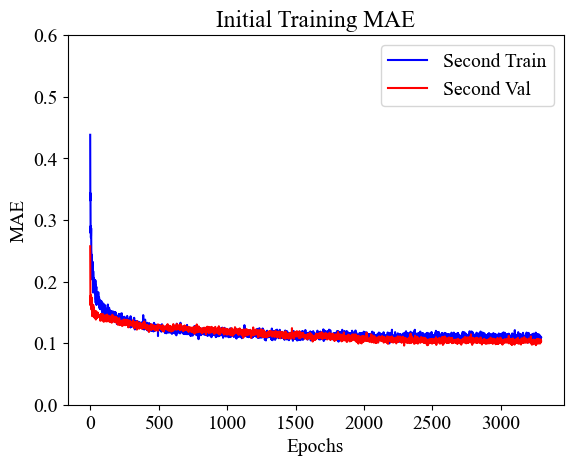

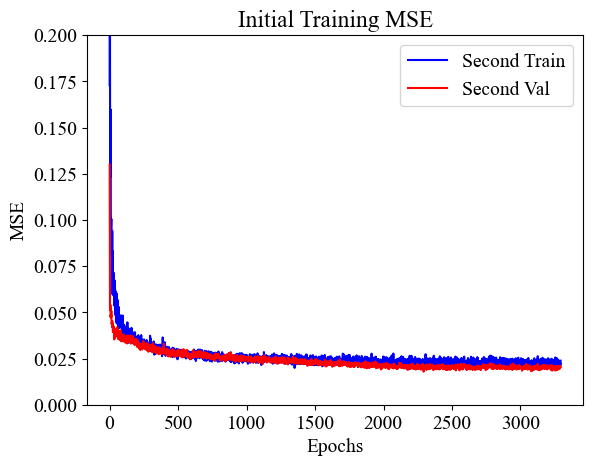

In [64]:
# 绘制MAE与Epochs的关系图
mae = eshistory.history['mae']
val_mae = eshistory.history['val_mae']
epochs = range(1, len(mae) + 1)

# 绘制MAE曲线
plt.plot(epochs, mae, 'b', label='Second Train')
plt.plot(epochs, val_mae, 'r', label='Second Val')
plt.title('Initial Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 0.6])

# 显示图像
plt.show()

# 绘制MSE与Epochs的关系图
mse = eshistory.history['mse']
val_mse = eshistory.history['val_mse']
epochs = range(1, len(mse) + 1)

# 绘制MSE曲线
plt.plot(epochs, mse, 'b', label='Second Train')
plt.plot(epochs, val_mse, 'r', label='Second Val')
plt.title('Initial Training MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 0.2])

# 显示图像
plt.show()

In [65]:
loss, mae, mse = imodel.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} V".format(mae))

2/2 - 0s - loss: 0.0289 - mae: 0.1119 - mse: 0.0239 - 24ms/epoch - 12ms/step
Testing set Mean Abs Error:  0.11 V


8/8 [==============================] - 0s 1ms/step


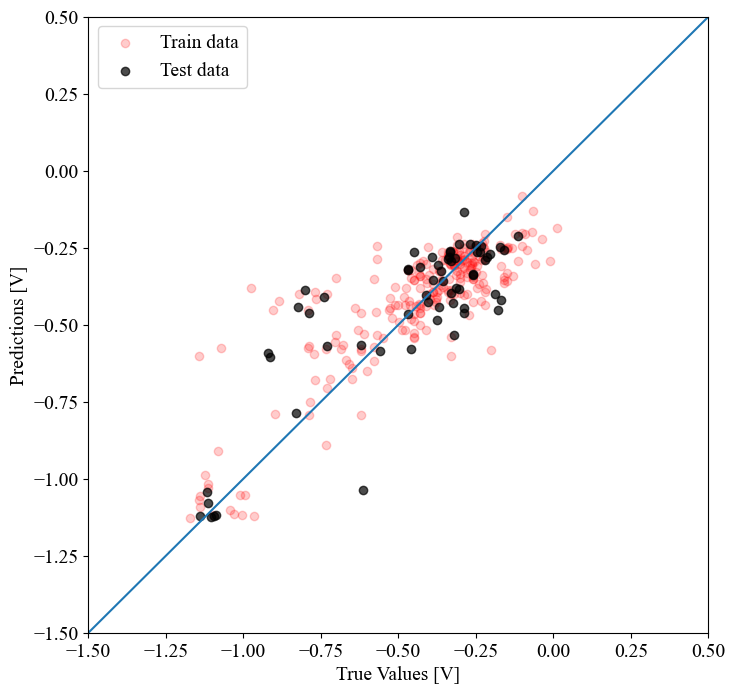

In [66]:
test_predictions = imodel.predict(X_test).flatten()
train_predictions = imodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [67]:
print('深度学习初训练模型评价指标展示：')

# 对测试集进行预测
y_pred_test = imodel.predict(X_test)

# 计算R^2分数
r2_test = r2_score(y_test, y_pred_test)
print('测试集上的R^2 Score: ', r2_test)

# 对训练集进行预测
y_pred_train = imodel.predict(X_train)

# 计算R^2分数
r2_train = r2_score(y_train, y_pred_train)
print('训练集上的R^2 Score: ', r2_train)

# 计算测试集上的MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集上的MAE: ', mae_test)

# 计算训练集上的MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
print('训练集上的MAE: ', mae_train)

# 计算测试集上的MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集上的MSE: ', mse_test)

# 计算训练集上的MSE
mse_train = mean_squared_error(y_train, y_pred_train)
print('训练集上的MSE: ', mse_train)

# 计算测试集上的RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('测试集上的RMSE: ', rmse_test)

# 计算训练集上的RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('训练集上的RMSE: ', rmse_train)

深度学习初训练模型评价指标展示：
2/2 [==============================] - 0s 2ms/step
测试集上的R^2 Score:  0.7017013755572011
8/8 [==============================] - 0s 1ms/step
训练集上的R^2 Score:  0.7106352413372443
测试集上的MAE:  0.11189478394152626
训练集上的MAE:  0.09380102243924897
测试集上的MSE:  0.02388251990327649
训练集上的MSE:  0.018491196390646066
测试集上的RMSE:  0.1545397033233741
训练集上的RMSE:  0.13598233852469985


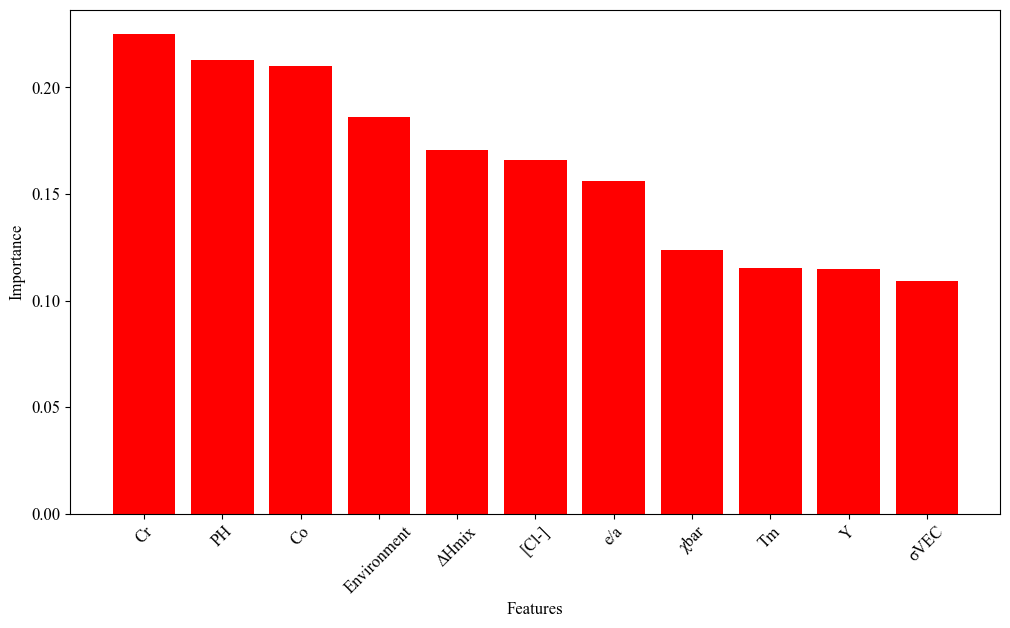

In [68]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 计算特征重要性
importance = imodel.get_weights()[0]
feature_importance = np.abs(importance).mean(axis=1)

# 按重要性从大到小排序
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 画出柱状图
ax = plt.subplot(111)
ax.bar(sorted_feature_names, sorted_feature_importance, color='red')

# 设置x轴标签旋转角度，避免重叠
plt.xticks(rotation=45)

# 设置柱状图之间留有一定的空间
plt.subplots_adjust(bottom=0.25)

# 设置x轴、y轴标签、标题
plt.xlabel('Features')
plt.ylabel('Importance')

# 显示图像
plt.show()

In [69]:
imodel.save('D:\IPython\Corrosion-ML\saved_model2\深度学习\初训练模型\DL_5')

INFO:tensorflow:Assets written to: D:\IPython\Corrosion-ML\saved_model2\深度学习\初训练模型\DL_5\assets


# 贝叶斯优化

In [70]:
import optuna
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 定义目标函数
def target_function(trial):
    # 定义超参数搜索空间
    n_layers = trial.suggest_int('n_layers', 2, 4)
    n_neurons = [trial.suggest_int(f'n_neurons_layer{i}', 40, 100, step=10) for i in range(n_layers)]
    l2_rate = trial.suggest_categorical('l2_rate', [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1])
    activation = trial.suggest_categorical('activation', ['relu', 'elu'])
    dropout_rate = trial.suggest_discrete_uniform('dropout_rate', 0, 0.2, 0.05)
    learning_rate = trial.suggest_categorical('learning_rate', [1e-2, 1e-3, 1e-4, 1e-5])

    # 构建模型
    input_shape = (len(X.columns),)
    BOmodel = Sequential()
    BOmodel.add(Dense(n_neurons[0], input_shape=input_shape, activation=activation, kernel_regularizer=keras.regularizers.l2(l2_rate)))
    for i in range(1, n_layers):
        BOmodel.add(Dense(n_neurons[i], activation=activation, kernel_regularizer=keras.regularizers.l2(l2_rate)))
        BOmodel.add(Dropout(dropout_rate))
    BOmodel.add(Dense(1))
    optimizer = Adam(lr=learning_rate)
    BOmodel.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=1000)
    BOhistory = BOmodel.fit(X_train, y_train, epochs=10000, validation_split=0.2, verbose=0, callbacks=[early_stopping], batch_size=5)

    # 返回测试集上的mse
    mse_test = BOmodel.evaluate(X_test, y_test, verbose=0)[2]
    return mse_test

# 运行贝叶斯优化搜索
study = optuna.create_study(direction='minimize')
study.optimize(target_function, n_trials=50)

# 输出最佳超参数
best_params = study.best_params
print('Best params:', best_params)

[I 2024-01-03 16:57:04,497] A new study created in memory with name: no-name-67ee1c14-b00b-454c-a4e1-82768d684387
D:\Python\temp\ipykernel_10276\3153691244.py:17: FutureWarning: suggest_discrete_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  dropout_rate = trial.suggest_discrete_uniform('dropout_rate', 0, 0.2, 0.05)
D:\Python\anaconda\envs\tf2x\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
D:\Python\anaconda\envs\tf2x\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To

[I 2024-01-03 18:34:42,086] Trial 22 finished with value: 0.0241809394210577 and parameters: {'n_layers': 3, 'n_neurons_layer0': 100, 'n_neurons_layer1': 70, 'n_neurons_layer2': 60, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.05, 'learning_rate': 0.01}. Best is trial 4 with value: 0.01844640262424946.
[I 2024-01-03 18:36:27,277] Trial 23 finished with value: 0.02357161045074463 and parameters: {'n_layers': 3, 'n_neurons_layer0': 90, 'n_neurons_layer1': 60, 'n_neurons_layer2': 80, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.01}. Best is trial 4 with value: 0.01844640262424946.
[I 2024-01-03 18:40:04,897] Trial 24 finished with value: 0.016582198441028595 and parameters: {'n_layers': 3, 'n_neurons_layer0': 100, 'n_neurons_layer1': 80, 'n_neurons_layer2': 70, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001}. Best is trial 24 with value: 0.016582198441028595.
[I 2024-01-03 18:41:40,151] Trial 25 finish

[I 2024-01-03 20:19:30,807] Trial 47 finished with value: 0.01787473075091839 and parameters: {'n_layers': 2, 'n_neurons_layer0': 80, 'n_neurons_layer1': 90, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 1e-05}. Best is trial 24 with value: 0.016582198441028595.
[I 2024-01-03 20:24:52,662] Trial 48 finished with value: 0.0176200233399868 and parameters: {'n_layers': 2, 'n_neurons_layer0': 80, 'n_neurons_layer1': 90, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.15000000000000002, 'learning_rate': 1e-05}. Best is trial 24 with value: 0.016582198441028595.
[I 2024-01-03 20:38:24,193] Trial 49 finished with value: 0.04183227941393852 and parameters: {'n_layers': 2, 'n_neurons_layer0': 80, 'n_neurons_layer1': 90, 'l2_rate': 0.1, 'activation': 'elu', 'dropout_rate': 0.15000000000000002, 'learning_rate': 1e-05}. Best is trial 24 with value: 0.016582198441028595.


Best params: {'n_layers': 3, 'n_neurons_layer0': 100, 'n_neurons_layer1': 80, 'n_neurons_layer2': 70, 'l2_rate': 0.0001, 'activation': 'relu', 'dropout_rate': 0.1, 'learning_rate': 0.001}


In [71]:
# 训练最佳模型
input_shape = (len(X.columns),)
BOmodel = Sequential()
BOmodel.add(Dense(best_params['n_neurons_layer0'], input_shape=input_shape, activation=best_params['activation'], kernel_regularizer=keras.regularizers.l2(best_params['l2_rate'])))
for i in range(1, best_params['n_layers']):
    BOmodel.add(Dense(best_params[f'n_neurons_layer{i}'], activation=best_params['activation'], kernel_regularizer=keras.regularizers.l2(best_params['l2_rate'])))
    BOmodel.add(Dropout(best_params['dropout_rate']))
BOmodel.add(Dense(1))
optimizer = Adam(lr=best_params['learning_rate'])
BOmodel.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
early_stopping = EarlyStopping(monitor='val_loss', patience=1000)
BOhistory = BOmodel.fit(X_train, y_train, epochs=10000, validation_split=0.2, verbose=2, callbacks=[early_stopping], batch_size=5)

Epoch 1/10000
41/41 - 2s - loss: 0.1227 - mae: 0.2439 - mse: 0.1047 - val_loss: 0.0598 - val_mae: 0.1525 - val_mse: 0.0421 - 2s/epoch - 51ms/step
Epoch 2/10000
41/41 - 0s - loss: 0.0728 - mae: 0.1651 - mse: 0.0552 - val_loss: 0.0501 - val_mae: 0.1387 - val_mse: 0.0327 - 114ms/epoch - 3ms/step
Epoch 3/10000
41/41 - 0s - loss: 0.0540 - mae: 0.1494 - mse: 0.0366 - val_loss: 0.0450 - val_mae: 0.1226 - val_mse: 0.0277 - 171ms/epoch - 4ms/step
Epoch 4/10000
41/41 - 0s - loss: 0.0537 - mae: 0.1382 - mse: 0.0365 - val_loss: 0.0457 - val_mae: 0.1260 - val_mse: 0.0286 - 97ms/epoch - 2ms/step
Epoch 5/10000
41/41 - 0s - loss: 0.0506 - mae: 0.1360 - mse: 0.0336 - val_loss: 0.0437 - val_mae: 0.1169 - val_mse: 0.0268 - 88ms/epoch - 2ms/step
Epoch 6/10000
41/41 - 0s - loss: 0.0500 - mae: 0.1323 - mse: 0.0331 - val_loss: 0.0461 - val_mae: 0.1239 - val_mse: 0.0292 - 90ms/epoch - 2ms/step
Epoch 7/10000
41/41 - 0s - loss: 0.0512 - mae: 0.1401 - mse: 0.0344 - val_loss: 0.0448 - val_mae: 0.1207 - val_mse: 0

Epoch 57/10000
41/41 - 0s - loss: 0.0256 - mae: 0.0794 - mse: 0.0138 - val_loss: 0.0329 - val_mae: 0.0964 - val_mse: 0.0212 - 93ms/epoch - 2ms/step
Epoch 58/10000
41/41 - 0s - loss: 0.0277 - mae: 0.0867 - mse: 0.0160 - val_loss: 0.0345 - val_mae: 0.0977 - val_mse: 0.0229 - 88ms/epoch - 2ms/step
Epoch 59/10000
41/41 - 0s - loss: 0.0264 - mae: 0.0797 - mse: 0.0148 - val_loss: 0.0338 - val_mae: 0.0942 - val_mse: 0.0223 - 86ms/epoch - 2ms/step
Epoch 60/10000
41/41 - 0s - loss: 0.0248 - mae: 0.0799 - mse: 0.0133 - val_loss: 0.0357 - val_mae: 0.1044 - val_mse: 0.0242 - 89ms/epoch - 2ms/step
Epoch 61/10000
41/41 - 0s - loss: 0.0231 - mae: 0.0751 - mse: 0.0117 - val_loss: 0.0344 - val_mae: 0.0982 - val_mse: 0.0230 - 94ms/epoch - 2ms/step
Epoch 62/10000
41/41 - 0s - loss: 0.0252 - mae: 0.0821 - mse: 0.0139 - val_loss: 0.0325 - val_mae: 0.0936 - val_mse: 0.0212 - 83ms/epoch - 2ms/step
Epoch 63/10000
41/41 - 0s - loss: 0.0241 - mae: 0.0762 - mse: 0.0129 - val_loss: 0.0355 - val_mae: 0.1028 - val_

Epoch 113/10000
41/41 - 0s - loss: 0.0216 - mae: 0.0758 - mse: 0.0138 - val_loss: 0.0300 - val_mae: 0.0943 - val_mse: 0.0222 - 90ms/epoch - 2ms/step
Epoch 114/10000
41/41 - 0s - loss: 0.0209 - mae: 0.0737 - mse: 0.0131 - val_loss: 0.0304 - val_mae: 0.0990 - val_mse: 0.0227 - 91ms/epoch - 2ms/step
Epoch 115/10000
41/41 - 0s - loss: 0.0194 - mae: 0.0746 - mse: 0.0117 - val_loss: 0.0307 - val_mae: 0.0998 - val_mse: 0.0230 - 98ms/epoch - 2ms/step
Epoch 116/10000
41/41 - 0s - loss: 0.0205 - mae: 0.0752 - mse: 0.0128 - val_loss: 0.0283 - val_mae: 0.0924 - val_mse: 0.0207 - 91ms/epoch - 2ms/step
Epoch 117/10000
41/41 - 0s - loss: 0.0213 - mae: 0.0784 - mse: 0.0137 - val_loss: 0.0325 - val_mae: 0.0995 - val_mse: 0.0248 - 89ms/epoch - 2ms/step
Epoch 118/10000
41/41 - 0s - loss: 0.0177 - mae: 0.0673 - mse: 0.0101 - val_loss: 0.0311 - val_mae: 0.0965 - val_mse: 0.0235 - 95ms/epoch - 2ms/step
Epoch 119/10000
41/41 - 0s - loss: 0.0192 - mae: 0.0755 - mse: 0.0117 - val_loss: 0.0306 - val_mae: 0.1013

Epoch 168/10000
41/41 - 0s - loss: 0.0165 - mae: 0.0693 - mse: 0.0110 - val_loss: 0.0319 - val_mae: 0.1032 - val_mse: 0.0264 - 97ms/epoch - 2ms/step
Epoch 169/10000
41/41 - 0s - loss: 0.0159 - mae: 0.0691 - mse: 0.0104 - val_loss: 0.0306 - val_mae: 0.1003 - val_mse: 0.0251 - 86ms/epoch - 2ms/step
Epoch 170/10000
41/41 - 0s - loss: 0.0154 - mae: 0.0685 - mse: 0.0099 - val_loss: 0.0300 - val_mae: 0.1010 - val_mse: 0.0245 - 87ms/epoch - 2ms/step
Epoch 171/10000
41/41 - 0s - loss: 0.0146 - mae: 0.0649 - mse: 0.0092 - val_loss: 0.0304 - val_mae: 0.0977 - val_mse: 0.0249 - 99ms/epoch - 2ms/step
Epoch 172/10000
41/41 - 0s - loss: 0.0150 - mae: 0.0662 - mse: 0.0096 - val_loss: 0.0314 - val_mae: 0.0948 - val_mse: 0.0260 - 92ms/epoch - 2ms/step
Epoch 173/10000
41/41 - 0s - loss: 0.0152 - mae: 0.0627 - mse: 0.0098 - val_loss: 0.0296 - val_mae: 0.0963 - val_mse: 0.0242 - 90ms/epoch - 2ms/step
Epoch 174/10000
41/41 - 0s - loss: 0.0154 - mae: 0.0667 - mse: 0.0101 - val_loss: 0.0291 - val_mae: 0.0969

Epoch 223/10000
41/41 - 0s - loss: 0.0142 - mae: 0.0659 - mse: 0.0097 - val_loss: 0.0294 - val_mae: 0.1058 - val_mse: 0.0250 - 91ms/epoch - 2ms/step
Epoch 224/10000
41/41 - 0s - loss: 0.0158 - mae: 0.0707 - mse: 0.0114 - val_loss: 0.0315 - val_mae: 0.1062 - val_mse: 0.0271 - 89ms/epoch - 2ms/step
Epoch 225/10000
41/41 - 0s - loss: 0.0129 - mae: 0.0625 - mse: 0.0085 - val_loss: 0.0306 - val_mae: 0.0964 - val_mse: 0.0262 - 96ms/epoch - 2ms/step
Epoch 226/10000
41/41 - 0s - loss: 0.0137 - mae: 0.0627 - mse: 0.0093 - val_loss: 0.0311 - val_mae: 0.1006 - val_mse: 0.0267 - 92ms/epoch - 2ms/step
Epoch 227/10000
41/41 - 0s - loss: 0.0134 - mae: 0.0621 - mse: 0.0090 - val_loss: 0.0339 - val_mae: 0.1055 - val_mse: 0.0296 - 90ms/epoch - 2ms/step
Epoch 228/10000
41/41 - 0s - loss: 0.0138 - mae: 0.0671 - mse: 0.0094 - val_loss: 0.0286 - val_mae: 0.0988 - val_mse: 0.0242 - 99ms/epoch - 2ms/step
Epoch 229/10000
41/41 - 0s - loss: 0.0138 - mae: 0.0659 - mse: 0.0095 - val_loss: 0.0290 - val_mae: 0.0982

Epoch 278/10000
41/41 - 0s - loss: 0.0128 - mae: 0.0608 - mse: 0.0088 - val_loss: 0.0314 - val_mae: 0.1031 - val_mse: 0.0275 - 94ms/epoch - 2ms/step
Epoch 279/10000
41/41 - 0s - loss: 0.0130 - mae: 0.0639 - mse: 0.0091 - val_loss: 0.0299 - val_mae: 0.0927 - val_mse: 0.0260 - 93ms/epoch - 2ms/step
Epoch 280/10000
41/41 - 0s - loss: 0.0121 - mae: 0.0593 - mse: 0.0082 - val_loss: 0.0313 - val_mae: 0.0942 - val_mse: 0.0275 - 88ms/epoch - 2ms/step
Epoch 281/10000
41/41 - 0s - loss: 0.0137 - mae: 0.0655 - mse: 0.0098 - val_loss: 0.0318 - val_mae: 0.0983 - val_mse: 0.0279 - 89ms/epoch - 2ms/step
Epoch 282/10000
41/41 - 0s - loss: 0.0128 - mae: 0.0604 - mse: 0.0089 - val_loss: 0.0316 - val_mae: 0.1052 - val_mse: 0.0277 - 101ms/epoch - 2ms/step
Epoch 283/10000
41/41 - 0s - loss: 0.0131 - mae: 0.0654 - mse: 0.0092 - val_loss: 0.0359 - val_mae: 0.1077 - val_mse: 0.0321 - 92ms/epoch - 2ms/step
Epoch 284/10000
41/41 - 0s - loss: 0.0127 - mae: 0.0648 - mse: 0.0089 - val_loss: 0.0309 - val_mae: 0.098

Epoch 333/10000
41/41 - 0s - loss: 0.0133 - mae: 0.0654 - mse: 0.0099 - val_loss: 0.0301 - val_mae: 0.1039 - val_mse: 0.0267 - 90ms/epoch - 2ms/step
Epoch 334/10000
41/41 - 0s - loss: 0.0128 - mae: 0.0641 - mse: 0.0094 - val_loss: 0.0330 - val_mae: 0.1102 - val_mse: 0.0296 - 89ms/epoch - 2ms/step
Epoch 335/10000
41/41 - 0s - loss: 0.0121 - mae: 0.0598 - mse: 0.0087 - val_loss: 0.0321 - val_mae: 0.1072 - val_mse: 0.0288 - 91ms/epoch - 2ms/step
Epoch 336/10000
41/41 - 0s - loss: 0.0115 - mae: 0.0585 - mse: 0.0082 - val_loss: 0.0305 - val_mae: 0.1001 - val_mse: 0.0272 - 96ms/epoch - 2ms/step
Epoch 337/10000
41/41 - 0s - loss: 0.0121 - mae: 0.0601 - mse: 0.0087 - val_loss: 0.0302 - val_mae: 0.0995 - val_mse: 0.0268 - 92ms/epoch - 2ms/step
Epoch 338/10000
41/41 - 0s - loss: 0.0122 - mae: 0.0649 - mse: 0.0088 - val_loss: 0.0341 - val_mae: 0.1122 - val_mse: 0.0308 - 94ms/epoch - 2ms/step
Epoch 339/10000
41/41 - 0s - loss: 0.0116 - mae: 0.0596 - mse: 0.0083 - val_loss: 0.0292 - val_mae: 0.1048

Epoch 388/10000
41/41 - 0s - loss: 0.0111 - mae: 0.0594 - mse: 0.0080 - val_loss: 0.0300 - val_mae: 0.1003 - val_mse: 0.0269 - 91ms/epoch - 2ms/step
Epoch 389/10000
41/41 - 0s - loss: 0.0112 - mae: 0.0606 - mse: 0.0082 - val_loss: 0.0293 - val_mae: 0.0998 - val_mse: 0.0262 - 89ms/epoch - 2ms/step
Epoch 390/10000
41/41 - 0s - loss: 0.0118 - mae: 0.0641 - mse: 0.0087 - val_loss: 0.0318 - val_mae: 0.1064 - val_mse: 0.0287 - 94ms/epoch - 2ms/step
Epoch 391/10000
41/41 - 0s - loss: 0.0125 - mae: 0.0628 - mse: 0.0094 - val_loss: 0.0308 - val_mae: 0.1090 - val_mse: 0.0277 - 88ms/epoch - 2ms/step
Epoch 392/10000
41/41 - 0s - loss: 0.0108 - mae: 0.0589 - mse: 0.0077 - val_loss: 0.0317 - val_mae: 0.1010 - val_mse: 0.0286 - 89ms/epoch - 2ms/step
Epoch 393/10000
41/41 - 0s - loss: 0.0128 - mae: 0.0652 - mse: 0.0097 - val_loss: 0.0332 - val_mae: 0.1098 - val_mse: 0.0301 - 99ms/epoch - 2ms/step
Epoch 394/10000
41/41 - 0s - loss: 0.0115 - mae: 0.0583 - mse: 0.0085 - val_loss: 0.0280 - val_mae: 0.1035

Epoch 443/10000
41/41 - 0s - loss: 0.0113 - mae: 0.0603 - mse: 0.0084 - val_loss: 0.0296 - val_mae: 0.0972 - val_mse: 0.0268 - 93ms/epoch - 2ms/step
Epoch 444/10000
41/41 - 0s - loss: 0.0111 - mae: 0.0606 - mse: 0.0082 - val_loss: 0.0301 - val_mae: 0.1009 - val_mse: 0.0273 - 86ms/epoch - 2ms/step
Epoch 445/10000
41/41 - 0s - loss: 0.0122 - mae: 0.0660 - mse: 0.0093 - val_loss: 0.0293 - val_mae: 0.1013 - val_mse: 0.0264 - 90ms/epoch - 2ms/step
Epoch 446/10000
41/41 - 0s - loss: 0.0128 - mae: 0.0629 - mse: 0.0099 - val_loss: 0.0293 - val_mae: 0.0971 - val_mse: 0.0264 - 95ms/epoch - 2ms/step
Epoch 447/10000
41/41 - 0s - loss: 0.0110 - mae: 0.0621 - mse: 0.0082 - val_loss: 0.0304 - val_mae: 0.0996 - val_mse: 0.0275 - 97ms/epoch - 2ms/step
Epoch 448/10000
41/41 - 0s - loss: 0.0105 - mae: 0.0569 - mse: 0.0076 - val_loss: 0.0304 - val_mae: 0.0969 - val_mse: 0.0275 - 92ms/epoch - 2ms/step
Epoch 449/10000
41/41 - 0s - loss: 0.0118 - mae: 0.0634 - mse: 0.0090 - val_loss: 0.0313 - val_mae: 0.1037

Epoch 498/10000
41/41 - 0s - loss: 0.0106 - mae: 0.0576 - mse: 0.0079 - val_loss: 0.0312 - val_mae: 0.1031 - val_mse: 0.0285 - 90ms/epoch - 2ms/step
Epoch 499/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0547 - mse: 0.0076 - val_loss: 0.0312 - val_mae: 0.1005 - val_mse: 0.0285 - 91ms/epoch - 2ms/step
Epoch 500/10000
41/41 - 0s - loss: 0.0106 - mae: 0.0570 - mse: 0.0079 - val_loss: 0.0322 - val_mae: 0.1046 - val_mse: 0.0295 - 96ms/epoch - 2ms/step
Epoch 501/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0564 - mse: 0.0075 - val_loss: 0.0308 - val_mae: 0.1033 - val_mse: 0.0281 - 87ms/epoch - 2ms/step
Epoch 502/10000
41/41 - 0s - loss: 0.0105 - mae: 0.0584 - mse: 0.0078 - val_loss: 0.0293 - val_mae: 0.0959 - val_mse: 0.0267 - 90ms/epoch - 2ms/step
Epoch 503/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0599 - mse: 0.0082 - val_loss: 0.0296 - val_mae: 0.0942 - val_mse: 0.0269 - 101ms/epoch - 2ms/step
Epoch 504/10000
41/41 - 0s - loss: 0.0111 - mae: 0.0604 - mse: 0.0085 - val_loss: 0.0316 - val_mae: 0.100

Epoch 553/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0570 - mse: 0.0077 - val_loss: 0.0341 - val_mae: 0.1069 - val_mse: 0.0315 - 89ms/epoch - 2ms/step
Epoch 554/10000
41/41 - 0s - loss: 0.0108 - mae: 0.0596 - mse: 0.0082 - val_loss: 0.0307 - val_mae: 0.1080 - val_mse: 0.0281 - 92ms/epoch - 2ms/step
Epoch 555/10000
41/41 - 0s - loss: 0.0108 - mae: 0.0583 - mse: 0.0082 - val_loss: 0.0313 - val_mae: 0.1002 - val_mse: 0.0287 - 89ms/epoch - 2ms/step
Epoch 556/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0547 - mse: 0.0074 - val_loss: 0.0308 - val_mae: 0.1014 - val_mse: 0.0282 - 92ms/epoch - 2ms/step
Epoch 557/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0561 - mse: 0.0084 - val_loss: 0.0323 - val_mae: 0.1053 - val_mse: 0.0297 - 95ms/epoch - 2ms/step
Epoch 558/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0528 - mse: 0.0071 - val_loss: 0.0311 - val_mae: 0.1016 - val_mse: 0.0285 - 90ms/epoch - 2ms/step
Epoch 559/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0604 - mse: 0.0078 - val_loss: 0.0324 - val_mae: 0.1068

Epoch 608/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0570 - mse: 0.0078 - val_loss: 0.0310 - val_mae: 0.1032 - val_mse: 0.0285 - 88ms/epoch - 2ms/step
Epoch 609/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0544 - mse: 0.0071 - val_loss: 0.0319 - val_mae: 0.1053 - val_mse: 0.0294 - 89ms/epoch - 2ms/step
Epoch 610/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0556 - mse: 0.0070 - val_loss: 0.0299 - val_mae: 0.1018 - val_mse: 0.0275 - 95ms/epoch - 2ms/step
Epoch 611/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0520 - mse: 0.0076 - val_loss: 0.0316 - val_mae: 0.1057 - val_mse: 0.0291 - 91ms/epoch - 2ms/step
Epoch 612/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0550 - mse: 0.0074 - val_loss: 0.0304 - val_mae: 0.1042 - val_mse: 0.0279 - 91ms/epoch - 2ms/step
Epoch 613/10000
41/41 - 0s - loss: 0.0112 - mae: 0.0622 - mse: 0.0087 - val_loss: 0.0311 - val_mae: 0.1019 - val_mse: 0.0287 - 100ms/epoch - 2ms/step
Epoch 614/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0536 - mse: 0.0069 - val_loss: 0.0320 - val_mae: 0.105

Epoch 663/10000
41/41 - 0s - loss: 0.0113 - mae: 0.0621 - mse: 0.0089 - val_loss: 0.0318 - val_mae: 0.1008 - val_mse: 0.0293 - 94ms/epoch - 2ms/step
Epoch 664/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0588 - mse: 0.0085 - val_loss: 0.0297 - val_mae: 0.1018 - val_mse: 0.0272 - 93ms/epoch - 2ms/step
Epoch 665/10000
41/41 - 0s - loss: 0.0142 - mae: 0.0693 - mse: 0.0118 - val_loss: 0.0310 - val_mae: 0.1000 - val_mse: 0.0285 - 90ms/epoch - 2ms/step
Epoch 666/10000
41/41 - 0s - loss: 0.0119 - mae: 0.0661 - mse: 0.0094 - val_loss: 0.0302 - val_mae: 0.0979 - val_mse: 0.0278 - 96ms/epoch - 2ms/step
Epoch 667/10000
41/41 - 0s - loss: 0.0106 - mae: 0.0586 - mse: 0.0081 - val_loss: 0.0324 - val_mae: 0.1025 - val_mse: 0.0300 - 95ms/epoch - 2ms/step
Epoch 668/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0580 - mse: 0.0077 - val_loss: 0.0282 - val_mae: 0.1006 - val_mse: 0.0258 - 92ms/epoch - 2ms/step
Epoch 669/10000
41/41 - 0s - loss: 0.0119 - mae: 0.0599 - mse: 0.0094 - val_loss: 0.0272 - val_mae: 0.0975

Epoch 718/10000
41/41 - 0s - loss: 0.0098 - mae: 0.0553 - mse: 0.0075 - val_loss: 0.0292 - val_mae: 0.1001 - val_mse: 0.0269 - 94ms/epoch - 2ms/step
Epoch 719/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0581 - mse: 0.0086 - val_loss: 0.0319 - val_mae: 0.1012 - val_mse: 0.0296 - 98ms/epoch - 2ms/step
Epoch 720/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0572 - mse: 0.0079 - val_loss: 0.0301 - val_mae: 0.1055 - val_mse: 0.0278 - 89ms/epoch - 2ms/step
Epoch 721/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0504 - mse: 0.0066 - val_loss: 0.0299 - val_mae: 0.0998 - val_mse: 0.0276 - 88ms/epoch - 2ms/step
Epoch 722/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0564 - mse: 0.0079 - val_loss: 0.0324 - val_mae: 0.1042 - val_mse: 0.0300 - 98ms/epoch - 2ms/step
Epoch 723/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0540 - mse: 0.0071 - val_loss: 0.0296 - val_mae: 0.0981 - val_mse: 0.0273 - 92ms/epoch - 2ms/step
Epoch 724/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0551 - mse: 0.0073 - val_loss: 0.0309 - val_mae: 0.1010

Epoch 773/10000
41/41 - 0s - loss: 0.0117 - mae: 0.0607 - mse: 0.0094 - val_loss: 0.0281 - val_mae: 0.0999 - val_mse: 0.0259 - 87ms/epoch - 2ms/step
Epoch 774/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0568 - mse: 0.0080 - val_loss: 0.0313 - val_mae: 0.1053 - val_mse: 0.0290 - 88ms/epoch - 2ms/step
Epoch 775/10000
41/41 - 0s - loss: 0.0111 - mae: 0.0595 - mse: 0.0088 - val_loss: 0.0254 - val_mae: 0.0972 - val_mse: 0.0231 - 91ms/epoch - 2ms/step
Epoch 776/10000
41/41 - 0s - loss: 0.0104 - mae: 0.0573 - mse: 0.0081 - val_loss: 0.0314 - val_mae: 0.1024 - val_mse: 0.0292 - 92ms/epoch - 2ms/step
Epoch 777/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0519 - mse: 0.0069 - val_loss: 0.0315 - val_mae: 0.1014 - val_mse: 0.0292 - 92ms/epoch - 2ms/step
Epoch 778/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0535 - mse: 0.0070 - val_loss: 0.0311 - val_mae: 0.1025 - val_mse: 0.0289 - 91ms/epoch - 2ms/step
Epoch 779/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0504 - mse: 0.0070 - val_loss: 0.0284 - val_mae: 0.0990

Epoch 828/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0534 - mse: 0.0074 - val_loss: 0.0304 - val_mae: 0.1002 - val_mse: 0.0281 - 91ms/epoch - 2ms/step
Epoch 829/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0517 - mse: 0.0071 - val_loss: 0.0296 - val_mae: 0.0994 - val_mse: 0.0274 - 99ms/epoch - 2ms/step
Epoch 830/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0523 - mse: 0.0071 - val_loss: 0.0298 - val_mae: 0.1033 - val_mse: 0.0276 - 92ms/epoch - 2ms/step
Epoch 831/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0541 - mse: 0.0074 - val_loss: 0.0292 - val_mae: 0.0970 - val_mse: 0.0270 - 91ms/epoch - 2ms/step
Epoch 832/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0555 - mse: 0.0080 - val_loss: 0.0292 - val_mae: 0.0979 - val_mse: 0.0270 - 100ms/epoch - 2ms/step
Epoch 833/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0520 - mse: 0.0072 - val_loss: 0.0296 - val_mae: 0.0994 - val_mse: 0.0274 - 93ms/epoch - 2ms/step
Epoch 834/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0572 - mse: 0.0080 - val_loss: 0.0290 - val_mae: 0.093

Epoch 883/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0542 - mse: 0.0076 - val_loss: 0.0275 - val_mae: 0.0981 - val_mse: 0.0253 - 100ms/epoch - 2ms/step
Epoch 884/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0597 - mse: 0.0081 - val_loss: 0.0289 - val_mae: 0.1035 - val_mse: 0.0267 - 91ms/epoch - 2ms/step
Epoch 885/10000
41/41 - 0s - loss: 0.0111 - mae: 0.0615 - mse: 0.0089 - val_loss: 0.0296 - val_mae: 0.0993 - val_mse: 0.0275 - 92ms/epoch - 2ms/step
Epoch 886/10000
41/41 - 0s - loss: 0.0106 - mae: 0.0588 - mse: 0.0085 - val_loss: 0.0287 - val_mae: 0.0987 - val_mse: 0.0265 - 95ms/epoch - 2ms/step
Epoch 887/10000
41/41 - 0s - loss: 0.0101 - mae: 0.0567 - mse: 0.0079 - val_loss: 0.0291 - val_mae: 0.1003 - val_mse: 0.0269 - 90ms/epoch - 2ms/step
Epoch 888/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0649 - mse: 0.0088 - val_loss: 0.0293 - val_mae: 0.0959 - val_mse: 0.0271 - 91ms/epoch - 2ms/step
Epoch 889/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0543 - mse: 0.0073 - val_loss: 0.0309 - val_mae: 0.102

Epoch 938/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0586 - mse: 0.0087 - val_loss: 0.0300 - val_mae: 0.1008 - val_mse: 0.0279 - 94ms/epoch - 2ms/step
Epoch 939/10000
41/41 - 0s - loss: 0.0113 - mae: 0.0610 - mse: 0.0091 - val_loss: 0.0292 - val_mae: 0.1059 - val_mse: 0.0270 - 93ms/epoch - 2ms/step
Epoch 940/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0589 - mse: 0.0077 - val_loss: 0.0312 - val_mae: 0.1008 - val_mse: 0.0290 - 96ms/epoch - 2ms/step
Epoch 941/10000
41/41 - 0s - loss: 0.0098 - mae: 0.0562 - mse: 0.0076 - val_loss: 0.0306 - val_mae: 0.1008 - val_mse: 0.0284 - 88ms/epoch - 2ms/step
Epoch 942/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0558 - mse: 0.0074 - val_loss: 0.0310 - val_mae: 0.1055 - val_mse: 0.0288 - 92ms/epoch - 2ms/step
Epoch 943/10000
41/41 - 0s - loss: 0.0104 - mae: 0.0562 - mse: 0.0082 - val_loss: 0.0315 - val_mae: 0.1061 - val_mse: 0.0293 - 96ms/epoch - 2ms/step
Epoch 944/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0592 - mse: 0.0081 - val_loss: 0.0296 - val_mae: 0.0946

Epoch 993/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0541 - mse: 0.0074 - val_loss: 0.0299 - val_mae: 0.1015 - val_mse: 0.0278 - 110ms/epoch - 3ms/step
Epoch 994/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0555 - mse: 0.0073 - val_loss: 0.0296 - val_mae: 0.0974 - val_mse: 0.0274 - 110ms/epoch - 3ms/step
Epoch 995/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0540 - mse: 0.0072 - val_loss: 0.0332 - val_mae: 0.1054 - val_mse: 0.0311 - 112ms/epoch - 3ms/step
Epoch 996/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0564 - mse: 0.0078 - val_loss: 0.0306 - val_mae: 0.1025 - val_mse: 0.0285 - 93ms/epoch - 2ms/step
Epoch 997/10000
41/41 - 0s - loss: 0.0104 - mae: 0.0583 - mse: 0.0083 - val_loss: 0.0305 - val_mae: 0.0966 - val_mse: 0.0284 - 93ms/epoch - 2ms/step
Epoch 998/10000
41/41 - 0s - loss: 0.0098 - mae: 0.0559 - mse: 0.0077 - val_loss: 0.0293 - val_mae: 0.1008 - val_mse: 0.0272 - 97ms/epoch - 2ms/step
Epoch 999/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0530 - mse: 0.0075 - val_loss: 0.0306 - val_mae: 0.1

Epoch 1048/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0524 - mse: 0.0075 - val_loss: 0.0302 - val_mae: 0.0998 - val_mse: 0.0281 - 99ms/epoch - 2ms/step
Epoch 1049/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0539 - mse: 0.0072 - val_loss: 0.0295 - val_mae: 0.0970 - val_mse: 0.0275 - 82ms/epoch - 2ms/step
Epoch 1050/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0521 - mse: 0.0070 - val_loss: 0.0301 - val_mae: 0.1032 - val_mse: 0.0280 - 84ms/epoch - 2ms/step
Epoch 1051/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0512 - mse: 0.0070 - val_loss: 0.0299 - val_mae: 0.1008 - val_mse: 0.0278 - 91ms/epoch - 2ms/step
Epoch 1052/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0494 - mse: 0.0066 - val_loss: 0.0321 - val_mae: 0.1025 - val_mse: 0.0300 - 90ms/epoch - 2ms/step
Epoch 1053/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0559 - mse: 0.0072 - val_loss: 0.0311 - val_mae: 0.1026 - val_mse: 0.0290 - 87ms/epoch - 2ms/step
Epoch 1054/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0518 - mse: 0.0070 - val_loss: 0.0320 - val_mae:

Epoch 1103/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0603 - mse: 0.0081 - val_loss: 0.0305 - val_mae: 0.1004 - val_mse: 0.0284 - 91ms/epoch - 2ms/step
Epoch 1104/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0548 - mse: 0.0068 - val_loss: 0.0304 - val_mae: 0.1002 - val_mse: 0.0283 - 94ms/epoch - 2ms/step
Epoch 1105/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0491 - mse: 0.0064 - val_loss: 0.0324 - val_mae: 0.1032 - val_mse: 0.0303 - 95ms/epoch - 2ms/step
Epoch 1106/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0524 - mse: 0.0069 - val_loss: 0.0309 - val_mae: 0.0984 - val_mse: 0.0288 - 92ms/epoch - 2ms/step
Epoch 1107/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0504 - mse: 0.0071 - val_loss: 0.0325 - val_mae: 0.1061 - val_mse: 0.0304 - 92ms/epoch - 2ms/step
Epoch 1108/10000
41/41 - 0s - loss: 0.0104 - mae: 0.0581 - mse: 0.0083 - val_loss: 0.0329 - val_mae: 0.1038 - val_mse: 0.0308 - 89ms/epoch - 2ms/step
Epoch 1109/10000
41/41 - 0s - loss: 0.0109 - mae: 0.0552 - mse: 0.0088 - val_loss: 0.0311 - val_mae:

Epoch 1158/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0497 - mse: 0.0067 - val_loss: 0.0313 - val_mae: 0.1017 - val_mse: 0.0292 - 118ms/epoch - 3ms/step
Epoch 1159/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0540 - mse: 0.0076 - val_loss: 0.0286 - val_mae: 0.0940 - val_mse: 0.0265 - 91ms/epoch - 2ms/step
Epoch 1160/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0571 - mse: 0.0081 - val_loss: 0.0298 - val_mae: 0.0943 - val_mse: 0.0277 - 92ms/epoch - 2ms/step
Epoch 1161/10000
41/41 - 0s - loss: 0.0104 - mae: 0.0579 - mse: 0.0083 - val_loss: 0.0303 - val_mae: 0.0982 - val_mse: 0.0281 - 97ms/epoch - 2ms/step
Epoch 1162/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0533 - mse: 0.0071 - val_loss: 0.0282 - val_mae: 0.0987 - val_mse: 0.0261 - 91ms/epoch - 2ms/step
Epoch 1163/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0499 - mse: 0.0069 - val_loss: 0.0301 - val_mae: 0.0976 - val_mse: 0.0280 - 89ms/epoch - 2ms/step
Epoch 1164/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0545 - mse: 0.0075 - val_loss: 0.0296 - val_mae

Epoch 1213/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0571 - mse: 0.0080 - val_loss: 0.0291 - val_mae: 0.0965 - val_mse: 0.0270 - 92ms/epoch - 2ms/step
Epoch 1214/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0540 - mse: 0.0076 - val_loss: 0.0322 - val_mae: 0.1049 - val_mse: 0.0302 - 90ms/epoch - 2ms/step
Epoch 1215/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0571 - mse: 0.0077 - val_loss: 0.0310 - val_mae: 0.0975 - val_mse: 0.0290 - 96ms/epoch - 2ms/step
Epoch 1216/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0551 - mse: 0.0074 - val_loss: 0.0296 - val_mae: 0.1009 - val_mse: 0.0276 - 90ms/epoch - 2ms/step
Epoch 1217/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0542 - mse: 0.0072 - val_loss: 0.0292 - val_mae: 0.0996 - val_mse: 0.0271 - 92ms/epoch - 2ms/step
Epoch 1218/10000
41/41 - 0s - loss: 0.0105 - mae: 0.0566 - mse: 0.0084 - val_loss: 0.0308 - val_mae: 0.1009 - val_mse: 0.0287 - 93ms/epoch - 2ms/step
Epoch 1219/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0512 - mse: 0.0069 - val_loss: 0.0304 - val_mae:

Epoch 1268/10000
41/41 - 0s - loss: 0.0111 - mae: 0.0611 - mse: 0.0090 - val_loss: 0.0314 - val_mae: 0.1018 - val_mse: 0.0293 - 91ms/epoch - 2ms/step
Epoch 1269/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0527 - mse: 0.0071 - val_loss: 0.0281 - val_mae: 0.0944 - val_mse: 0.0260 - 91ms/epoch - 2ms/step
Epoch 1270/10000
41/41 - 0s - loss: 0.0114 - mae: 0.0647 - mse: 0.0093 - val_loss: 0.0266 - val_mae: 0.0971 - val_mse: 0.0245 - 97ms/epoch - 2ms/step
Epoch 1271/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0574 - mse: 0.0077 - val_loss: 0.0267 - val_mae: 0.0953 - val_mse: 0.0246 - 92ms/epoch - 2ms/step
Epoch 1272/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0518 - mse: 0.0073 - val_loss: 0.0281 - val_mae: 0.1006 - val_mse: 0.0260 - 89ms/epoch - 2ms/step
Epoch 1273/10000
41/41 - 0s - loss: 0.0098 - mae: 0.0532 - mse: 0.0077 - val_loss: 0.0296 - val_mae: 0.1000 - val_mse: 0.0275 - 88ms/epoch - 2ms/step
Epoch 1274/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0507 - mse: 0.0068 - val_loss: 0.0287 - val_mae:

Epoch 1323/10000
41/41 - 0s - loss: 0.0098 - mae: 0.0568 - mse: 0.0078 - val_loss: 0.0332 - val_mae: 0.1017 - val_mse: 0.0312 - 93ms/epoch - 2ms/step
Epoch 1324/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0562 - mse: 0.0075 - val_loss: 0.0282 - val_mae: 0.1031 - val_mse: 0.0261 - 100ms/epoch - 2ms/step
Epoch 1325/10000
41/41 - 0s - loss: 0.0105 - mae: 0.0595 - mse: 0.0085 - val_loss: 0.0301 - val_mae: 0.0991 - val_mse: 0.0280 - 90ms/epoch - 2ms/step
Epoch 1326/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0559 - mse: 0.0080 - val_loss: 0.0285 - val_mae: 0.1018 - val_mse: 0.0264 - 90ms/epoch - 2ms/step
Epoch 1327/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0587 - mse: 0.0082 - val_loss: 0.0301 - val_mae: 0.1006 - val_mse: 0.0280 - 107ms/epoch - 3ms/step
Epoch 1328/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0503 - mse: 0.0066 - val_loss: 0.0283 - val_mae: 0.1010 - val_mse: 0.0262 - 100ms/epoch - 2ms/step
Epoch 1329/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0517 - mse: 0.0070 - val_loss: 0.0283 - val_m

Epoch 1378/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0488 - mse: 0.0070 - val_loss: 0.0298 - val_mae: 0.0994 - val_mse: 0.0277 - 97ms/epoch - 2ms/step
Epoch 1379/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0547 - mse: 0.0075 - val_loss: 0.0312 - val_mae: 0.1001 - val_mse: 0.0291 - 92ms/epoch - 2ms/step
Epoch 1380/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0511 - mse: 0.0068 - val_loss: 0.0287 - val_mae: 0.0959 - val_mse: 0.0266 - 89ms/epoch - 2ms/step
Epoch 1381/10000
41/41 - 0s - loss: 0.0098 - mae: 0.0552 - mse: 0.0077 - val_loss: 0.0292 - val_mae: 0.1000 - val_mse: 0.0272 - 96ms/epoch - 2ms/step
Epoch 1382/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0543 - mse: 0.0070 - val_loss: 0.0303 - val_mae: 0.0996 - val_mse: 0.0283 - 93ms/epoch - 2ms/step
Epoch 1383/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0494 - mse: 0.0069 - val_loss: 0.0299 - val_mae: 0.1033 - val_mse: 0.0278 - 92ms/epoch - 2ms/step
Epoch 1384/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0523 - mse: 0.0069 - val_loss: 0.0306 - val_mae:

Epoch 1433/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0560 - mse: 0.0076 - val_loss: 0.0306 - val_mae: 0.1109 - val_mse: 0.0285 - 92ms/epoch - 2ms/step
Epoch 1434/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0532 - mse: 0.0074 - val_loss: 0.0324 - val_mae: 0.1040 - val_mse: 0.0303 - 97ms/epoch - 2ms/step
Epoch 1435/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0553 - mse: 0.0079 - val_loss: 0.0314 - val_mae: 0.1029 - val_mse: 0.0293 - 94ms/epoch - 2ms/step
Epoch 1436/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0519 - mse: 0.0068 - val_loss: 0.0309 - val_mae: 0.0992 - val_mse: 0.0288 - 89ms/epoch - 2ms/step
Epoch 1437/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0566 - mse: 0.0079 - val_loss: 0.0313 - val_mae: 0.1068 - val_mse: 0.0292 - 89ms/epoch - 2ms/step
Epoch 1438/10000
41/41 - 0s - loss: 0.0105 - mae: 0.0587 - mse: 0.0084 - val_loss: 0.0280 - val_mae: 0.0973 - val_mse: 0.0260 - 93ms/epoch - 2ms/step
Epoch 1439/10000
41/41 - 0s - loss: 0.0121 - mae: 0.0638 - mse: 0.0100 - val_loss: 0.0316 - val_mae:

Epoch 1488/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0557 - mse: 0.0072 - val_loss: 0.0319 - val_mae: 0.1066 - val_mse: 0.0299 - 100ms/epoch - 2ms/step
Epoch 1489/10000
41/41 - 0s - loss: 0.0102 - mae: 0.0591 - mse: 0.0082 - val_loss: 0.0273 - val_mae: 0.1029 - val_mse: 0.0252 - 88ms/epoch - 2ms/step
Epoch 1490/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0538 - mse: 0.0070 - val_loss: 0.0303 - val_mae: 0.1030 - val_mse: 0.0283 - 87ms/epoch - 2ms/step
Epoch 1491/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0514 - mse: 0.0066 - val_loss: 0.0305 - val_mae: 0.1023 - val_mse: 0.0284 - 92ms/epoch - 2ms/step
Epoch 1492/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0519 - mse: 0.0065 - val_loss: 0.0258 - val_mae: 0.0953 - val_mse: 0.0237 - 94ms/epoch - 2ms/step
Epoch 1493/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0526 - mse: 0.0070 - val_loss: 0.0306 - val_mae: 0.1055 - val_mse: 0.0285 - 94ms/epoch - 2ms/step
Epoch 1494/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0529 - mse: 0.0071 - val_loss: 0.0317 - val_mae

Epoch 1543/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0497 - mse: 0.0068 - val_loss: 0.0273 - val_mae: 0.0990 - val_mse: 0.0253 - 94ms/epoch - 2ms/step
Epoch 1544/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0517 - mse: 0.0068 - val_loss: 0.0305 - val_mae: 0.1021 - val_mse: 0.0285 - 94ms/epoch - 2ms/step
Epoch 1545/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0528 - mse: 0.0070 - val_loss: 0.0279 - val_mae: 0.0975 - val_mse: 0.0259 - 101ms/epoch - 2ms/step
Epoch 1546/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0529 - mse: 0.0075 - val_loss: 0.0278 - val_mae: 0.1041 - val_mse: 0.0258 - 97ms/epoch - 2ms/step
Epoch 1547/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0514 - mse: 0.0068 - val_loss: 0.0278 - val_mae: 0.1029 - val_mse: 0.0258 - 97ms/epoch - 2ms/step
Epoch 1548/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0535 - mse: 0.0073 - val_loss: 0.0289 - val_mae: 0.0985 - val_mse: 0.0269 - 114ms/epoch - 3ms/step
Epoch 1549/10000
41/41 - 0s - loss: 0.0103 - mae: 0.0581 - mse: 0.0083 - val_loss: 0.0315 - val_ma

Epoch 1598/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0516 - mse: 0.0071 - val_loss: 0.0279 - val_mae: 0.0935 - val_mse: 0.0259 - 88ms/epoch - 2ms/step
Epoch 1599/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0491 - mse: 0.0066 - val_loss: 0.0299 - val_mae: 0.0945 - val_mse: 0.0279 - 91ms/epoch - 2ms/step
Epoch 1600/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0540 - mse: 0.0073 - val_loss: 0.0290 - val_mae: 0.0993 - val_mse: 0.0270 - 100ms/epoch - 2ms/step
Epoch 1601/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0523 - mse: 0.0070 - val_loss: 0.0286 - val_mae: 0.0955 - val_mse: 0.0266 - 94ms/epoch - 2ms/step
Epoch 1602/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0550 - mse: 0.0076 - val_loss: 0.0298 - val_mae: 0.1067 - val_mse: 0.0279 - 91ms/epoch - 2ms/step
Epoch 1603/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0539 - mse: 0.0071 - val_loss: 0.0286 - val_mae: 0.0984 - val_mse: 0.0266 - 97ms/epoch - 2ms/step
Epoch 1604/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0506 - mse: 0.0071 - val_loss: 0.0291 - val_mae

Epoch 1653/10000
41/41 - 0s - loss: 0.0083 - mae: 0.0460 - mse: 0.0063 - val_loss: 0.0305 - val_mae: 0.1010 - val_mse: 0.0285 - 93ms/epoch - 2ms/step
Epoch 1654/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0490 - mse: 0.0070 - val_loss: 0.0291 - val_mae: 0.1000 - val_mse: 0.0271 - 93ms/epoch - 2ms/step
Epoch 1655/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0501 - mse: 0.0070 - val_loss: 0.0320 - val_mae: 0.1117 - val_mse: 0.0299 - 91ms/epoch - 2ms/step
Epoch 1656/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0541 - mse: 0.0071 - val_loss: 0.0301 - val_mae: 0.0995 - val_mse: 0.0281 - 89ms/epoch - 2ms/step
Epoch 1657/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0522 - mse: 0.0070 - val_loss: 0.0299 - val_mae: 0.1006 - val_mse: 0.0279 - 95ms/epoch - 2ms/step
Epoch 1658/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0518 - mse: 0.0067 - val_loss: 0.0289 - val_mae: 0.0976 - val_mse: 0.0269 - 90ms/epoch - 2ms/step
Epoch 1659/10000
41/41 - 0s - loss: 0.0114 - mae: 0.0624 - mse: 0.0094 - val_loss: 0.0301 - val_mae:

Epoch 1708/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0537 - mse: 0.0076 - val_loss: 0.0301 - val_mae: 0.1037 - val_mse: 0.0281 - 95ms/epoch - 2ms/step
Epoch 1709/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0520 - mse: 0.0076 - val_loss: 0.0290 - val_mae: 0.1051 - val_mse: 0.0271 - 88ms/epoch - 2ms/step
Epoch 1710/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0548 - mse: 0.0076 - val_loss: 0.0300 - val_mae: 0.0995 - val_mse: 0.0280 - 96ms/epoch - 2ms/step
Epoch 1711/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0514 - mse: 0.0071 - val_loss: 0.0311 - val_mae: 0.1021 - val_mse: 0.0291 - 91ms/epoch - 2ms/step
Epoch 1712/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0520 - mse: 0.0067 - val_loss: 0.0294 - val_mae: 0.1031 - val_mse: 0.0274 - 91ms/epoch - 2ms/step
Epoch 1713/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0512 - mse: 0.0070 - val_loss: 0.0306 - val_mae: 0.1036 - val_mse: 0.0286 - 95ms/epoch - 2ms/step
Epoch 1714/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0549 - mse: 0.0074 - val_loss: 0.0337 - val_mae:

Epoch 1763/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0525 - mse: 0.0078 - val_loss: 0.0285 - val_mae: 0.0997 - val_mse: 0.0265 - 95ms/epoch - 2ms/step
Epoch 1764/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0518 - mse: 0.0077 - val_loss: 0.0318 - val_mae: 0.1033 - val_mse: 0.0298 - 97ms/epoch - 2ms/step
Epoch 1765/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0532 - mse: 0.0072 - val_loss: 0.0302 - val_mae: 0.1008 - val_mse: 0.0282 - 87ms/epoch - 2ms/step
Epoch 1766/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0484 - mse: 0.0065 - val_loss: 0.0298 - val_mae: 0.1010 - val_mse: 0.0278 - 90ms/epoch - 2ms/step
Epoch 1767/10000
41/41 - 0s - loss: 0.0083 - mae: 0.0503 - mse: 0.0063 - val_loss: 0.0297 - val_mae: 0.0982 - val_mse: 0.0277 - 103ms/epoch - 3ms/step
Epoch 1768/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0517 - mse: 0.0067 - val_loss: 0.0304 - val_mae: 0.1057 - val_mse: 0.0284 - 97ms/epoch - 2ms/step
Epoch 1769/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0523 - mse: 0.0067 - val_loss: 0.0341 - val_mae

Epoch 1818/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0544 - mse: 0.0071 - val_loss: 0.0273 - val_mae: 0.0947 - val_mse: 0.0254 - 88ms/epoch - 2ms/step
Epoch 1819/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0518 - mse: 0.0067 - val_loss: 0.0298 - val_mae: 0.1019 - val_mse: 0.0278 - 96ms/epoch - 2ms/step
Epoch 1820/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0486 - mse: 0.0067 - val_loss: 0.0285 - val_mae: 0.0982 - val_mse: 0.0265 - 94ms/epoch - 2ms/step
Epoch 1821/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0531 - mse: 0.0070 - val_loss: 0.0277 - val_mae: 0.0980 - val_mse: 0.0257 - 90ms/epoch - 2ms/step
Epoch 1822/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0552 - mse: 0.0078 - val_loss: 0.0293 - val_mae: 0.1006 - val_mse: 0.0273 - 93ms/epoch - 2ms/step
Epoch 1823/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0516 - mse: 0.0073 - val_loss: 0.0309 - val_mae: 0.1044 - val_mse: 0.0289 - 93ms/epoch - 2ms/step
Epoch 1824/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0519 - mse: 0.0069 - val_loss: 0.0287 - val_mae:

Epoch 1873/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0475 - mse: 0.0066 - val_loss: 0.0296 - val_mae: 0.0981 - val_mse: 0.0276 - 95ms/epoch - 2ms/step
Epoch 1874/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0517 - mse: 0.0066 - val_loss: 0.0288 - val_mae: 0.1021 - val_mse: 0.0268 - 90ms/epoch - 2ms/step
Epoch 1875/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0495 - mse: 0.0065 - val_loss: 0.0294 - val_mae: 0.1007 - val_mse: 0.0274 - 91ms/epoch - 2ms/step
Epoch 1876/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0527 - mse: 0.0073 - val_loss: 0.0291 - val_mae: 0.0997 - val_mse: 0.0271 - 97ms/epoch - 2ms/step
Epoch 1877/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0546 - mse: 0.0074 - val_loss: 0.0307 - val_mae: 0.1004 - val_mse: 0.0288 - 92ms/epoch - 2ms/step
Epoch 1878/10000
41/41 - 0s - loss: 0.0101 - mae: 0.0581 - mse: 0.0081 - val_loss: 0.0316 - val_mae: 0.1052 - val_mse: 0.0296 - 93ms/epoch - 2ms/step
Epoch 1879/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0498 - mse: 0.0067 - val_loss: 0.0288 - val_mae:

Epoch 1928/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0568 - mse: 0.0076 - val_loss: 0.0311 - val_mae: 0.0990 - val_mse: 0.0291 - 99ms/epoch - 2ms/step
Epoch 1929/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0519 - mse: 0.0069 - val_loss: 0.0304 - val_mae: 0.1026 - val_mse: 0.0284 - 92ms/epoch - 2ms/step
Epoch 1930/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0554 - mse: 0.0073 - val_loss: 0.0294 - val_mae: 0.0973 - val_mse: 0.0275 - 93ms/epoch - 2ms/step
Epoch 1931/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0496 - mse: 0.0066 - val_loss: 0.0315 - val_mae: 0.1079 - val_mse: 0.0295 - 96ms/epoch - 2ms/step
Epoch 1932/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0524 - mse: 0.0074 - val_loss: 0.0287 - val_mae: 0.1011 - val_mse: 0.0267 - 90ms/epoch - 2ms/step
Epoch 1933/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0518 - mse: 0.0072 - val_loss: 0.0257 - val_mae: 0.0980 - val_mse: 0.0237 - 90ms/epoch - 2ms/step
Epoch 1934/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0555 - mse: 0.0075 - val_loss: 0.0297 - val_mae:

Epoch 1983/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0481 - mse: 0.0068 - val_loss: 0.0302 - val_mae: 0.0979 - val_mse: 0.0283 - 93ms/epoch - 2ms/step
Epoch 1984/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0538 - mse: 0.0077 - val_loss: 0.0306 - val_mae: 0.1079 - val_mse: 0.0286 - 93ms/epoch - 2ms/step
Epoch 1985/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0534 - mse: 0.0073 - val_loss: 0.0301 - val_mae: 0.0989 - val_mse: 0.0281 - 94ms/epoch - 2ms/step
Epoch 1986/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0566 - mse: 0.0075 - val_loss: 0.0298 - val_mae: 0.1003 - val_mse: 0.0278 - 89ms/epoch - 2ms/step
Epoch 1987/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0492 - mse: 0.0068 - val_loss: 0.0276 - val_mae: 0.1022 - val_mse: 0.0256 - 88ms/epoch - 2ms/step
Epoch 1988/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0496 - mse: 0.0070 - val_loss: 0.0272 - val_mae: 0.0976 - val_mse: 0.0252 - 97ms/epoch - 2ms/step
Epoch 1989/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0535 - mse: 0.0069 - val_loss: 0.0288 - val_mae:

Epoch 2038/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0553 - mse: 0.0074 - val_loss: 0.0291 - val_mae: 0.1031 - val_mse: 0.0271 - 90ms/epoch - 2ms/step
Epoch 2039/10000
41/41 - 0s - loss: 0.0101 - mae: 0.0547 - mse: 0.0081 - val_loss: 0.0271 - val_mae: 0.0988 - val_mse: 0.0250 - 97ms/epoch - 2ms/step
Epoch 2040/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0543 - mse: 0.0072 - val_loss: 0.0300 - val_mae: 0.1061 - val_mse: 0.0279 - 88ms/epoch - 2ms/step
Epoch 2041/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0500 - mse: 0.0066 - val_loss: 0.0283 - val_mae: 0.1005 - val_mse: 0.0263 - 89ms/epoch - 2ms/step
Epoch 2042/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0548 - mse: 0.0073 - val_loss: 0.0303 - val_mae: 0.1055 - val_mse: 0.0283 - 94ms/epoch - 2ms/step
Epoch 2043/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0554 - mse: 0.0075 - val_loss: 0.0277 - val_mae: 0.0965 - val_mse: 0.0257 - 92ms/epoch - 2ms/step
Epoch 2044/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0514 - mse: 0.0068 - val_loss: 0.0295 - val_mae:

Epoch 2093/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0488 - mse: 0.0066 - val_loss: 0.0287 - val_mae: 0.1019 - val_mse: 0.0267 - 93ms/epoch - 2ms/step
Epoch 2094/10000
41/41 - 0s - loss: 0.0082 - mae: 0.0496 - mse: 0.0062 - val_loss: 0.0285 - val_mae: 0.0999 - val_mse: 0.0265 - 87ms/epoch - 2ms/step
Epoch 2095/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0497 - mse: 0.0068 - val_loss: 0.0276 - val_mae: 0.0959 - val_mse: 0.0256 - 92ms/epoch - 2ms/step
Epoch 2096/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0539 - mse: 0.0072 - val_loss: 0.0278 - val_mae: 0.1005 - val_mse: 0.0258 - 99ms/epoch - 2ms/step
Epoch 2097/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0509 - mse: 0.0071 - val_loss: 0.0294 - val_mae: 0.1005 - val_mse: 0.0274 - 95ms/epoch - 2ms/step
Epoch 2098/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0500 - mse: 0.0068 - val_loss: 0.0291 - val_mae: 0.0961 - val_mse: 0.0271 - 91ms/epoch - 2ms/step
Epoch 2099/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0513 - mse: 0.0069 - val_loss: 0.0309 - val_mae:

Epoch 2148/10000
41/41 - 0s - loss: 0.0080 - mae: 0.0475 - mse: 0.0060 - val_loss: 0.0293 - val_mae: 0.1031 - val_mse: 0.0273 - 89ms/epoch - 2ms/step
Epoch 2149/10000
41/41 - 0s - loss: 0.0082 - mae: 0.0456 - mse: 0.0062 - val_loss: 0.0288 - val_mae: 0.0985 - val_mse: 0.0268 - 92ms/epoch - 2ms/step
Epoch 2150/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0520 - mse: 0.0077 - val_loss: 0.0306 - val_mae: 0.1079 - val_mse: 0.0286 - 99ms/epoch - 2ms/step
Epoch 2151/10000
41/41 - 0s - loss: 0.0112 - mae: 0.0610 - mse: 0.0092 - val_loss: 0.0304 - val_mae: 0.1036 - val_mse: 0.0284 - 92ms/epoch - 2ms/step
Epoch 2152/10000
41/41 - 0s - loss: 0.0120 - mae: 0.0626 - mse: 0.0100 - val_loss: 0.0285 - val_mae: 0.1061 - val_mse: 0.0265 - 90ms/epoch - 2ms/step
Epoch 2153/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0571 - mse: 0.0080 - val_loss: 0.0294 - val_mae: 0.1035 - val_mse: 0.0273 - 93ms/epoch - 2ms/step
Epoch 2154/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0567 - mse: 0.0073 - val_loss: 0.0290 - val_mae:

Epoch 2203/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0517 - mse: 0.0070 - val_loss: 0.0297 - val_mae: 0.0976 - val_mse: 0.0277 - 93ms/epoch - 2ms/step
Epoch 2204/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0528 - mse: 0.0069 - val_loss: 0.0291 - val_mae: 0.1004 - val_mse: 0.0271 - 99ms/epoch - 2ms/step
Epoch 2205/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0540 - mse: 0.0074 - val_loss: 0.0293 - val_mae: 0.1000 - val_mse: 0.0274 - 89ms/epoch - 2ms/step
Epoch 2206/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0504 - mse: 0.0067 - val_loss: 0.0290 - val_mae: 0.1025 - val_mse: 0.0270 - 93ms/epoch - 2ms/step
Epoch 2207/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0543 - mse: 0.0072 - val_loss: 0.0286 - val_mae: 0.0957 - val_mse: 0.0266 - 94ms/epoch - 2ms/step
Epoch 2208/10000
41/41 - 0s - loss: 0.0095 - mae: 0.0508 - mse: 0.0075 - val_loss: 0.0271 - val_mae: 0.0998 - val_mse: 0.0251 - 90ms/epoch - 2ms/step
Epoch 2209/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0482 - mse: 0.0065 - val_loss: 0.0301 - val_mae:

Epoch 2258/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0483 - mse: 0.0065 - val_loss: 0.0292 - val_mae: 0.1012 - val_mse: 0.0272 - 90ms/epoch - 2ms/step
Epoch 2259/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0521 - mse: 0.0076 - val_loss: 0.0283 - val_mae: 0.0990 - val_mse: 0.0263 - 94ms/epoch - 2ms/step
Epoch 2260/10000
41/41 - 0s - loss: 0.0096 - mae: 0.0536 - mse: 0.0075 - val_loss: 0.0286 - val_mae: 0.0971 - val_mse: 0.0265 - 91ms/epoch - 2ms/step
Epoch 2261/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0504 - mse: 0.0065 - val_loss: 0.0270 - val_mae: 0.0964 - val_mse: 0.0250 - 91ms/epoch - 2ms/step
Epoch 2262/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0505 - mse: 0.0073 - val_loss: 0.0287 - val_mae: 0.0984 - val_mse: 0.0267 - 91ms/epoch - 2ms/step
Epoch 2263/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0503 - mse: 0.0065 - val_loss: 0.0283 - val_mae: 0.0975 - val_mse: 0.0263 - 93ms/epoch - 2ms/step
Epoch 2264/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0491 - mse: 0.0065 - val_loss: 0.0290 - val_mae:

Epoch 2313/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0532 - mse: 0.0069 - val_loss: 0.0293 - val_mae: 0.0989 - val_mse: 0.0273 - 98ms/epoch - 2ms/step
Epoch 2314/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0496 - mse: 0.0066 - val_loss: 0.0281 - val_mae: 0.1003 - val_mse: 0.0261 - 94ms/epoch - 2ms/step
Epoch 2315/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0530 - mse: 0.0074 - val_loss: 0.0282 - val_mae: 0.0975 - val_mse: 0.0262 - 92ms/epoch - 2ms/step
Epoch 2316/10000
41/41 - 0s - loss: 0.0106 - mae: 0.0570 - mse: 0.0086 - val_loss: 0.0302 - val_mae: 0.1006 - val_mse: 0.0282 - 95ms/epoch - 2ms/step
Epoch 2317/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0535 - mse: 0.0073 - val_loss: 0.0288 - val_mae: 0.1003 - val_mse: 0.0268 - 89ms/epoch - 2ms/step
Epoch 2318/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0513 - mse: 0.0065 - val_loss: 0.0273 - val_mae: 0.0966 - val_mse: 0.0254 - 88ms/epoch - 2ms/step
Epoch 2319/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0523 - mse: 0.0069 - val_loss: 0.0286 - val_mae:

Epoch 2368/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0513 - mse: 0.0072 - val_loss: 0.0302 - val_mae: 0.1030 - val_mse: 0.0282 - 91ms/epoch - 2ms/step
Epoch 2369/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0548 - mse: 0.0072 - val_loss: 0.0297 - val_mae: 0.1034 - val_mse: 0.0277 - 96ms/epoch - 2ms/step
Epoch 2370/10000
41/41 - 0s - loss: 0.0086 - mae: 0.0476 - mse: 0.0067 - val_loss: 0.0297 - val_mae: 0.1051 - val_mse: 0.0277 - 98ms/epoch - 2ms/step
Epoch 2371/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0507 - mse: 0.0073 - val_loss: 0.0315 - val_mae: 0.0990 - val_mse: 0.0295 - 93ms/epoch - 2ms/step
Epoch 2372/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0510 - mse: 0.0070 - val_loss: 0.0275 - val_mae: 0.1013 - val_mse: 0.0256 - 87ms/epoch - 2ms/step
Epoch 2373/10000
41/41 - 0s - loss: 0.0101 - mae: 0.0572 - mse: 0.0081 - val_loss: 0.0278 - val_mae: 0.0978 - val_mse: 0.0258 - 100ms/epoch - 2ms/step
Epoch 2374/10000
41/41 - 0s - loss: 0.0097 - mae: 0.0565 - mse: 0.0077 - val_loss: 0.0292 - val_mae

Epoch 2423/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0522 - mse: 0.0071 - val_loss: 0.0288 - val_mae: 0.0972 - val_mse: 0.0268 - 99ms/epoch - 2ms/step
Epoch 2424/10000
41/41 - 0s - loss: 0.0091 - mae: 0.0515 - mse: 0.0071 - val_loss: 0.0277 - val_mae: 0.0945 - val_mse: 0.0258 - 88ms/epoch - 2ms/step
Epoch 2425/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0543 - mse: 0.0073 - val_loss: 0.0296 - val_mae: 0.0978 - val_mse: 0.0276 - 90ms/epoch - 2ms/step
Epoch 2426/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0494 - mse: 0.0065 - val_loss: 0.0286 - val_mae: 0.0956 - val_mse: 0.0266 - 99ms/epoch - 2ms/step
Epoch 2427/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0502 - mse: 0.0066 - val_loss: 0.0302 - val_mae: 0.1042 - val_mse: 0.0282 - 91ms/epoch - 2ms/step
Epoch 2428/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0496 - mse: 0.0071 - val_loss: 0.0300 - val_mae: 0.1007 - val_mse: 0.0280 - 91ms/epoch - 2ms/step
Epoch 2429/10000
41/41 - 0s - loss: 0.0099 - mae: 0.0579 - mse: 0.0080 - val_loss: 0.0308 - val_mae:

Epoch 2478/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0524 - mse: 0.0068 - val_loss: 0.0286 - val_mae: 0.0939 - val_mse: 0.0267 - 88ms/epoch - 2ms/step
Epoch 2479/10000
41/41 - 0s - loss: 0.0088 - mae: 0.0510 - mse: 0.0069 - val_loss: 0.0324 - val_mae: 0.1060 - val_mse: 0.0305 - 88ms/epoch - 2ms/step
Epoch 2480/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0588 - mse: 0.0080 - val_loss: 0.0290 - val_mae: 0.0967 - val_mse: 0.0270 - 96ms/epoch - 2ms/step
Epoch 2481/10000
41/41 - 0s - loss: 0.0112 - mae: 0.0613 - mse: 0.0092 - val_loss: 0.0260 - val_mae: 0.0998 - val_mse: 0.0240 - 91ms/epoch - 2ms/step
Epoch 2482/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0543 - mse: 0.0072 - val_loss: 0.0281 - val_mae: 0.0965 - val_mse: 0.0261 - 93ms/epoch - 2ms/step
Epoch 2483/10000
41/41 - 0s - loss: 0.0100 - mae: 0.0562 - mse: 0.0080 - val_loss: 0.0301 - val_mae: 0.0989 - val_mse: 0.0281 - 97ms/epoch - 2ms/step
Epoch 2484/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0510 - mse: 0.0070 - val_loss: 0.0288 - val_mae:

Epoch 2533/10000
41/41 - 0s - loss: 0.0084 - mae: 0.0490 - mse: 0.0065 - val_loss: 0.0281 - val_mae: 0.1035 - val_mse: 0.0261 - 104ms/epoch - 3ms/step
Epoch 2534/10000
41/41 - 0s - loss: 0.0092 - mae: 0.0532 - mse: 0.0072 - val_loss: 0.0290 - val_mae: 0.0997 - val_mse: 0.0270 - 98ms/epoch - 2ms/step
Epoch 2535/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0503 - mse: 0.0070 - val_loss: 0.0265 - val_mae: 0.0982 - val_mse: 0.0245 - 97ms/epoch - 2ms/step
Epoch 2536/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0514 - mse: 0.0070 - val_loss: 0.0291 - val_mae: 0.1017 - val_mse: 0.0271 - 92ms/epoch - 2ms/step
Epoch 2537/10000
41/41 - 0s - loss: 0.0093 - mae: 0.0557 - mse: 0.0073 - val_loss: 0.0297 - val_mae: 0.1037 - val_mse: 0.0278 - 98ms/epoch - 2ms/step
Epoch 2538/10000
41/41 - 0s - loss: 0.0089 - mae: 0.0533 - mse: 0.0070 - val_loss: 0.0253 - val_mae: 0.0942 - val_mse: 0.0234 - 99ms/epoch - 2ms/step
Epoch 2539/10000
41/41 - 0s - loss: 0.0104 - mae: 0.0589 - mse: 0.0084 - val_loss: 0.0282 - val_mae

Epoch 2588/10000
41/41 - 0s - loss: 0.0087 - mae: 0.0497 - mse: 0.0067 - val_loss: 0.0268 - val_mae: 0.0962 - val_mse: 0.0248 - 98ms/epoch - 2ms/step
Epoch 2589/10000
41/41 - 0s - loss: 0.0085 - mae: 0.0490 - mse: 0.0065 - val_loss: 0.0271 - val_mae: 0.0975 - val_mse: 0.0251 - 94ms/epoch - 2ms/step
Epoch 2590/10000
41/41 - 0s - loss: 0.0090 - mae: 0.0510 - mse: 0.0070 - val_loss: 0.0277 - val_mae: 0.0959 - val_mse: 0.0257 - 90ms/epoch - 2ms/step
Epoch 2591/10000
41/41 - 0s - loss: 0.0082 - mae: 0.0493 - mse: 0.0062 - val_loss: 0.0280 - val_mae: 0.0973 - val_mse: 0.0260 - 95ms/epoch - 2ms/step
Epoch 2592/10000
41/41 - 0s - loss: 0.0084 - mae: 0.0480 - mse: 0.0064 - val_loss: 0.0279 - val_mae: 0.0989 - val_mse: 0.0259 - 90ms/epoch - 2ms/step
Epoch 2593/10000
41/41 - 0s - loss: 0.0094 - mae: 0.0556 - mse: 0.0074 - val_loss: 0.0267 - val_mae: 0.0958 - val_mse: 0.0247 - 88ms/epoch - 2ms/step
Epoch 2594/10000
41/41 - 0s - loss: 0.0083 - mae: 0.0502 - mse: 0.0063 - val_loss: 0.0286 - val_mae:

In [72]:
BOmodel.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_206 (Dense)           (None, 100)               1200      
                                                                 
 dense_207 (Dense)           (None, 80)                8080      
                                                                 
 dropout_105 (Dropout)       (None, 80)                0         
                                                                 
 dense_208 (Dense)           (None, 70)                5670      
                                                                 
 dropout_106 (Dropout)       (None, 70)                0         
                                                                 
 dense_209 (Dense)           (None, 1)                 71        
                                                                 
Total params: 15,021
Trainable params: 15,021
Non-tra

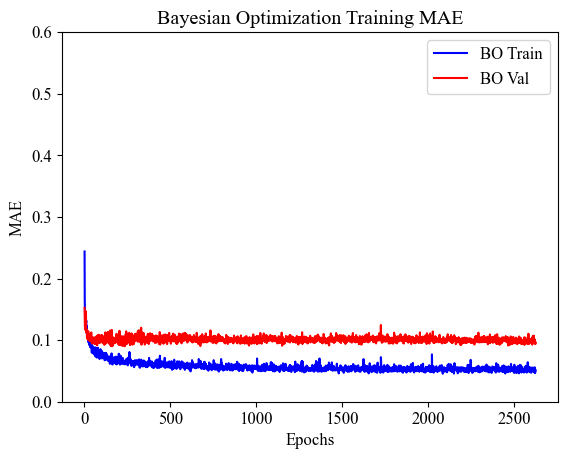

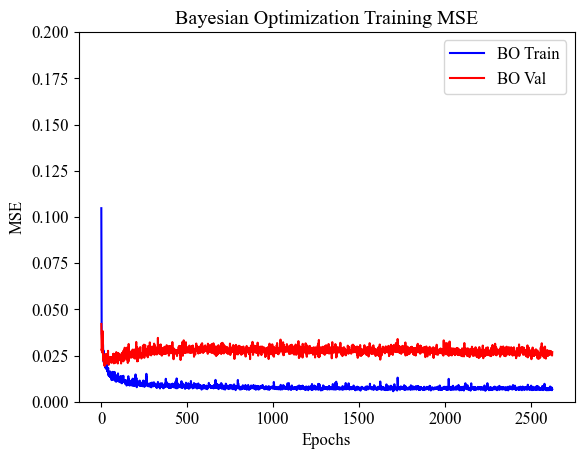

In [73]:
# 绘制MAE与Epochs的关系图
mae = BOhistory.history['mae']
val_mae = BOhistory.history['val_mae']
epochs = range(1, len(mae) + 1)

# 绘制MAE曲线
plt.plot(epochs, mae, 'b', label='BO Train')
plt.plot(epochs, val_mae, 'r', label='BO Val')
plt.title('Bayesian Optimization Training MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 0.6])

# 显示图像
plt.show()

# 绘制MSE与Epochs的关系图
mse = BOhistory.history['mse']
val_mse = BOhistory.history['val_mse']
epochs = range(1, len(mse) + 1)

# 绘制MSE曲线
plt.plot(epochs, mse, 'b', label='BO Train')
plt.plot(epochs, val_mse, 'r', label='BO Val')
plt.title('Bayesian Optimization Training MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

# 设置y轴范围
plt.ylim([0, 0.2])

# 显示图像
plt.show()

In [74]:
loss, mae, mse = BOmodel.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} V".format(mae))

2/2 - 0s - loss: 0.0279 - mae: 0.1030 - mse: 0.0260 - 177ms/epoch - 88ms/step
Testing set Mean Abs Error:  0.10 V


8/8 [==============================] - 0s 12ms/step


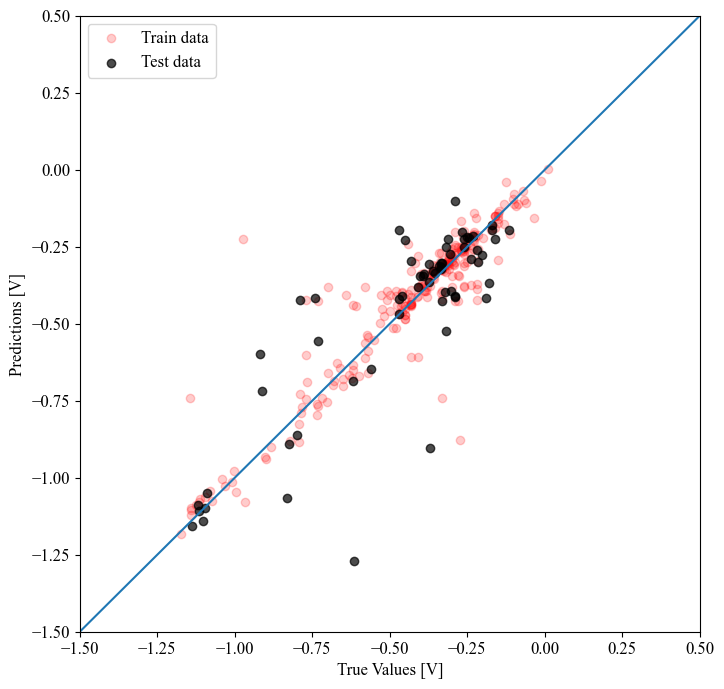

In [75]:
test_predictions = BOmodel.predict(X_test).flatten()
train_predictions = BOmodel.predict(X_train).flatten()

plt.figure(figsize=(8,8))
plt.scatter(y_train, train_predictions, c= 'red', alpha =0.2, label = 'Train data')
plt.scatter(y_test, test_predictions, c='black', alpha = 0.7, label = 'Test data')
plt.xlabel('True Values [V]')
plt.ylabel('Predictions [V]')
lims = [-1.5, 0.5]
plt.xlim(lims)
plt.ylim(lims)
plt.legend(loc="upper left")
_ = plt.plot(lims, lims)

In [76]:
print('深度学习贝叶斯优化模型评价指标展示：')

# 对测试集进行预测
y_pred_test = BOmodel.predict(X_test)

# 计算R^2分数
r2_test = r2_score(y_test, y_pred_test)
print('测试集上的R^2 Score: ', r2_test)

# 对训练集进行预测
y_pred_train = BOmodel.predict(X_train)

# 计算R^2分数
r2_train = r2_score(y_train, y_pred_train)
print('训练集上的R^2 Score: ', r2_train)

# 计算测试集上的MAE
mae_test = mean_absolute_error(y_test, y_pred_test)
print('测试集上的MAE: ', mae_test)

# 计算训练集上的MAE
mae_train = mean_absolute_error(y_train, y_pred_train)
print('训练集上的MAE: ', mae_train)

# 计算测试集上的MSE
mse_test = mean_squared_error(y_test, y_pred_test)
print('测试集上的MSE: ', mse_test)

# 计算训练集上的MSE
mse_train = mean_squared_error(y_train, y_pred_train)
print('训练集上的MSE: ', mse_train)

# 计算测试集上的RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('测试集上的RMSE: ', rmse_test)

# 计算训练集上的RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
print('训练集上的RMSE: ', rmse_train)

深度学习贝叶斯优化模型评价指标展示：
2/2 [==============================] - 0s 3ms/step
测试集上的R^2 Score:  0.6757391685332351
8/8 [==============================] - 0s 2ms/step
训练集上的R^2 Score:  0.8468895059783426
测试集上的MAE:  0.10297138294151849
训练集上的MAE:  0.052154828123156985
测试集上的MSE:  0.025961117909355298
训练集上的MSE:  0.009784177684619037
测试集上的RMSE:  0.16112454161100132
训练集上的RMSE:  0.098915002323303


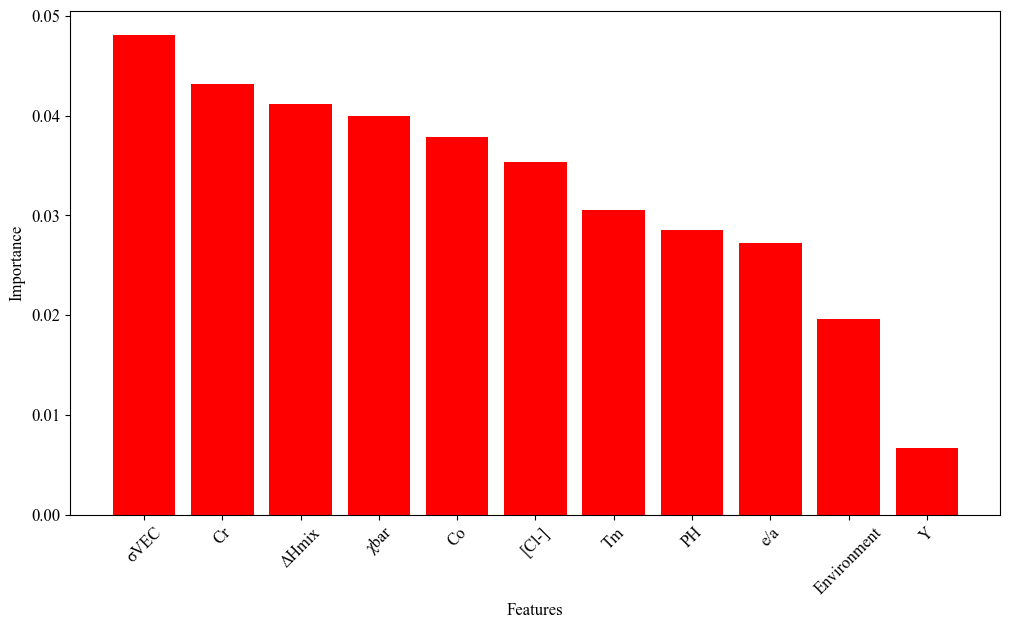

In [77]:
# 获取输入特征的名称
feature_names = dataset.columns[:-1]

# 计算特征重要性
importance = BOmodel.get_weights()[0]
feature_importance = np.abs(importance).mean(axis=1)

# 按重要性从大到小排序
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_feature_names = feature_names[sorted_idx]
sorted_feature_importance = feature_importance[sorted_idx]

# 设置图像大小、字体大小、字体类型
fig = plt.figure(figsize=(12, 8))
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# 画出柱状图
ax = plt.subplot(111)
ax.bar(sorted_feature_names, sorted_feature_importance, color='red')

# 设置x轴标签旋转角度，避免重叠
plt.xticks(rotation=45)

# 设置柱状图之间留有一定的空间
plt.subplots_adjust(bottom=0.25)

# 设置x轴、y轴标签、标题
plt.xlabel('Features')
plt.ylabel('Importance')

# 显示图像
plt.show()

In [78]:
BOmodel.save('D:\IPython\Corrosion-ML\saved_model2\深度学习\贝叶斯优化模型\BODL_1')

INFO:tensorflow:Assets written to: D:\IPython\Corrosion-ML\saved_model2\深度学习\贝叶斯优化模型\BODL_1\assets
